In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
import platform
from matplotlib import font_manager, rc
font = 'Malgun Gothic'
plt.rcParams['font.family'] = font
import collections
import os
import seaborn as sns

In [2]:
home = os.getcwd() + '\\'

In [3]:
# save_dir='test'

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
data_C = pd.read_excel('Total_data.xlsx')
# data_C = pd.read_excel('Zone_FS_2016_total3_local7_sung2.xlsx')

In [6]:
for i in data_C.columns[2:data_C.shape[1]+1]:
    data_C[i]=data_C[i].astype('float')

In [7]:
data_C.columns

Index(['Year', 'Area', 'Month', 'Incidence', 'Average temperature',
       'Average maximum temperature', 'Average minimum temperature',
       'Average relative humidity', 'Precipitation',
       'Average percentage of sunshine', 'Land area', 'Forest', 'Population',
       'Rate of people aged 65 years and over', 'Farm', 'Rate of farmers',
       'Altitude', 'incidence_rate', 'Monthly_mountain_climber', 'outbreak'],
      dtype='object')

In [8]:
variables=['Month','Average temperature',
       'Average maximum temperature', 'Average minimum temperature',
       'Average relative humidity', 'Precipitation',
       'Average percentage of sunshine', 'Land area', 'Forest', 'Population',
       'Rate of people aged 65 years and over', 'Farm', 'Rate of farmers',
       'Altitude', 'Monthly_mountain_climber']

In [9]:
data_2018=data_C[data_C['Year']<2019]
data_2018.index=range(len(data_2018))

In [10]:
data_2019=data_C[data_C['Year']==2019]
data_2019.index=range(len(data_2019))

In [11]:
targets=['Incidence']

In [12]:
targets_C=['outbreak']

In [13]:
data_FS_X=data_2018[variables]
data_FS_X_copy=data_FS_X.copy()

In [14]:
data_FS_Y=data_2018[targets]
data_FS_Y_copy=data_FS_Y.copy()

In [15]:
data_FSC_Y=data_2018[targets_C]
data_FSC_Y_copy=data_FSC_Y.copy()

In [16]:
data_2019_X=data_2019[variables]
data_2019_Y=data_2019[targets]
data_2019_YC=data_2019[targets_C]

data_2019_X_copy=data_2019_X.copy()
data_2019_Y_copy=data_2019_Y.copy()
data_2019_YC_copy=data_2019_YC.copy()

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_FS_X = scaler.fit_transform(data_FS_X)
data_2019_X = scaler.fit_transform(data_2019_X)

data_FS_X = pd.DataFrame(data_FS_X)
data_2019_X = pd.DataFrame(data_2019_X)

data_FS_X.columns = variables
data_2019_X.columns = variables

Automatically created module for IPython interactive environment


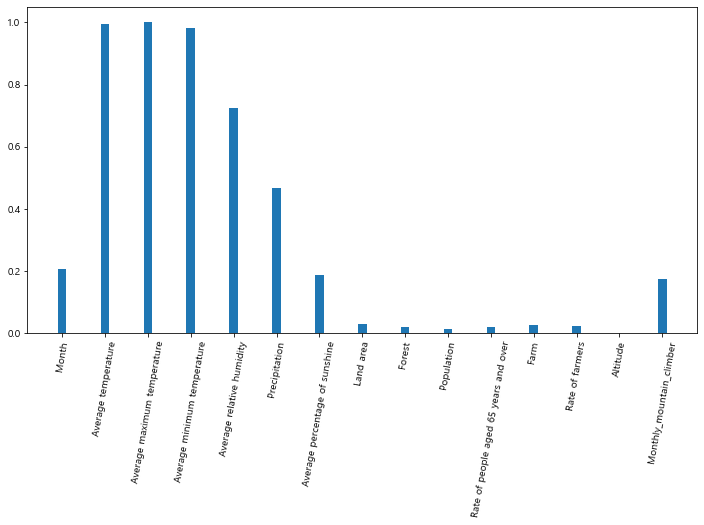

In [18]:
print(__doc__)

# Univariable classification
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# #############################################################################
# Import some data to play with

k_num=14
# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(
        data_FS_X, data_FSC_Y,random_state=0
)

plt.figure(figsize=(12,6))
plt.clf()

X_indices = data_FS_X.columns

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function to select the four
# most significant features
selector = SelectKBest(f_classif, k=k_num)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')
plt.xticks(rotation=80)
plt.show()



In [19]:
selector.scores_

array([1.80705857e+01, 1.24250619e+02, 1.25143680e+02, 1.22290407e+02,
       8.23454276e+01, 4.81905361e+01, 1.62429981e+01, 1.36782958e+00,
       8.45565909e-01, 4.01059838e-01, 7.67336011e-01, 1.14537525e+00,
       1.03021539e+00, 1.05809319e-04, 1.49580017e+01])

In [20]:
univalue_classification=pd.DataFrame()

In [21]:
univalue_classification['Features']=X_indices
univalue_classification['Fvalue']=selector.scores_
univalue_classification['Scores']=scores
univalue_classification['Pvalues']=selector.pvalues_

In [22]:
univalue_classification

,Features,Fvalue,Scores,Pvalues
0,Month,18.070586,0.204815,3.356889e-05
1,Average temperature,124.250619,0.994632,1.874286e-22
2,Average maximum temperature,125.143680,1.000000,1.430812e-22
3,Average minimum temperature,122.290407,0.982795,3.399434e-22
4,Average relative humidity,82.345428,0.723254,1.588341e-16
5,Precipitation,48.190536,0.467369,6.174455e-11
6,Average percentage of sunshine,16.242998,0.187301,8.100816e-05
7,Land area,1.367830,0.028071,2.436737e-01
8,Forest,0.845566,0.020367,3.589944e-01
9,Population,0.401060,0.012723,5.273162e-01


Automatically created module for IPython interactive environment


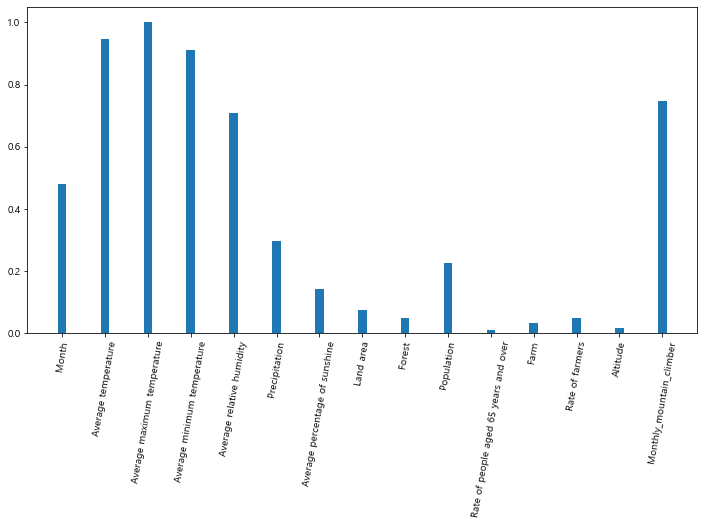

In [23]:
print(__doc__)

# Univariable regression
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression

# #############################################################################
# Some noisy data not correlated
# E = np.random.RandomState(42).uniform(0, 0.1, size=(data_FS_X.shape[0], 20))

# Add the noisy data to the informative features
# data_FS_X = np.hstack((data_FS_X, E))

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(
        data_FS_X, data_FS_Y, random_state=0
)

plt.figure(figsize=(12,6))
plt.clf()

X_indices = data_FS_X.columns
# np.arange(data_FS_X.shape[-1])

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function to select the four
# most significant features
selector = SelectKBest(f_regression, k=5)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')
plt.xticks(rotation=80)
plt.show()

# #############################################################################


In [24]:
univalue_regression=pd.DataFrame()

In [25]:
univalue_regression['Features']=X_indices
univalue_regression['Fvalue']=selector.scores_
univalue_regression['Scores']=scores
univalue_regression['Pvalues']=selector.pvalues_

In [26]:
univalue_regression

,Features,Fvalue,Scores,Pvalues
0,Month,20.096652,0.480969,1.281504e-05
1,Average temperature,44.894187,0.946204,2.373984e-10
2,Average maximum temperature,47.976643,1.000000,6.734061e-11
3,Average minimum temperature,42.852276,0.910132,5.525755e-10
4,Average relative humidity,31.746597,0.707391,6.376983e-08
5,Precipitation,11.207159,0.295574,9.851612e-04
6,Average percentage of sunshine,4.422111,0.140978,3.681418e-02
7,Land area,1.853115,0.074404,1.750595e-01
8,Forest,0.999072,0.048806,3.188268e-01
9,Population,8.067684,0.226172,5.005403e-03


In [27]:
univalue_classification['type']='Classification'
univalue_regression['type']='Regression'

In [28]:
univalue=pd.concat([univalue_classification,univalue_regression])

In [29]:
univalue

,Features,Fvalue,Scores,Pvalues,type
0,Month,18.070586,0.204815,3.356889e-05,Classification
1,Average temperature,124.250619,0.994632,1.874286e-22,Classification
2,Average maximum temperature,125.143680,1.000000,1.430812e-22,Classification
3,Average minimum temperature,122.290407,0.982795,3.399434e-22,Classification
4,Average relative humidity,82.345428,0.723254,1.588341e-16,Classification
5,Precipitation,48.190536,0.467369,6.174455e-11,Classification
6,Average percentage of sunshine,16.242998,0.187301,8.100816e-05,Classification
7,Land area,1.367830,0.028071,2.436737e-01,Classification
8,Forest,0.845566,0.020367,3.589944e-01,Classification
9,Population,0.401060,0.012723,5.273162e-01,Classification


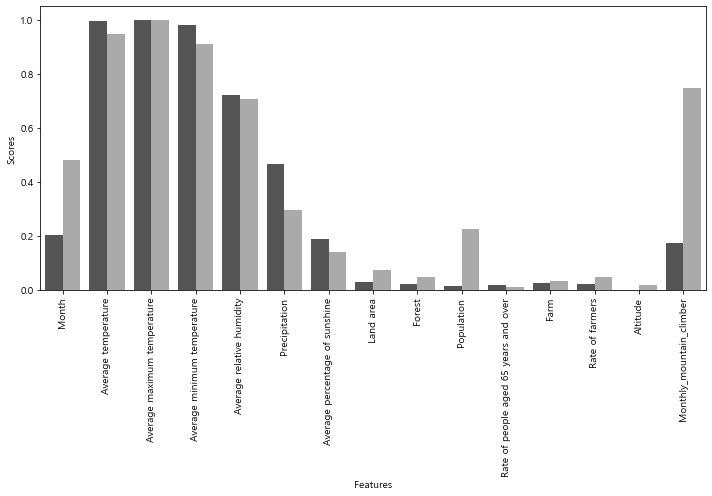

In [30]:
num=1
num_j=1;
plt.figure(figsize=(10,7))
sns.barplot(data=univalue,palette = 'gray',x="Features",y="Scores",hue="type")
plt.xlabel('Features')
plt.ylabel('Scores')
# plt.ylim([0, 25])
# plt.legend(('Classification', 'Regression'), fontsize=10,loc='best')#'upper right')
# plt.title('Univariate Feature Selection')
plt.legend().remove()
plt.xticks(rotation=90)
plt.labelsize=10
plt.rcParams['font.family'] = 'Arial'
plt.tight_layout()
plt.show()

In [31]:
# # # 기본 GB 0.94   BTR 0.77
variables=['Month','Average temperature',
       'Average maximum temperature', 'Average minimum temperature',
       'Average relative humidity', 'Precipitation',
       'Average percentage of sunshine','Population','Monthly_mountain_climber']

In [32]:
data_FS_X=data_FS_X[variables]
data_2019_X=data_2019_X[variables]
datacorr_C=pd.concat([data_FS_X,data_FSC_Y],axis=1)
datacorr=pd.concat([data_FS_X,data_FS_Y],axis=1)

In [33]:
datacorr_C.rename(columns = {'outbreak':'SFTS occurrence'},inplace = True)
datacorr.rename(columns = {'Incidence':'Number of SFTS cases'},inplace = True)

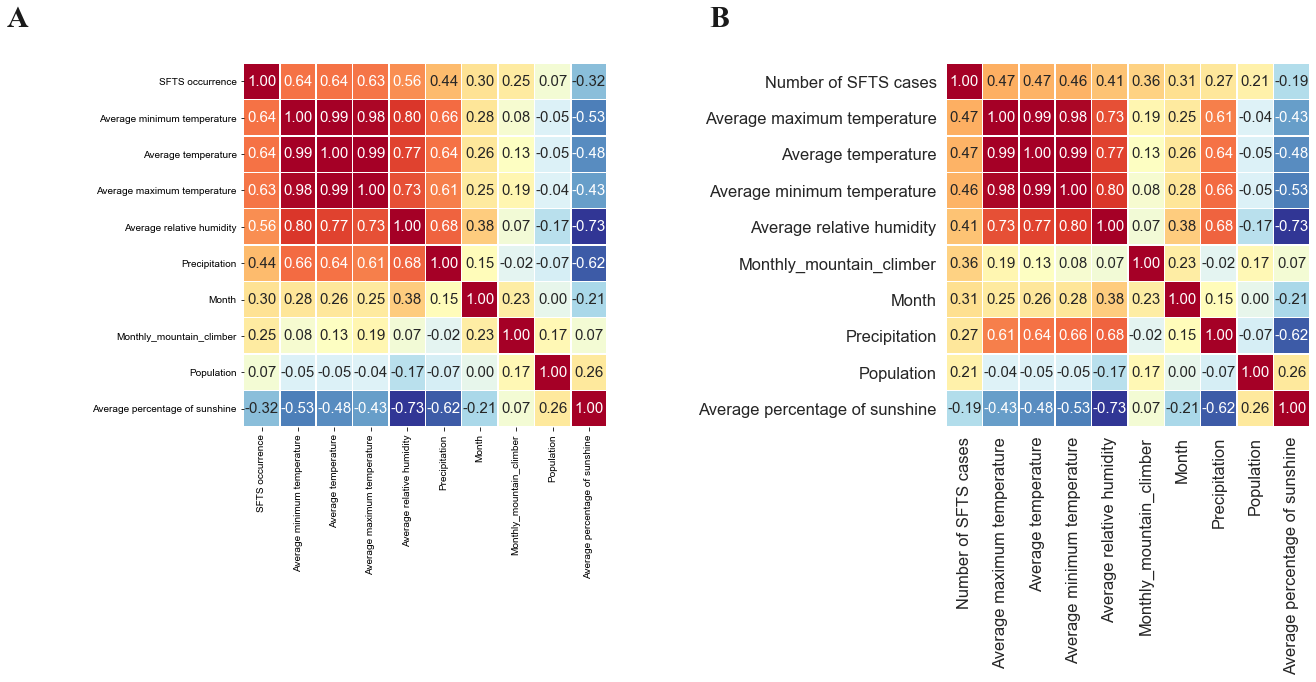

In [34]:
plt.figure(figsize=(20,10))
font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
for j in range(2):
    plt.subplot(1,2,j+1)
    if (j==0):
        k = 16 #number of variables for heatmap
        corrmat = datacorr_C.corr()
        cols = corrmat.nlargest(k, 'SFTS occurrence')['SFTS occurrence'].index
        cm = np.corrcoef(datacorr_C[cols].values.T)
        sns.set(font_scale=1.5)
        # ax = sns.heatmap(cm, cmap = 'RdYlBu_r', annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values,linewidths=.5)
        ax = sns.heatmap(cm, cmap = 'RdYlBu_r',cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values,linewidths=.5)
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom, top)
# plt.rc('axes', titlesize=15)
# plt.title('CMML')
        plt.text(-6.5, -1, 'A', fontdict=font2)
        plt.rcParams['font.family'] = 'Arial'
        plt.tight_layout()
    else:
        k = 16 #number of variables for heatmap
        corrmat = datacorr.corr()
        cols = corrmat.nlargest(k, 'Number of SFTS cases')['Number of SFTS cases'].index
        cm = np.corrcoef(datacorr[cols].values.T)
        sns.set(font_scale=1.5)
        ax = sns.heatmap(cm, cmap = 'RdYlBu_r',cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values,linewidths=.5)
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom, top)
# plt.rc('axes', titlesize=15)
# plt.title('RMML')
        plt.text(-6.5, -1, 'B', fontdict=font2)
        plt.rcParams['font.family'] = 'Arial'
        plt.tight_layout()
# plt.tight_layout()
plt.show()

In [35]:
# # # 기본 GB 0.94   BTR 0.77
variables=['Month','Average maximum temperature', 'Average relative humidity', 'Precipitation',
       'Average percentage of sunshine','Population','Monthly_mountain_climber']

In [36]:
data_FS_X=data_FS_X[variables]
data_2019_X=data_2019_X[variables]

In [37]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Oranges):
       plt.imshow(cm, interpolation='nearest', cmap=cmap)
       plt.title(title)
       plt.colorbar()
       tick_marks = np.arange(2)
       plt.xticks(tick_marks, rotation=45)
       ax = plt.gca()
       ax.set_xticklabels((ax.get_xticks()).astype(str))
       plt.yticks(tick_marks)

       thresh = cm.max() / 2.
       for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
           plt.text(j, i, cm[i, j],
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

       plt.tight_layout()
       plt.ylabel('True label')
       plt.xlabel('Predicted label')

앙상블 없이 분류

In [40]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import VotingClassifier
from sklearn import svm, datasets


max_depth_1=25
max_features_1=0.5
max_leaf_nodes_1=15
learning_rate_1=0.04
n_estimators_1=100

n_hidden_nodes=20
alpha=0.3


fit_num=100

tree_num=4


result_log=data_2018[['Area','Year','Month','outbreak']]
predict_log=data_2019[['Area','Year','Month','outbreak']]

result_svm=data_2018[['Area','Year','Month','outbreak']]
predict_svm=data_2019[['Area','Year','Month','outbreak']]


result_GB=data_2018[['Area','Year','Month','outbreak']]
predict_GB=data_2019[['Area','Year','Month','outbreak']]


result_BT=data_2018[['Area','Year','Month','outbreak']]
predict_BT=data_2019[['Area','Year','Month','outbreak']]


result_MLP=data_2018[['Area','Year','Month','outbreak']]
predict_MLP=data_2019[['Area','Year','Month','outbreak']]



for i in range(fit_num):



# log
    log_clf = LogisticRegression()
    log_clf.fit(data_FS_X, data_FSC_Y)
    y_predict = log_clf.predict(data_2019_X)
    result_log['Simulation_'+ str(i)]=log_clf.predict(data_FS_X)
    predict_log['Simulation_'+ str(i)]=y_predict

# SVC
    svm_clf = svm.SVC(probability=True)
    svm_clf.fit(data_FS_X, data_FSC_Y)
    y_predict = svm_clf.predict(data_2019_X)
    result_svm['Simulation_'+ str(i)]=svm_clf.predict(data_FS_X)
    predict_svm['Simulation_'+ str(i)]=y_predict


# GB
    GB_clf = GradientBoostingClassifier(n_estimators = n_estimators_1,
                                          learning_rate = learning_rate_1,
                                          subsample = 0.9,
                                          max_depth = max_depth_1,
                                          max_features = max_features_1,
                                          max_leaf_nodes = max_leaf_nodes_1)
    GB_clf.fit(data_FS_X, data_FSC_Y)
    y_predict = GB_clf.predict(data_2019_X)
    result_GB['Simulation_'+ str(i)]=GB_clf.predict(data_FS_X)
    predict_GB['Simulation_'+ str(i)]=y_predict

# bt
    BT_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = max_depth_1,
                                          max_features = max_features_1,
                                          max_leaf_nodes = max_leaf_nodes_1))
    BT_clf.fit(data_FS_X, data_FSC_Y)
    y_predict = BT_clf.predict(data_2019_X)    
    result_BT['Simulation_'+ str(i)]=BT_clf.predict(data_FS_X)
    predict_BT['Simulation_'+ str(i)]=y_predict


# MLP
    MLP_clf = MLPClassifier()
    MLP_clf.fit(data_FS_X, data_FSC_Y)
    y_predict = MLP_clf.predict(data_2019_X)    
    result_MLP['Simulation_'+ str(i)]=MLP_clf.predict(data_FS_X)
    predict_MLP['Simulation_'+ str(i)]=y_predict

In [ ]:
# result_log.to_excel('log_train_5.xlsx',index=None)
# result_svm.to_excel('svm_train_5.xlsx',index=None)
# result_GB.to_excel('GB_train_5.xlsx',index=None)
# result_BT.to_excel('BT_train_5.xlsx',index=None)
# result_MLP.to_excel('MLP_train_5.xlsx',index=None)

# predict_log.to_excel('log_test_5.xlsx',index=None)
# predict_svm.to_excel('svm_test_5.xlsx',index=None)
# predict_GB.to_excel('GB_test_5.xlsx',index=None)
# predict_BT.to_excel('BT_test_5.xlsx',index=None)
# predict_MLP.to_excel('MLP_test_5.xlsx',index=None)

In [42]:
cols_result = list(result_BT.columns)
cols_predict = list(predict_BT.columns)
result_sum=pd.DataFrame(columns={'log_acc'})
predict_sum=pd.DataFrame(columns={'log_acc'})

In [43]:
for i in range(100):
    result_sum.loc[i,'log_acc']=len(result_log[result_log['outbreak']==result_log['Simulation_'+str(i)]])/252
    result_sum.loc[i,'log_recall']=len(result_log[(result_log['outbreak']==1) & (result_log['Simulation_'+str(i)]==1)])/len(result_log[(result_log['outbreak']==1)])
    result_sum.loc[i,'log_precision']=len(result_log[(result_log['outbreak']==1) & (result_log['Simulation_'+str(i)]==1)])/len(result_log[(result_log['Simulation_'+str(i)]==1)])
    result_sum.loc[i,'log_f1']=2*result_sum.loc[i,'log_recall']*result_sum.loc[i,'log_precision']/(result_sum.loc[i,'log_recall']+result_sum.loc[i,'log_precision'])
    
    predict_sum.loc[i,'log_acc']=len(predict_log[predict_log['outbreak']==predict_log['Simulation_'+str(i)]])/84
    predict_sum.loc[i,'log_recall']=len(predict_log[(predict_log['outbreak']==1) & (predict_log['Simulation_'+str(i)]==1)])/len(predict_log[(predict_log['outbreak']==1)])
    predict_sum.loc[i,'log_precision']=len(predict_log[(predict_log['outbreak']==1) & (predict_log['Simulation_'+str(i)]==1)])/len(predict_log[(predict_log['Simulation_'+str(i)]==1)])
    predict_sum.loc[i,'log_f1']=2*predict_sum.loc[i,'log_recall']*predict_sum.loc[i,'log_precision']/(predict_sum.loc[i,'log_recall']+predict_sum.loc[i,'log_precision'])
    
    result_sum.loc[i,'svm_acc']=len(result_svm[result_svm['outbreak']==result_svm['Simulation_'+str(i)]])/252
    result_sum.loc[i,'svm_recall']=len(result_svm[(result_svm['outbreak']==1) & (result_svm['Simulation_'+str(i)]==1)])/len(result_svm[(result_svm['outbreak']==1)])
    result_sum.loc[i,'svm_precision']=len(result_svm[(result_svm['outbreak']==1) & (result_svm['Simulation_'+str(i)]==1)])/len(result_svm[(result_svm['Simulation_'+str(i)]==1)])
    result_sum.loc[i,'svm_f1']=2*result_sum.loc[i,'svm_recall']*result_sum.loc[i,'svm_precision']/(result_sum.loc[i,'svm_recall']+result_sum.loc[i,'svm_precision'])
    
    predict_sum.loc[i,'svm_acc']=len(predict_svm[predict_svm['outbreak']==predict_svm['Simulation_'+str(i)]])/84
    predict_sum.loc[i,'svm_recall']=len(predict_svm[(predict_svm['outbreak']==1) & (predict_svm['Simulation_'+str(i)]==1)])/len(predict_svm[(predict_svm['outbreak']==1)])
    predict_sum.loc[i,'svm_precision']=len(predict_svm[(predict_svm['outbreak']==1) & (predict_svm['Simulation_'+str(i)]==1)])/len(predict_svm[(predict_svm['Simulation_'+str(i)]==1)])
    predict_sum.loc[i,'svm_f1']=2*predict_sum.loc[i,'svm_recall']*predict_sum.loc[i,'svm_precision']/(predict_sum.loc[i,'svm_recall']+predict_sum.loc[i,'svm_precision'])
    
    result_sum.loc[i,'GB_acc']=len(result_GB[result_GB['outbreak']==result_GB['Simulation_'+str(i)]])/252
    result_sum.loc[i,'GB_recall']=len(result_GB[(result_GB['outbreak']==1) & (result_GB['Simulation_'+str(i)]==1)])/len(result_GB[(result_GB['outbreak']==1)])
    result_sum.loc[i,'GB_precision']=len(result_GB[(result_GB['outbreak']==1) & (result_GB['Simulation_'+str(i)]==1)])/len(result_GB[(result_GB['Simulation_'+str(i)]==1)])
    result_sum.loc[i,'GB_f1']=2*result_sum.loc[i,'GB_recall']*result_sum.loc[i,'GB_precision']/(result_sum.loc[i,'GB_recall']+result_sum.loc[i,'GB_precision'])
    
    predict_sum.loc[i,'GB_acc']=len(predict_GB[predict_GB['outbreak']==predict_GB['Simulation_'+str(i)]])/84
    predict_sum.loc[i,'GB_recall']=len(predict_GB[(predict_GB['outbreak']==1) & (predict_GB['Simulation_'+str(i)]==1)])/len(predict_GB[(predict_GB['outbreak']==1)])
    predict_sum.loc[i,'GB_precision']=len(predict_GB[(predict_GB['outbreak']==1) & (predict_GB['Simulation_'+str(i)]==1)])/len(predict_GB[(predict_GB['Simulation_'+str(i)]==1)])
    predict_sum.loc[i,'GB_f1']=2*predict_sum.loc[i,'GB_recall']*predict_sum.loc[i,'GB_precision']/(predict_sum.loc[i,'GB_recall']+predict_sum.loc[i,'GB_precision'])
    
    result_sum.loc[i,'BT_acc']=len(result_BT[result_BT['outbreak']==result_BT['Simulation_'+str(i)]])/252
    result_sum.loc[i,'BT_recall']=len(result_BT[(result_BT['outbreak']==1) & (result_BT['Simulation_'+str(i)]==1)])/len(result_BT[(result_BT['outbreak']==1)])
    result_sum.loc[i,'BT_precision']=len(result_BT[(result_BT['outbreak']==1) & (result_BT['Simulation_'+str(i)]==1)])/len(result_BT[(result_BT['Simulation_'+str(i)]==1)])
    result_sum.loc[i,'BT_f1']=2*result_sum.loc[i,'BT_recall']*result_sum.loc[i,'BT_precision']/(result_sum.loc[i,'BT_recall']+result_sum.loc[i,'BT_precision'])
    
    predict_sum.loc[i,'BT_acc']=len(predict_BT[predict_BT['outbreak']==predict_BT['Simulation_'+str(i)]])/84
    predict_sum.loc[i,'BT_recall']=len(predict_BT[(predict_BT['outbreak']==1) & (predict_BT['Simulation_'+str(i)]==1)])/len(predict_BT[(predict_BT['outbreak']==1)])
    predict_sum.loc[i,'BT_precision']=len(predict_BT[(predict_BT['outbreak']==1) & (predict_BT['Simulation_'+str(i)]==1)])/len(predict_BT[(predict_BT['Simulation_'+str(i)]==1)])
    predict_sum.loc[i,'BT_f1']=2*predict_sum.loc[i,'BT_recall']*predict_sum.loc[i,'BT_precision']/(predict_sum.loc[i,'BT_recall']+predict_sum.loc[i,'BT_precision'])
    
    result_sum.loc[i,'MLP_acc']=len(result_MLP[result_MLP['outbreak']==result_MLP['Simulation_'+str(i)]])/252
    result_sum.loc[i,'MLP_recall']=len(result_MLP[(result_MLP['outbreak']==1) & (result_MLP['Simulation_'+str(i)]==1)])/len(result_MLP[(result_MLP['outbreak']==1)])
    result_sum.loc[i,'MLP_precision']=len(result_MLP[(result_MLP['outbreak']==1) & (result_MLP['Simulation_'+str(i)]==1)])/len(result_MLP[(result_MLP['Simulation_'+str(i)]==1)])
    result_sum.loc[i,'MLP_f1']=2*result_sum.loc[i,'MLP_recall']*result_sum.loc[i,'MLP_precision']/(result_sum.loc[i,'MLP_recall']+result_sum.loc[i,'MLP_precision'])
    
    predict_sum.loc[i,'MLP_acc']=len(predict_MLP[predict_MLP['outbreak']==predict_MLP['Simulation_'+str(i)]])/84
    predict_sum.loc[i,'MLP_recall']=len(predict_MLP[(predict_MLP['outbreak']==1) & (predict_MLP['Simulation_'+str(i)]==1)])/len(predict_MLP[(predict_MLP['outbreak']==1)])
    predict_sum.loc[i,'MLP_precision']=len(predict_MLP[(predict_MLP['outbreak']==1) & (predict_MLP['Simulation_'+str(i)]==1)])/len(predict_MLP[(predict_MLP['Simulation_'+str(i)]==1)])
    predict_sum.loc[i,'MLP_f1']=2*predict_sum.loc[i,'MLP_recall']*predict_sum.loc[i,'MLP_precision']/(predict_sum.loc[i,'MLP_recall']+predict_sum.loc[i,'MLP_precision'])

In [44]:
result_sum_2=pd.DataFrame(columns={'log_acc'})
predict_sum_2=pd.DataFrame(columns={'log_acc'})

In [45]:
for i in result_sum.columns:
    result_sum_2.loc[0,i]=result_sum[i].mean()
    result_sum_2.loc[1,i]=result_sum[i].quantile(0.975)
    result_sum_2.loc[2,i]=result_sum[i].quantile(0.025)
    
    predict_sum_2.loc[0,i]=predict_sum[i].mean()
    predict_sum_2.loc[1,i]=predict_sum[i].quantile(0.975)
    predict_sum_2.loc[2,i]=predict_sum[i].quantile(0.025)

In [46]:
result_sum_2

,log_acc,log_recall,log_precision,log_f1,svm_acc,svm_recall,svm_precision,svm_f1,GB_acc,GB_recall,GB_precision,GB_f1,BT_acc,BT_recall,BT_precision,BT_f1,MLP_acc,MLP_recall,MLP_precision,MLP_f1
0,0.833333,0.766667,0.766667,0.766667,0.892857,0.933333,0.8,0.861538,1.0,1.0,1.0,1.0,0.948611,0.970444,0.895076,0.931041,0.859524,0.852222,0.776327,0.812369
1,0.833333,0.766667,0.766667,0.766667,0.892857,0.933333,0.8,0.861538,1.0,1.0,1.0,1.0,0.964286,1.000000,0.939835,0.951625,0.869048,0.883611,0.788992,0.829016
2,0.833333,0.766667,0.766667,0.766667,0.892857,0.933333,0.8,0.861538,1.0,1.0,1.0,1.0,0.932540,0.944444,0.863378,0.909548,0.845238,0.800000,0.767677,0.785649


In [47]:
predict_sum_2

,log_acc,log_recall,log_precision,log_f1,svm_acc,svm_recall,svm_precision,svm_f1,GB_acc,GB_recall,GB_precision,GB_f1,BT_acc,BT_recall,BT_precision,BT_f1,MLP_acc,MLP_recall,MLP_precision,MLP_f1
0,0.916667,0.870968,0.9,0.885246,0.940476,0.967742,0.882353,0.923077,0.936905,0.925806,0.905343,0.915412,0.935000,0.914516,0.910205,0.912114,0.938929,0.953871,0.889261,0.920201
1,0.916667,0.870968,0.9,0.885246,0.940476,0.967742,0.882353,0.923077,0.940476,0.935484,0.906250,0.920635,0.952381,0.967742,0.935484,0.935484,0.952381,0.967742,0.909091,0.937500
2,0.916667,0.870968,0.9,0.885246,0.940476,0.967742,0.882353,0.923077,0.928571,0.903226,0.903226,0.903226,0.916667,0.870968,0.875000,0.883204,0.916667,0.903226,0.852941,0.892308


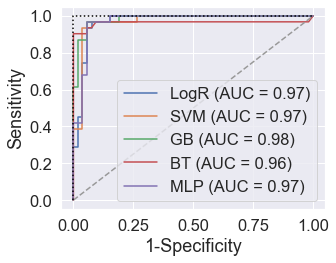

In [48]:
# ROC curve
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []




fig = plt.figure(figsize=(5, 4))
    
X_train=data_FS_X
X_test=data_2019_X
Y_train=data_FSC_Y
Y_test=data_2019_YC


model = [LogisticRegression(),
         svm.SVC(probability=True),
         GradientBoostingClassifier(n_estimators = n_estimators_1,
                                      learning_rate = learning_rate_1,
                                      subsample = 0.9,
                                      max_depth = max_depth_1,
                                      max_features = max_features_1,
                                      max_leaf_nodes = max_leaf_nodes_1),
         BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = max_depth_1,
                                      max_features = max_features_1,
                                      max_leaf_nodes = max_leaf_nodes_1)),
         MLPClassifier()]

model_label=['LogR','SVM','GB','BT','MLP']

for j in range(len(model)):
    clf = model[j]
    clf.fit(X_train, Y_train)
    pre = clf.predict(X_test)

    # ROC 곡선
    fpr, tpr, thresholds = roc_curve(Y_test, clf.predict_proba(X_test)[:,1], pos_label=1)

    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (str(model_label[j]), roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6))

    # (0,0)(0,1)(1,1)을 잊는 점선
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='black')

    # 그림의 바탕 사이즈 및 라벨
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc="lower right")
plt.rcParams['font.family'] = 'Arial'
plt.tight_layout()
plt.savefig('Figure5.tiff', dpi=300)
plt.show()


In [49]:
# explore the algorithm wrapped by RFE
from sklearn import linear_model
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 

fit_num=100

result_linear=data_2018[['Area','Year','Month','Incidence']]
predict_linear=data_2019[['Area','Year','Month','Incidence']]

result_Ridge=data_2018[['Area','Year','Month','Incidence']]
predict_Ridge=data_2019[['Area','Year','Month','Incidence']]


result_DTR=data_2018[['Area','Year','Month','Incidence']]
predict_DTR=data_2019[['Area','Year','Month','Incidence']]


result_GBR=data_2018[['Area','Year','Month','Incidence']]
predict_GBR=data_2019[['Area','Year','Month','Incidence']]


result_BTR=data_2018[['Area','Year','Month','Incidence']]
predict_BTR=data_2019[['Area','Year','Month','Incidence']]


result_MLPR=data_2018[['Area','Year','Month','Incidence']]
predict_MLPR=data_2019[['Area','Year','Month','Incidence']]



for i in range(fit_num):
    # #     # Linear
    Lin_clf = LinearRegression()
    Lin_clf.fit(data_FS_X, data_FS_Y)

    aa=pd.DataFrame(Lin_clf.predict(data_FS_X),columns={'a'})
    bb=pd.DataFrame(Lin_clf.predict(data_2019_X),columns={'a'})
    result_linear['Simulation_'+ str(i)]=aa['a']
    predict_linear['Simulation_'+ str(i)]=bb['a']
    
    # #     # Ridge
    Ridge_clf = linear_model.Ridge(alpha=.1)
    Ridge_clf.fit(data_FS_X, data_FS_Y)
    
    aa=pd.DataFrame(Ridge_clf.predict(data_FS_X),columns={'a'})
    bb=pd.DataFrame(Ridge_clf.predict(data_2019_X),columns={'a'})
    result_Ridge['Simulation_'+ str(i)]=aa['a']
    predict_Ridge['Simulation_'+ str(i)]=bb['a']
    
    
    #     # gbm
    GBR_clf = GradientBoostingRegressor(n_estimators = n_estimators_1,
                                      learning_rate = learning_rate_1,
                                      subsample = 0.9,
                                      max_depth = max_depth_1,
                                      max_features = max_features_1,
                                      max_leaf_nodes = max_leaf_nodes_1)
    GBR_clf.fit(data_FS_X, data_FS_Y)

    aa=pd.DataFrame(GBR_clf.predict(data_FS_X),columns={'a'})
    bb=pd.DataFrame(GBR_clf.predict(data_2019_X),columns={'a'})
    result_GBR['Simulation_'+ str(i)]=aa['a']
    predict_GBR['Simulation_'+ str(i)]=bb['a']
    
    #     # bt
    BTR_clf = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth = max_depth_1,
                                      max_features = max_features_1,
                                      max_leaf_nodes = max_leaf_nodes_1))
    BTR_clf.fit(data_FS_X, data_FS_Y)

    aa=pd.DataFrame(BTR_clf.predict(data_FS_X),columns={'a'})
    bb=pd.DataFrame(BTR_clf.predict(data_2019_X),columns={'a'})
    result_BTR['Simulation_'+ str(i)]=aa['a']
    predict_BTR['Simulation_'+ str(i)]=bb['a']
    
    #     # MLP
    MLPR_clf = MLPRegressor()
    MLPR_clf.fit(data_FS_X, data_FS_Y)

    aa=pd.DataFrame(MLPR_clf.predict(data_FS_X),columns={'a'})
    bb=pd.DataFrame(MLPR_clf.predict(data_2019_X),columns={'a'})
    result_MLPR['Simulation_'+ str(i)]=aa['a']
    predict_MLPR['Simulation_'+ str(i)]=bb['a']

In [50]:
from sklearn.metrics import r2_score

In [51]:
machine_values=['linear','Ridge','GBR','BTR','MLPR']

In [52]:
cols_result = list(result_BTR.columns)
cols_predict = list(predict_BTR.columns)
result_sum=data_2018[['Area','Year','Month','Incidence']]
predict_sum=data_2019[['Area','Year','Month','Incidence']]

In [53]:
for i in result_linear.columns[4:len(result_linear.columns)]:
    result_linear.loc[result_linear[i]< 0,i] =0
    result_Ridge.loc[result_Ridge[i] < 0,i] = 0
    result_GBR.loc[result_GBR[i] < 0,i] = 0
    result_BTR.loc[result_BTR[i] < 0,i] = 0
    result_MLPR.loc[result_MLPR[i] < 0,i] = 0

In [54]:
for i in predict_linear.columns[4:len(predict_linear.columns)]:
    predict_linear.loc[predict_linear[i]< 0,i] =0
    predict_Ridge.loc[predict_Ridge[i] < 0,i] = 0
    predict_GBR.loc[predict_GBR[i] < 0,i] = 0
    predict_BTR.loc[predict_BTR[i] < 0,i] = 0
    predict_MLPR.loc[predict_MLPR[i] < 0,i] = 0

In [81]:
# result_linear.to_excel(home + save_dir + '/' + 'linear_train_noC.xlsx',index=None)
# result_Ridge.to_excel(home + save_dir + '/' + 'Ridge_train_noC.xlsx',index=None)
# result_GBR.to_excel(home + save_dir + '/' + 'GBR_train_noC.xlsx',index=None)
# result_BTR.to_excel(home + save_dir + '/' + 'BTR_train_noC.xlsx',index=None)
# result_MLPR.to_excel(home + save_dir + '/' + 'MLPR_train_noC.xlsx',index=None)

In [82]:
# predict_linear.to_excel(home + save_dir + '/' + 'linear_test_noC.xlsx',index=None)
# predict_Ridge.to_excel(home + save_dir + '/' + 'Ridge_test_noC.xlsx',index=None)
# predict_GBR.to_excel(home + save_dir + '/' + 'GBR_test_noC.xlsx',index=None)
# predict_BTR.to_excel(home + save_dir + '/' + 'BTR_test_noC.xlsx',index=None)
# predict_MLPR.to_excel(home + save_dir + '/' + 'MLPR_test_noC.xlsx',index=None)

In [55]:
for i in range(len(result_BTR)):
    result_sum.loc[i,'linear_mean']=result_linear.iloc[i,4:4+len(cols_result)].mean()
    result_sum.loc[i,'linear_95+']=result_linear.iloc[i,4:4+len(cols_result)].quantile(q=0.975)
    result_sum.loc[i,'linear_95-']=result_linear.iloc[i,4:4+len(cols_result)].quantile(q=0.025)
    
    result_sum.loc[i,'Ridge_mean']=result_Ridge.iloc[i,4:4+len(cols_result)].mean()
    result_sum.loc[i,'Ridge_95+']=result_Ridge.iloc[i,4:4+len(cols_result)].quantile(q=0.975)
    result_sum.loc[i,'Ridge_95-']=result_Ridge.iloc[i,4:4+len(cols_result)].quantile(q=0.025)
    
    result_sum.loc[i,'GBR_mean']=result_GBR.iloc[i,4:4+len(cols_result)].mean()
    result_sum.loc[i,'GBR_95+']=result_GBR.iloc[i,4:4+len(cols_result)].quantile(q=0.975)
    result_sum.loc[i,'GBR_95-']=result_GBR.iloc[i,4:4+len(cols_result)].quantile(q=0.025)
    
    result_sum.loc[i,'BTR_mean']=result_BTR.iloc[i,4:4+len(cols_result)].mean()
    result_sum.loc[i,'BTR_95+']=result_BTR.iloc[i,4:4+len(cols_result)].quantile(q=0.975)
    result_sum.loc[i,'BTR_95-']=result_BTR.iloc[i,4:4+len(cols_result)].quantile(q=0.025)
    
    
    result_sum.loc[i,'MLPR_mean']=result_MLPR.iloc[i,4:4+len(cols_result)].mean()
    result_sum.loc[i,'MLPR_95+']=result_MLPR.iloc[i,4:4+len(cols_result)].quantile(q=0.975)
    result_sum.loc[i,'MLPR_95-']=result_MLPR.iloc[i,4:4+len(cols_result)].quantile(q=0.025)

In [56]:
for i in range(len(predict_BTR)):
    predict_sum.loc[i,'linear_mean']=predict_linear.iloc[i,4:4+len(cols_predict)].mean()
    predict_sum.loc[i,'linear_95+']=predict_linear.iloc[i,4:4+len(cols_predict)].quantile(q=0.975)
    predict_sum.loc[i,'linear_95-']=predict_linear.iloc[i,4:4+len(cols_predict)].quantile(q=0.025)
    
    predict_sum.loc[i,'Ridge_mean']=predict_Ridge.iloc[i,4:4+len(cols_predict)].mean()
    predict_sum.loc[i,'Ridge_95+']=predict_Ridge.iloc[i,4:4+len(cols_predict)].quantile(q=0.975)
    predict_sum.loc[i,'Ridge_95-']=predict_Ridge.iloc[i,4:4+len(cols_predict)].quantile(q=0.025)
    
    predict_sum.loc[i,'GBR_mean']=predict_GBR.iloc[i,4:4+len(cols_predict)].mean()
    predict_sum.loc[i,'GBR_95+']=predict_GBR.iloc[i,4:4+len(cols_predict)].quantile(q=0.975)
    predict_sum.loc[i,'GBR_95-']=predict_GBR.iloc[i,4:4+len(cols_predict)].quantile(q=0.025)
    
    predict_sum.loc[i,'BTR_mean']=predict_BTR.iloc[i,4:4+len(cols_predict)].mean()
    predict_sum.loc[i,'BTR_95+']=predict_BTR.iloc[i,4:4+len(cols_predict)].quantile(q=0.975)
    predict_sum.loc[i,'BTR_95-']=predict_BTR.iloc[i,4:4+len(cols_predict)].quantile(q=0.025)
    
    
    predict_sum.loc[i,'MLPR_mean']=predict_MLPR.iloc[i,4:4+len(cols_predict)].mean()
    predict_sum.loc[i,'MLPR_95+']=predict_MLPR.iloc[i,4:4+len(cols_predict)].quantile(q=0.975)
    predict_sum.loc[i,'MLPR_95-']=predict_MLPR.iloc[i,4:4+len(cols_predict)].quantile(q=0.025)

In [57]:
CMR_linear=result_linear.copy()
CMR_Ridge=result_Ridge.copy()
CMR_GBR=result_GBR.copy()
CMR_BTR=result_BTR.copy()
CMR_MLPR=result_MLPR.copy()

In [58]:
CMP_linear=predict_linear.copy()
CMP_Ridge=predict_Ridge.copy()
CMP_GBR=predict_GBR.copy()
CMP_BTR=predict_BTR.copy()
CMP_MLPR=predict_MLPR.copy()

In [60]:
for i in range(0,7):
    for j in result_linear.columns[3:len(result_linear.columns)]:
        for z in range(1,36):
            CMR_linear.loc[i*36+z,j]=CMR_linear.loc[i*36+z,j]+CMR_linear.loc[i*36+z-1,j]
            CMR_Ridge.loc[i*36+z,j]=CMR_Ridge.loc[i*36+z,j]+CMR_Ridge.loc[i*36+z-1,j]
            CMR_GBR.loc[i*36+z,j]=CMR_GBR.loc[i*36+z,j]+CMR_GBR.loc[i*36+z-1,j]
            CMR_BTR.loc[i*36+z,j]=CMR_BTR.loc[i*36+z,j]+CMR_BTR.loc[i*36+z-1,j]
            CMR_MLPR.loc[i*36+z,j]=CMR_MLPR.loc[i*36+z,j]+CMR_MLPR.loc[i*36+z-1,j]

In [61]:
for i in range(0,7):
    for j in predict_linear.columns[3:len(predict_linear.columns)]:
        for z in range(1,12):
            CMP_linear.loc[i*12+z,j]=CMP_linear.loc[i*12+z,j]+CMP_linear.loc[i*12+z-1,j]
            CMP_Ridge.loc[i*12+z,j]=CMP_Ridge.loc[i*12+z,j]+CMP_Ridge.loc[i*12+z-1,j]
            CMP_GBR.loc[i*12+z,j]=CMP_GBR.loc[i*12+z,j]+CMP_GBR.loc[i*12+z-1,j]
            CMP_BTR.loc[i*12+z,j]=CMP_BTR.loc[i*12+z,j]+CMP_BTR.loc[i*12+z-1,j]
            CMP_MLPR.loc[i*12+z,j]=CMP_MLPR.loc[i*12+z,j]+CMP_MLPR.loc[i*12+z-1,j]

In [89]:
# CMR_linear.to_excel(home + save_dir + '/' + 'Cumul_linear_train_noC.xlsx',index=None)
# CMR_Ridge.to_excel(home + save_dir + '/' + 'Cumul_Ridge_train_noC.xlsx',index=None)
# CMR_GBR.to_excel(home + save_dir + '/' + 'Cumul_GBR_train_noC.xlsx',index=None)
# CMR_BTR.to_excel(home + save_dir + '/' + 'Cumul_BTR_train_noC.xlsx',index=None)
# CMR_MLPR.to_excel(home + save_dir + '/' + 'Cumul_MLPR_train_noC.xlsx',index=None)

In [90]:
# CMP_linear.to_excel(home + save_dir + '/' + 'Cumul_linear_test_noC.xlsx',index=None)
# CMP_Ridge.to_excel(home + save_dir + '/' + 'Cumul_Ridge_test_noC.xlsx',index=None)
# CMP_GBR.to_excel(home + save_dir + '/' + 'Cumul_GBR_test_noC.xlsx',index=None)
# CMP_BTR.to_excel(home + save_dir + '/' + 'Cumul_BTR_test_noC.xlsx',index=None)
# CMP_MLPR.to_excel(home + save_dir + '/' + 'Cumul_MLPR_test_noC.xlsx',index=None)

In [62]:
cols_CMR = list(CMR_BTR.columns)
cols_CMP = list(CMP_BTR.columns)
CMR_sum=CMR_linear[['Area','Year','Month','Incidence']]
CMP_sum=CMP_linear[['Area','Year','Month','Incidence']]

In [63]:
for i in range(len(CMR_BTR)):
    CMR_sum.loc[i,'linear_mean']=CMR_linear.iloc[i,4:4+len(cols_CMR)].mean()
    CMR_sum.loc[i,'linear_95+']=CMR_linear.iloc[i,4:4+len(cols_CMR)].quantile(q=0.975)
    CMR_sum.loc[i,'linear_95-']=CMR_linear.iloc[i,4:4+len(cols_CMR)].quantile(q=0.025)
    
    CMR_sum.loc[i,'Ridge_mean']=CMR_Ridge.iloc[i,4:4+len(cols_CMR)].mean()
    CMR_sum.loc[i,'Ridge_95+']=CMR_Ridge.iloc[i,4:4+len(cols_CMR)].quantile(q=0.975)
    CMR_sum.loc[i,'Ridge_95-']=CMR_Ridge.iloc[i,4:4+len(cols_CMR)].quantile(q=0.025)
    
    CMR_sum.loc[i,'GBR_mean']=CMR_GBR.iloc[i,4:4+len(cols_CMR)].mean()
    CMR_sum.loc[i,'GBR_95+']=CMR_GBR.iloc[i,4:4+len(cols_CMR)].quantile(q=0.975)
    CMR_sum.loc[i,'GBR_95-']=CMR_GBR.iloc[i,4:4+len(cols_CMR)].quantile(q=0.025)
    
    CMR_sum.loc[i,'BTR_mean']=CMR_BTR.iloc[i,4:4+len(cols_CMR)].mean()
    CMR_sum.loc[i,'BTR_95+']=CMR_BTR.iloc[i,4:4+len(cols_CMR)].quantile(q=0.975)
    CMR_sum.loc[i,'BTR_95-']=CMR_BTR.iloc[i,4:4+len(cols_CMR)].quantile(q=0.025)
    
    
    CMR_sum.loc[i,'MLPR_mean']=CMR_MLPR.iloc[i,4:4+len(cols_CMR)].mean()
    CMR_sum.loc[i,'MLPR_95+']=CMR_MLPR.iloc[i,4:4+len(cols_CMR)].quantile(q=0.975)
    CMR_sum.loc[i,'MLPR_95-']=CMR_MLPR.iloc[i,4:4+len(cols_CMR)].quantile(q=0.025)

In [64]:
for i in range(len(CMP_BTR)):
    CMP_sum.loc[i,'linear_mean']=CMP_linear.iloc[i,4:4+len(cols_CMP)].mean()
    CMP_sum.loc[i,'linear_95+']=CMP_linear.iloc[i,4:4+len(cols_CMP)].quantile(q=0.975)
    CMP_sum.loc[i,'linear_95-']=CMP_linear.iloc[i,4:4+len(cols_CMP)].quantile(q=0.025)
    
    CMP_sum.loc[i,'Ridge_mean']=CMP_Ridge.iloc[i,4:4+len(cols_CMP)].mean()
    CMP_sum.loc[i,'Ridge_95+']=CMP_Ridge.iloc[i,4:4+len(cols_CMP)].quantile(q=0.975)
    CMP_sum.loc[i,'Ridge_95-']=CMP_Ridge.iloc[i,4:4+len(cols_CMP)].quantile(q=0.025)
    
    CMP_sum.loc[i,'GBR_mean']=CMP_GBR.iloc[i,4:4+len(cols_CMP)].mean()
    CMP_sum.loc[i,'GBR_95+']=CMP_GBR.iloc[i,4:4+len(cols_CMP)].quantile(q=0.975)
    CMP_sum.loc[i,'GBR_95-']=CMP_GBR.iloc[i,4:4+len(cols_CMP)].quantile(q=0.025)
    
    CMP_sum.loc[i,'BTR_mean']=CMP_BTR.iloc[i,4:4+len(cols_CMP)].mean()
    CMP_sum.loc[i,'BTR_95+']=CMP_BTR.iloc[i,4:4+len(cols_CMP)].quantile(q=0.975)
    CMP_sum.loc[i,'BTR_95-']=CMP_BTR.iloc[i,4:4+len(cols_CMP)].quantile(q=0.025)
    
    
    CMP_sum.loc[i,'MLPR_mean']=CMP_MLPR.iloc[i,4:4+len(cols_CMP)].mean()
    CMP_sum.loc[i,'MLPR_95+']=CMP_MLPR.iloc[i,4:4+len(cols_CMP)].quantile(q=0.975)
    CMP_sum.loc[i,'MLPR_95-']=CMP_MLPR.iloc[i,4:4+len(cols_CMP)].quantile(q=0.025)

In [67]:
total_result=pd.DataFrame(columns={'Year'})
total_predict=pd.DataFrame(columns={'Year'})

In [68]:
num=0
for i in range(2016,2019):
    for j in range(1,13):
        total_result.loc[num,'Year']=i
        total_result.loc[num,'Month']=j
        total_result.loc[num,'Incidence']=result_linear.loc[(result_linear['Year']==i) & (result_linear['Month']==j),'Incidence'].sum()
        
        total_result.loc[num,'linear_mean']=result_linear.loc[(result_linear['Year']==i) & (result_linear['Month']==j),result_linear.columns[4:len(result_linear.columns)]].sum().mean()
        total_result.loc[num,'linear_95+']=result_linear.loc[(result_linear['Year']==i) & (result_linear['Month']==j),result_linear.columns[4:len(result_linear.columns)]].sum().quantile(q=0.975)
        total_result.loc[num,'linear_95-']=result_linear.loc[(result_linear['Year']==i) & (result_linear['Month']==j),result_linear.columns[4:len(result_linear.columns)]].sum().quantile(q=0.025)
        
        total_result.loc[num,'Ridge_mean']=result_Ridge.loc[(result_Ridge['Year']==i) & (result_Ridge['Month']==j),result_Ridge.columns[4:len(result_Ridge.columns)]].sum().mean()
        total_result.loc[num,'Ridge_95+']=result_Ridge.loc[(result_Ridge['Year']==i) & (result_Ridge['Month']==j),result_Ridge.columns[4:len(result_Ridge.columns)]].sum().quantile(q=0.975)
        total_result.loc[num,'Ridge_95-']=result_Ridge.loc[(result_Ridge['Year']==i) & (result_Ridge['Month']==j),result_Ridge.columns[4:len(result_Ridge.columns)]].sum().quantile(q=0.025)
        
        total_result.loc[num,'GBR_mean']=result_GBR.loc[(result_GBR['Year']==i) & (result_GBR['Month']==j),result_GBR.columns[4:len(result_GBR.columns)]].sum().mean()
        total_result.loc[num,'GBR_95+']=result_GBR.loc[(result_GBR['Year']==i) & (result_GBR['Month']==j),result_GBR.columns[4:len(result_GBR.columns)]].sum().quantile(q=0.975)
        total_result.loc[num,'GBR_95-']=result_GBR.loc[(result_GBR['Year']==i) & (result_GBR['Month']==j),result_GBR.columns[4:len(result_GBR.columns)]].sum().quantile(q=0.025)
        
        total_result.loc[num,'BTR_mean']=result_BTR.loc[(result_BTR['Year']==i) & (result_BTR['Month']==j),result_BTR.columns[4:len(result_BTR.columns)]].sum().mean()
        total_result.loc[num,'BTR_95+']=result_BTR.loc[(result_BTR['Year']==i) & (result_BTR['Month']==j),result_BTR.columns[4:len(result_BTR.columns)]].sum().quantile(q=0.975)
        total_result.loc[num,'BTR_95-']=result_BTR.loc[(result_BTR['Year']==i) & (result_BTR['Month']==j),result_BTR.columns[4:len(result_BTR.columns)]].sum().quantile(q=0.025)
        
        total_result.loc[num,'MLPR_mean']=result_MLPR.loc[(result_MLPR['Year']==i) & (result_MLPR['Month']==j),result_MLPR.columns[4:len(result_MLPR.columns)]].sum().mean()
        total_result.loc[num,'MLPR_95+']=result_MLPR.loc[(result_MLPR['Year']==i) & (result_MLPR['Month']==j),result_MLPR.columns[4:len(result_MLPR.columns)]].sum().quantile(q=0.975)
        total_result.loc[num,'MLPR_95-']=result_MLPR.loc[(result_MLPR['Year']==i) & (result_MLPR['Month']==j),result_MLPR.columns[4:len(result_MLPR.columns)]].sum().quantile(q=0.025)
        num=num+1

In [69]:
num=0
for i in range(2019,2020):
    for j in range(1,13):
        total_predict.loc[num,'Year']=i
        total_predict.loc[num,'Month']=j
        total_predict.loc[num,'Incidence']=predict_linear.loc[(predict_linear['Year']==i) & (predict_linear['Month']==j),'Incidence'].sum()
        
        total_predict.loc[num,'linear_mean']=predict_linear.loc[(predict_linear['Year']==i) & (predict_linear['Month']==j),predict_linear.columns[4:len(predict_linear.columns)]].sum().mean()
        total_predict.loc[num,'linear_95+']=predict_linear.loc[(predict_linear['Year']==i) & (predict_linear['Month']==j),predict_linear.columns[4:len(predict_linear.columns)]].sum().quantile(q=0.975)
        total_predict.loc[num,'linear_95-']=predict_linear.loc[(predict_linear['Year']==i) & (predict_linear['Month']==j),predict_linear.columns[4:len(predict_linear.columns)]].sum().quantile(q=0.025)
        
        total_predict.loc[num,'Ridge_mean']=predict_Ridge.loc[(predict_Ridge['Year']==i) & (predict_Ridge['Month']==j),predict_Ridge.columns[4:len(predict_Ridge.columns)]].sum().mean()
        total_predict.loc[num,'Ridge_95+']=predict_Ridge.loc[(predict_Ridge['Year']==i) & (predict_Ridge['Month']==j),predict_Ridge.columns[4:len(predict_Ridge.columns)]].sum().quantile(q=0.975)
        total_predict.loc[num,'Ridge_95-']=predict_Ridge.loc[(predict_Ridge['Year']==i) & (predict_Ridge['Month']==j),predict_Ridge.columns[4:len(predict_Ridge.columns)]].sum().quantile(q=0.025)
        
        total_predict.loc[num,'GBR_mean']=predict_GBR.loc[(predict_GBR['Year']==i) & (predict_GBR['Month']==j),predict_GBR.columns[4:len(predict_GBR.columns)]].sum().mean()
        total_predict.loc[num,'GBR_95+']=predict_GBR.loc[(predict_GBR['Year']==i) & (predict_GBR['Month']==j),predict_GBR.columns[4:len(predict_GBR.columns)]].sum().quantile(q=0.975)
        total_predict.loc[num,'GBR_95-']=predict_GBR.loc[(predict_GBR['Year']==i) & (predict_GBR['Month']==j),predict_GBR.columns[4:len(predict_GBR.columns)]].sum().quantile(q=0.025)
        
        total_predict.loc[num,'BTR_mean']=predict_BTR.loc[(predict_BTR['Year']==i) & (predict_BTR['Month']==j),predict_BTR.columns[4:len(predict_BTR.columns)]].sum().mean()
        total_predict.loc[num,'BTR_95+']=predict_BTR.loc[(predict_BTR['Year']==i) & (predict_BTR['Month']==j),predict_BTR.columns[4:len(predict_BTR.columns)]].sum().quantile(q=0.975)
        total_predict.loc[num,'BTR_95-']=predict_BTR.loc[(predict_BTR['Year']==i) & (predict_BTR['Month']==j),predict_BTR.columns[4:len(predict_BTR.columns)]].sum().quantile(q=0.025)
        
        total_predict.loc[num,'MLPR_mean']=predict_MLPR.loc[(predict_MLPR['Year']==i) & (predict_MLPR['Month']==j),predict_MLPR.columns[4:len(predict_MLPR.columns)]].sum().mean()
        total_predict.loc[num,'MLPR_95+']=predict_MLPR.loc[(predict_MLPR['Year']==i) & (predict_MLPR['Month']==j),predict_MLPR.columns[4:len(predict_MLPR.columns)]].sum().quantile(q=0.975)
        total_predict.loc[num,'MLPR_95-']=predict_MLPR.loc[(predict_MLPR['Year']==i) & (predict_MLPR['Month']==j),predict_MLPR.columns[4:len(predict_MLPR.columns)]].sum().quantile(q=0.025)
        num=num+1

In [73]:
data_FS_X2=pd.concat([data_FS_X,result_rem[['GB', 'BT']]],axis=1)
data_2019_X2=pd.concat([data_2019_X,predict_rem[['GB', 'BT']]],axis=1)

In [75]:
result_linear2=data_2018[['Area','Year','Month','Incidence']]
predict_linear2=data_2019[['Area','Year','Month','Incidence']]

result_Ridge2=data_2018[['Area','Year','Month','Incidence']]
predict_Ridge2=data_2019[['Area','Year','Month','Incidence']]

result_DTR2=data_2018[['Area','Year','Month','Incidence']]
predict_DTR2=data_2019[['Area','Year','Month','Incidence']]

result_GBR2=data_2018[['Area','Year','Month','Incidence']]
predict_GBR2=data_2019[['Area','Year','Month','Incidence']]

result_BTR2=data_2018[['Area','Year','Month','Incidence']]
predict_BTR2=data_2019[['Area','Year','Month','Incidence']]

result_MLPR2=data_2018[['Area','Year','Month','Incidence']]
predict_MLPR2=data_2019[['Area','Year','Month','Incidence']]


for i in range(fit_num):
    # #     # Linear
    Lin_clf2 = LinearRegression()
    Lin_clf2.fit(data_FS_X2, data_FS_Y)

    aa=pd.DataFrame(Lin_clf2.predict(data_FS_X2),columns={'a'})
    bb=pd.DataFrame(Lin_clf2.predict(data_2019_X2),columns={'a'})
    result_linear2['Simulation_'+ str(i)]=aa['a']
    predict_linear2['Simulation_'+ str(i)]=bb['a']
    
    # #     # Ridge
    Ridge_clf2 = linear_model.Ridge(alpha=.1)
    Ridge_clf2.fit(data_FS_X2, data_FS_Y)
    
    aa=pd.DataFrame(Ridge_clf2.predict(data_FS_X2),columns={'a'})
    bb=pd.DataFrame(Ridge_clf2.predict(data_2019_X2),columns={'a'})
    result_Ridge2['Simulation_'+ str(i)]=aa['a']
    predict_Ridge2['Simulation_'+ str(i)]=bb['a']
    
    #     # DT
    DTR_clf2 = DecisionTreeRegressor(max_depth = max_depth_1,
                                      max_features = max_features_1,
                                      max_leaf_nodes = max_leaf_nodes_1)
    DTR_clf2.fit(data_FS_X2, data_FS_Y)

    aa=pd.DataFrame(DTR_clf2.predict(data_FS_X2),columns={'a'})
    bb=pd.DataFrame(DTR_clf2.predict(data_2019_X2),columns={'a'})
    result_DTR2['Simulation_'+ str(i)]=aa['a']
    predict_DTR2['Simulation_'+ str(i)]=bb['a']
    
    #     # gbm
    GBR_clf2 = GradientBoostingRegressor(n_estimators = n_estimators_1,
                                      learning_rate = learning_rate_1,
                                      subsample = 0.9,
                                      max_depth = max_depth_1,
                                      max_features = max_features_1,
                                      max_leaf_nodes = max_leaf_nodes_1)
    GBR_clf2.fit(data_FS_X2, data_FS_Y)

    aa=pd.DataFrame(GBR_clf2.predict(data_FS_X2),columns={'a'})
    bb=pd.DataFrame(GBR_clf2.predict(data_2019_X2),columns={'a'})
    result_GBR2['Simulation_'+ str(i)]=aa['a']
    predict_GBR2['Simulation_'+ str(i)]=bb['a']
    
    #     # bt
    BTR_clf2 = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth = max_depth_1,
                                      max_features = max_features_1,
                                      max_leaf_nodes = max_leaf_nodes_1))
    BTR_clf2.fit(data_FS_X2, data_FS_Y)

    aa=pd.DataFrame(BTR_clf2.predict(data_FS_X2),columns={'a'})
    bb=pd.DataFrame(BTR_clf2.predict(data_2019_X2),columns={'a'})
    result_BTR2['Simulation_'+ str(i)]=aa['a']
    predict_BTR2['Simulation_'+ str(i)]=bb['a']
    
    #     # MLP
    MLPR_clf2 = MLPRegressor()
    MLPR_clf2.fit(data_FS_X2, data_FS_Y)

    aa=pd.DataFrame(MLPR_clf2.predict(data_FS_X2),columns={'a'})
    bb=pd.DataFrame(MLPR_clf2.predict(data_2019_X2),columns={'a'})
    result_MLPR2['Simulation_'+ str(i)]=aa['a']
    predict_MLPR2['Simulation_'+ str(i)]=bb['a']




In [100]:
result_sum_2=data_2018[['Area','Year','Month','Incidence']]
predict_sum_2=data_2019[['Area','Year','Month','Incidence']]

In [101]:
for i in result_linear2.columns[4:len(result_linear2.columns)]:
    result_linear2.loc[result_linear2[i]< 0,i] =0
    result_Ridge2.loc[result_Ridge2[i] < 0,i] = 0
    result_GBR2.loc[result_GBR2[i] < 0,i] = 0
    result_BTR2.loc[result_BTR2[i] < 0,i] = 0
    result_MLPR2.loc[result_MLPR2[i] < 0,i] = 0

In [102]:
for i in predict_linear2.columns[4:len(predict_linear2.columns)]:
    predict_linear2.loc[predict_linear2[i]< 0,i] =0
    predict_Ridge2.loc[predict_Ridge2[i] < 0,i] = 0
    predict_GBR2.loc[predict_GBR2[i] < 0,i] = 0
    predict_BTR2.loc[predict_BTR2[i] < 0,i] = 0
    predict_MLPR2.loc[predict_MLPR2[i] < 0,i] = 0

In [103]:
# result_linear2.to_excel(home + save_dir + '/' + 'linear_train.xlsx',index=None)
# result_Ridge2.to_excel(home + save_dir + '/' + 'Ridge_train.xlsx',index=None)
# result_GBR2.to_excel(home + save_dir + '/' + 'GBR_train.xlsx',index=None)
# result_BTR2.to_excel(home + save_dir + '/' + 'BTR_train.xlsx',index=None)
# result_MLPR2.to_excel(home + save_dir + '/' + 'MLPR_train.xlsx',index=None)

# predict_linear2.to_excel(home + save_dir + '/' + 'linear_test.xlsx',index=None)
# predict_Ridge2.to_excel(home + save_dir + '/' + 'Ridge_test.xlsx',index=None)
# predict_GBR2.to_excel(home + save_dir + '/' + 'GBR_test.xlsx',index=None)
# predict_BTR2.to_excel(home + save_dir + '/' + 'BTR_test.xlsx',index=None)
# predict_MLPR2.to_excel(home + save_dir + '/' + 'MLPR_test.xlsx',index=None)

In [104]:
for i in range(len(result_BTR)):
    result_sum_2.loc[i,'linear_mean']=result_linear2.iloc[i,4:4+len(cols_result)].mean()
    result_sum_2.loc[i,'linear_95+']=result_linear2.iloc[i,4:4+len(cols_result)].quantile(q=0.975)
    result_sum_2.loc[i,'linear_95-']=result_linear2.iloc[i,4:4+len(cols_result)].quantile(q=0.025)
    
    result_sum_2.loc[i,'Ridge_mean']=result_Ridge2.iloc[i,4:4+len(cols_result)].mean()
    result_sum_2.loc[i,'Ridge_95+']=result_Ridge2.iloc[i,4:4+len(cols_result)].quantile(q=0.975)
    result_sum_2.loc[i,'Ridge_95-']=result_Ridge2.iloc[i,4:4+len(cols_result)].quantile(q=0.025)
    
    result_sum_2.loc[i,'GBR_mean']=result_GBR2.iloc[i,4:4+len(cols_result)].mean()
    result_sum_2.loc[i,'GBR_95+']=result_GBR2.iloc[i,4:4+len(cols_result)].quantile(q=0.975)
    result_sum_2.loc[i,'GBR_95-']=result_GBR2.iloc[i,4:4+len(cols_result)].quantile(q=0.025)
    
    result_sum_2.loc[i,'BTR_mean']=result_BTR2.iloc[i,4:4+len(cols_result)].mean()
    result_sum_2.loc[i,'BTR_95+']=result_BTR2.iloc[i,4:4+len(cols_result)].quantile(q=0.975)
    result_sum_2.loc[i,'BTR_95-']=result_BTR2.iloc[i,4:4+len(cols_result)].quantile(q=0.025)
    
    
    result_sum_2.loc[i,'MLPR_mean']=result_MLPR2.iloc[i,4:4+len(cols_result)].mean()
    result_sum_2.loc[i,'MLPR_95+']=result_MLPR2.iloc[i,4:4+len(cols_result)].quantile(q=0.975)
    result_sum_2.loc[i,'MLPR_95-']=result_MLPR2.iloc[i,4:4+len(cols_result)].quantile(q=0.025)

In [105]:
for i in range(len(predict_BTR)):
    predict_sum_2.loc[i,'linear_mean']=predict_linear2.iloc[i,4:4+len(cols_predict)].mean()
    predict_sum_2.loc[i,'linear_95+']=predict_linear2.iloc[i,4:4+len(cols_predict)].quantile(q=0.975)
    predict_sum_2.loc[i,'linear_95-']=predict_linear2.iloc[i,4:4+len(cols_predict)].quantile(q=0.025)
    
    predict_sum_2.loc[i,'Ridge_mean']=predict_Ridge2.iloc[i,4:4+len(cols_predict)].mean()
    predict_sum_2.loc[i,'Ridge_95+']=predict_Ridge2.iloc[i,4:4+len(cols_predict)].quantile(q=0.975)
    predict_sum_2.loc[i,'Ridge_95-']=predict_Ridge2.iloc[i,4:4+len(cols_predict)].quantile(q=0.025)
    
    predict_sum_2.loc[i,'GBR_mean']=predict_GBR2.iloc[i,4:4+len(cols_predict)].mean()
    predict_sum_2.loc[i,'GBR_95+']=predict_GBR2.iloc[i,4:4+len(cols_predict)].quantile(q=0.975)
    predict_sum_2.loc[i,'GBR_95-']=predict_GBR2.iloc[i,4:4+len(cols_predict)].quantile(q=0.025)
    
    predict_sum_2.loc[i,'BTR_mean']=predict_BTR2.iloc[i,4:4+len(cols_predict)].mean()
    predict_sum_2.loc[i,'BTR_95+']=predict_BTR2.iloc[i,4:4+len(cols_predict)].quantile(q=0.975)
    predict_sum_2.loc[i,'BTR_95-']=predict_BTR2.iloc[i,4:4+len(cols_predict)].quantile(q=0.025)
    
    
    predict_sum_2.loc[i,'MLPR_mean']=predict_MLPR2.iloc[i,4:4+len(cols_predict)].mean()
    predict_sum_2.loc[i,'MLPR_95+']=predict_MLPR2.iloc[i,4:4+len(cols_predict)].quantile(q=0.975)
    predict_sum_2.loc[i,'MLPR_95-']=predict_MLPR2.iloc[i,4:4+len(cols_predict)].quantile(q=0.025)

In [106]:
CMR_linear2=result_linear2.copy()
CMR_Ridge2=result_Ridge2.copy()
CMR_GBR2=result_GBR2.copy()
CMR_BTR2=result_BTR2.copy()
CMR_MLPR2=result_MLPR2.copy()

CMP_linear2=predict_linear2.copy()
CMP_Ridge2=predict_Ridge2.copy()
CMP_GBR2=predict_GBR2.copy()
CMP_BTR2=predict_BTR2.copy()
CMP_MLPR2=predict_MLPR2.copy()

In [107]:
for i in range(0,7):
    for j in result_linear2.columns[3:len(result_linear2.columns)]:
        for z in range(1,36):
            CMR_linear2.loc[i*36+z,j]=CMR_linear2.loc[i*36+z,j]+CMR_linear2.loc[i*36+z-1,j]
            CMR_Ridge2.loc[i*36+z,j]=CMR_Ridge2.loc[i*36+z,j]+CMR_Ridge2.loc[i*36+z-1,j]
            CMR_GBR2.loc[i*36+z,j]=CMR_GBR2.loc[i*36+z,j]+CMR_GBR2.loc[i*36+z-1,j]
            CMR_BTR2.loc[i*36+z,j]=CMR_BTR2.loc[i*36+z,j]+CMR_BTR2.loc[i*36+z-1,j]
            CMR_MLPR2.loc[i*36+z,j]=CMR_MLPR2.loc[i*36+z,j]+CMR_MLPR2.loc[i*36+z-1,j]

In [108]:
for i in range(0,7):
    for j in predict_linear2.columns[3:len(predict_linear2.columns)]:
        for z in range(1,12):
            CMP_linear2.loc[i*12+z,j]=CMP_linear2.loc[i*12+z,j]+CMP_linear2.loc[i*12+z-1,j]
            CMP_Ridge2.loc[i*12+z,j]=CMP_Ridge2.loc[i*12+z,j]+CMP_Ridge2.loc[i*12+z-1,j]
            CMP_GBR2.loc[i*12+z,j]=CMP_GBR2.loc[i*12+z,j]+CMP_GBR2.loc[i*12+z-1,j]
            CMP_BTR2.loc[i*12+z,j]=CMP_BTR2.loc[i*12+z,j]+CMP_BTR2.loc[i*12+z-1,j]
            CMP_MLPR2.loc[i*12+z,j]=CMP_MLPR2.loc[i*12+z,j]+CMP_MLPR2.loc[i*12+z-1,j]

In [109]:
# CMR_linear2.to_excel(home + save_dir + '/' + 'Cumul_linear_train.xlsx',index=None)
# CMR_Ridge2.to_excel(home + save_dir + '/' + 'Cumul_Ridge_train.xlsx',index=None)
# CMR_DTR2.to_excel(home + save_dir + '/' + 'Cumul_DTR_train.xlsx',index=None)
# CMR_GBR2.to_excel(home + save_dir + '/' + 'Cumul_GBR_train.xlsx',index=None)
# CMR_BTR2.to_excel(home + save_dir + '/' + 'Cumul_BTR_train.xlsx',index=None)
# CMR_MLPR2.to_excel(home + save_dir + '/' + 'Cumul_MLPR_train.xlsx',index=None)

# CMP_linear2.to_excel(home + save_dir + '/' + 'Cumul_linear_test.xlsx',index=None)
# CMP_Ridge2.to_excel(home + save_dir + '/' + 'Cumul_Ridge_test.xlsx',index=None)
# CMP_DTR2.to_excel(home + save_dir + '/' + 'Cumul_DTR_test.xlsx',index=None)
# CMP_GBR2.to_excel(home + save_dir + '/' + 'Cumul_GBR_test.xlsx',index=None)
# CMP_BTR2.to_excel(home + save_dir + '/' + 'Cumul_BTR_test.xlsx',index=None)
# CMP_MLPR2.to_excel(home + save_dir + '/' + 'Cumul_MLPR_test.xlsx',index=None)

In [110]:
cols_CMR_2 = list(CMR_BTR_2.columns)
cols_CMP_2 = list(CMP_BTR_2.columns)
CMR_sum_2=CMR_linear_2[['Area','Year','Month','Incidence']]
CMP_sum_2=CMP_linear_2[['Area','Year','Month','Incidence']]

In [111]:
for i in range(len(CMR_BTR)):
    CMR_sum_2.loc[i,'linear_mean']=CMR_linear2.iloc[i,4:4+len(cols_CMR_2)].mean()
    CMR_sum_2.loc[i,'linear_95+']=CMR_linear2.iloc[i,4:4+len(cols_CMR_2)].quantile(q=0.975)
    CMR_sum_2.loc[i,'linear_95-']=CMR_linear2.iloc[i,4:4+len(cols_CMR_2)].quantile(q=0.025)
    
    CMR_sum_2.loc[i,'Ridge_mean']=CMR_Ridge2.iloc[i,4:4+len(cols_CMR_2)].mean()
    CMR_sum_2.loc[i,'Ridge_95+']=CMR_Ridge2.iloc[i,4:4+len(cols_CMR_2)].quantile(q=0.975)
    CMR_sum_2.loc[i,'Ridge_95-']=CMR_Ridge2.iloc[i,4:4+len(cols_CMR_2)].quantile(q=0.025)
    
    CMR_sum_2.loc[i,'GBR_mean']=CMR_GBR2.iloc[i,4:4+len(cols_CMR_2)].mean()
    CMR_sum_2.loc[i,'GBR_95+']=CMR_GBR2.iloc[i,4:4+len(cols_CMR_2)].quantile(q=0.975)
    CMR_sum_2.loc[i,'GBR_95-']=CMR_GBR2.iloc[i,4:4+len(cols_CMR_2)].quantile(q=0.025)
    
    CMR_sum_2.loc[i,'BTR_mean']=CMR_BTR2.iloc[i,4:4+len(cols_CMR_2)].mean()
    CMR_sum_2.loc[i,'BTR_95+']=CMR_BTR2.iloc[i,4:4+len(cols_CMR_2)].quantile(q=0.975)
    CMR_sum_2.loc[i,'BTR_95-']=CMR_BTR2.iloc[i,4:4+len(cols_CMR_2)].quantile(q=0.025)
    
    
    CMR_sum_2.loc[i,'MLPR_mean']=CMR_MLPR2.iloc[i,4:4+len(cols_CMR_2)].mean()
    CMR_sum_2.loc[i,'MLPR_95+']=CMR_MLPR2.iloc[i,4:4+len(cols_CMR_2)].quantile(q=0.975)
    CMR_sum_2.loc[i,'MLPR_95-']=CMR_MLPR2.iloc[i,4:4+len(cols_CMR_2)].quantile(q=0.025)

In [112]:
for i in range(len(CMP_BTR)):
    CMP_sum_2.loc[i,'linear_mean']=CMP_linear2.iloc[i,4:4+len(cols_CMP_2)].mean()
    CMP_sum_2.loc[i,'linear_95+']=CMP_linear2.iloc[i,4:4+len(cols_CMP_2)].quantile(q=0.975)
    CMP_sum_2.loc[i,'linear_95-']=CMP_linear2.iloc[i,4:4+len(cols_CMP_2)].quantile(q=0.025)
    
    CMP_sum_2.loc[i,'Ridge_mean']=CMP_Ridge2.iloc[i,4:4+len(cols_CMP_2)].mean()
    CMP_sum_2.loc[i,'Ridge_95+']=CMP_Ridge2.iloc[i,4:4+len(cols_CMP_2)].quantile(q=0.975)
    CMP_sum_2.loc[i,'Ridge_95-']=CMP_Ridge2.iloc[i,4:4+len(cols_CMP_2)].quantile(q=0.025)
    
    CMP_sum_2.loc[i,'GBR_mean']=CMP_GBR2.iloc[i,4:4+len(cols_CMP_2)].mean()
    CMP_sum_2.loc[i,'GBR_95+']=CMP_GBR2.iloc[i,4:4+len(cols_CMP_2)].quantile(q=0.975)
    CMP_sum_2.loc[i,'GBR_95-']=CMP_GBR2.iloc[i,4:4+len(cols_CMP_2)].quantile(q=0.025)
    
    CMP_sum_2.loc[i,'BTR_mean']=CMP_BTR2.iloc[i,4:4+len(cols_CMP_2)].mean()
    CMP_sum_2.loc[i,'BTR_95+']=CMP_BTR2.iloc[i,4:4+len(cols_CMP_2)].quantile(q=0.975)
    CMP_sum_2.loc[i,'BTR_95-']=CMP_BTR2.iloc[i,4:4+len(cols_CMP_2)].quantile(q=0.025)
    
    
    CMP_sum_2.loc[i,'MLPR_mean']=CMP_MLPR2.iloc[i,4:4+len(cols_CMP_2)].mean()
    CMP_sum_2.loc[i,'MLPR_95+']=CMP_MLPR2.iloc[i,4:4+len(cols_CMP_2)].quantile(q=0.975)
    CMP_sum_2.loc[i,'MLPR_95-']=CMP_MLPR2.iloc[i,4:4+len(cols_CMP_2)].quantile(q=0.025)

In [113]:
total_result_2=pd.DataFrame(columns={'Year'})
total_predict_2=pd.DataFrame(columns={'Year'})

In [114]:
num=0
for i in range(2016,2019):
    for j in range(1,13):
        total_result_2.loc[num,'Year']=i
        total_result_2.loc[num,'Month']=j
        total_result_2.loc[num,'Incidence']=result_linear2.loc[(result_linear2['Year']==i) & (result_linear2['Month']==j),'Incidence'].sum()
        
        total_result_2.loc[num,'linear_mean']=result_linear2.loc[(result_linear2['Year']==i) & (result_linear2['Month']==j),result_linear2.columns[4:len(result_linear2.columns)]].sum().mean()
        total_result_2.loc[num,'linear_95+']=result_linear2.loc[(result_linear2['Year']==i) & (result_linear2['Month']==j),result_linear2.columns[4:len(result_linear2.columns)]].sum().quantile(q=0.975)
        total_result_2.loc[num,'linear_95-']=result_linear2.loc[(result_linear2['Year']==i) & (result_linear2['Month']==j),result_linear2.columns[4:len(result_linear2.columns)]].sum().quantile(q=0.025)
        
        total_result_2.loc[num,'Ridge_mean']=result_Ridge2.loc[(result_Ridge2['Year']==i) & (result_Ridge2['Month']==j),result_Ridge2.columns[4:len(result_Ridge2.columns)]].sum().mean()
        total_result_2.loc[num,'Ridge_95+']=result_Ridge2.loc[(result_Ridge2['Year']==i) & (result_Ridge2['Month']==j),result_Ridge2.columns[4:len(result_Ridge2.columns)]].sum().quantile(q=0.975)
        total_result_2.loc[num,'Ridge_95-']=result_Ridge2.loc[(result_Ridge2['Year']==i) & (result_Ridge2['Month']==j),result_Ridge2.columns[4:len(result_Ridge2.columns)]].sum().quantile(q=0.025)
        
        total_result_2.loc[num,'GBR_mean']=result_GBR2.loc[(result_GBR2['Year']==i) & (result_GBR2['Month']==j),result_GBR2.columns[4:len(result_GBR2.columns)]].sum().mean()
        total_result_2.loc[num,'GBR_95+']=result_GBR2.loc[(result_GBR2['Year']==i) & (result_GBR2['Month']==j),result_GBR2.columns[4:len(result_GBR2.columns)]].sum().quantile(q=0.975)
        total_result_2.loc[num,'GBR_95-']=result_GBR2.loc[(result_GBR2['Year']==i) & (result_GBR2['Month']==j),result_GBR2.columns[4:len(result_GBR2.columns)]].sum().quantile(q=0.025)
        
        total_result_2.loc[num,'BTR_mean']=result_BTR2.loc[(result_BTR2['Year']==i) & (result_BTR2['Month']==j),result_BTR2.columns[4:len(result_BTR2.columns)]].sum().mean()
        total_result_2.loc[num,'BTR_95+']=result_BTR2.loc[(result_BTR2['Year']==i) & (result_BTR2['Month']==j),result_BTR2.columns[4:len(result_BTR2.columns)]].sum().quantile(q=0.975)
        total_result_2.loc[num,'BTR_95-']=result_BTR2.loc[(result_BTR2['Year']==i) & (result_BTR2['Month']==j),result_BTR2.columns[4:len(result_BTR2.columns)]].sum().quantile(q=0.025)
        
        total_result_2.loc[num,'MLPR_mean']=result_MLPR2.loc[(result_MLPR2['Year']==i) & (result_MLPR2['Month']==j),result_MLPR2.columns[4:len(result_MLPR2.columns)]].sum().mean()
        total_result_2.loc[num,'MLPR_95+']=result_MLPR2.loc[(result_MLPR2['Year']==i) & (result_MLPR2['Month']==j),result_MLPR2.columns[4:len(result_MLPR2.columns)]].sum().quantile(q=0.975)
        total_result_2.loc[num,'MLPR_95-']=result_MLPR2.loc[(result_MLPR2['Year']==i) & (result_MLPR2['Month']==j),result_MLPR2.columns[4:len(result_MLPR2.columns)]].sum().quantile(q=0.025)
        num=num+1

In [115]:
num=0
for i in range(2019,2020):
    for j in range(1,13):
        total_predict_2.loc[num,'Year']=i
        total_predict_2.loc[num,'Month']=j
        total_predict_2.loc[num,'Incidence']=predict_linear2.loc[(predict_linear2['Year']==i) & (predict_linear2['Month']==j),'Incidence'].sum()
        
        total_predict_2.loc[num,'linear_mean']=predict_linear2.loc[(predict_linear2['Year']==i) & (predict_linear2['Month']==j),predict_linear2.columns[4:len(predict_linear2.columns)]].sum().mean()
        total_predict_2.loc[num,'linear_95+']=predict_linear2.loc[(predict_linear2['Year']==i) & (predict_linear2['Month']==j),predict_linear2.columns[4:len(predict_linear2.columns)]].sum().quantile(q=0.975)
        total_predict_2.loc[num,'linear_95-']=predict_linear2.loc[(predict_linear2['Year']==i) & (predict_linear2['Month']==j),predict_linear2.columns[4:len(predict_linear2.columns)]].sum().quantile(q=0.025)
        
        total_predict_2.loc[num,'Ridge_mean']=predict_Ridge2.loc[(predict_Ridge2['Year']==i) & (predict_Ridge2['Month']==j),predict_Ridge2.columns[4:len(predict_Ridge2.columns)]].sum().mean()
        total_predict_2.loc[num,'Ridge_95+']=predict_Ridge2.loc[(predict_Ridge2['Year']==i) & (predict_Ridge2['Month']==j),predict_Ridge2.columns[4:len(predict_Ridge2.columns)]].sum().quantile(q=0.975)
        total_predict_2.loc[num,'Ridge_95-']=predict_Ridge2.loc[(predict_Ridge2['Year']==i) & (predict_Ridge2['Month']==j),predict_Ridge2.columns[4:len(predict_Ridge2.columns)]].sum().quantile(q=0.025)
        
        total_predict_2.loc[num,'GBR_mean']=predict_GBR2.loc[(predict_GBR2['Year']==i) & (predict_GBR2['Month']==j),predict_GBR2.columns[4:len(predict_GBR2.columns)]].sum().mean()
        total_predict_2.loc[num,'GBR_95+']=predict_GBR2.loc[(predict_GBR2['Year']==i) & (predict_GBR2['Month']==j),predict_GBR2.columns[4:len(predict_GBR2.columns)]].sum().quantile(q=0.975)
        total_predict_2.loc[num,'GBR_95-']=predict_GBR2.loc[(predict_GBR2['Year']==i) & (predict_GBR2['Month']==j),predict_GBR2.columns[4:len(predict_GBR2.columns)]].sum().quantile(q=0.025)
        
        total_predict_2.loc[num,'BTR_mean']=predict_BTR2.loc[(predict_BTR2['Year']==i) & (predict_BTR2['Month']==j),predict_BTR2.columns[4:len(predict_BTR2.columns)]].sum().mean()
        total_predict_2.loc[num,'BTR_95+']=predict_BTR2.loc[(predict_BTR2['Year']==i) & (predict_BTR2['Month']==j),predict_BTR2.columns[4:len(predict_BTR2.columns)]].sum().quantile(q=0.975)
        total_predict_2.loc[num,'BTR_95-']=predict_BTR2.loc[(predict_BTR2['Year']==i) & (predict_BTR2['Month']==j),predict_BTR2.columns[4:len(predict_BTR2.columns)]].sum().quantile(q=0.025)
        
        total_predict_2.loc[num,'MLPR_mean']=predict_MLPR2.loc[(predict_MLPR2['Year']==i) & (predict_MLPR2['Month']==j),predict_MLPR2.columns[4:len(predict_MLPR2.columns)]].sum().mean()
        total_predict_2.loc[num,'MLPR_95+']=predict_MLPR2.loc[(predict_MLPR2['Year']==i) & (predict_MLPR2['Month']==j),predict_MLPR2.columns[4:len(predict_MLPR2.columns)]].sum().quantile(q=0.975)
        total_predict_2.loc[num,'MLPR_95-']=predict_MLPR2.loc[(predict_MLPR2['Year']==i) & (predict_MLPR2['Month']==j),predict_MLPR2.columns[4:len(predict_MLPR2.columns)]].sum().quantile(q=0.025)
        num=num+1

In [116]:
Nsudo_result=pd.DataFrame(columns={'Year'})
Nsudo_predict=pd.DataFrame(columns={'Year'})
num=0
for i in range(2016,2019):
    for j in range(1,13):
        Nsudo_result.loc[num,'Year']=i
        Nsudo_result.loc[num,'Month']=j
        Nsudo_result.loc[num,'Area']='NSudo'
        Nsudo_result.loc[num,'Incidence']=result_linear.loc[(result_linear['Year']==i) & (result_linear['Month']==j) & (result_linear['Area']!='Sudo'),'Incidence'].sum()
        
        Nsudo_result.loc[num,'linear_mean']=result_linear.loc[(result_linear['Year']==i) & (result_linear['Month']==j) & (result_linear['Area']!='Sudo'),result_linear.columns[3:len(result_linear.columns)]].sum().mean()
        Nsudo_result.loc[num,'linear_95+']=result_linear.loc[(result_linear['Year']==i) & (result_linear['Month']==j) & (result_linear['Area']!='Sudo'),result_linear.columns[3:len(result_linear.columns)]].sum().quantile(q=0.975)
        Nsudo_result.loc[num,'linear_95-']=result_linear.loc[(result_linear['Year']==i) & (result_linear['Month']==j) & (result_linear['Area']!='Sudo'),result_linear.columns[3:len(result_linear.columns)]].sum().quantile(q=0.025)
        
        Nsudo_result.loc[num,'Ridge_mean']=result_Ridge.loc[(result_Ridge['Year']==i) & (result_Ridge['Month']==j) & (result_Ridge['Area']!='Sudo'),result_Ridge.columns[3:len(result_Ridge.columns)]].sum().mean()
        Nsudo_result.loc[num,'Ridge_95+']=result_Ridge.loc[(result_Ridge['Year']==i) & (result_Ridge['Month']==j) & (result_Ridge['Area']!='Sudo'),result_Ridge.columns[3:len(result_Ridge.columns)]].sum().quantile(q=0.975)
        Nsudo_result.loc[num,'Ridge_95-']=result_Ridge.loc[(result_Ridge['Year']==i) & (result_Ridge['Month']==j) & (result_Ridge['Area']!='Sudo'),result_Ridge.columns[3:len(result_Ridge.columns)]].sum().quantile(q=0.025)
        
        Nsudo_result.loc[num,'GBR_mean']=result_GBR.loc[(result_GBR['Year']==i) & (result_GBR['Month']==j) & (result_GBR['Area']!='Sudo'),result_GBR.columns[3:len(result_GBR.columns)]].sum().mean()
        Nsudo_result.loc[num,'GBR_95+']=result_GBR.loc[(result_GBR['Year']==i) & (result_GBR['Month']==j) & (result_GBR['Area']!='Sudo'),result_GBR.columns[3:len(result_GBR.columns)]].sum().quantile(q=0.975)
        Nsudo_result.loc[num,'GBR_95-']=result_GBR.loc[(result_GBR['Year']==i) & (result_GBR['Month']==j) & (result_GBR['Area']!='Sudo'),result_GBR.columns[3:len(result_GBR.columns)]].sum().quantile(q=0.025)
        
        Nsudo_result.loc[num,'BTR_mean']=result_BTR.loc[(result_BTR['Year']==i) & (result_BTR['Month']==j) & (result_BTR['Area']!='Sudo'),result_BTR.columns[3:len(result_BTR.columns)]].sum().mean()
        Nsudo_result.loc[num,'BTR_95+']=result_BTR.loc[(result_BTR['Year']==i) & (result_BTR['Month']==j) & (result_BTR['Area']!='Sudo'),result_BTR.columns[3:len(result_BTR.columns)]].sum().quantile(q=0.975)
        Nsudo_result.loc[num,'BTR_95-']=result_BTR.loc[(result_BTR['Year']==i) & (result_BTR['Month']==j) & (result_BTR['Area']!='Sudo'),result_BTR.columns[3:len(result_BTR.columns)]].sum().quantile(q=0.025)
        
        Nsudo_result.loc[num,'MLPR_mean']=result_MLPR.loc[(result_MLPR['Year']==i) & (result_MLPR['Month']==j) & (result_MLPR['Area']!='Sudo'),result_MLPR.columns[3:len(result_MLPR.columns)]].sum().mean()
        Nsudo_result.loc[num,'MLPR_95+']=result_MLPR.loc[(result_MLPR['Year']==i) & (result_MLPR['Month']==j) & (result_MLPR['Area']!='Sudo'),result_MLPR.columns[3:len(result_MLPR.columns)]].sum().quantile(q=0.975)
        Nsudo_result.loc[num,'MLPR_95-']=result_MLPR.loc[(result_MLPR['Year']==i) & (result_MLPR['Month']==j) & (result_MLPR['Area']!='Sudo'),result_MLPR.columns[3:len(result_MLPR.columns)]].sum().quantile(q=0.025)
        num=num+1
        
num=0
for i in range(2019,2020):
    for j in range(1,13):
        Nsudo_predict.loc[num,'Year']=i
        Nsudo_predict.loc[num,'Month']=j
        Nsudo_predict.loc[num,'Area']='NSudo'
        Nsudo_predict.loc[num,'Incidence']=predict_linear.loc[(predict_linear['Year']==i) & (predict_linear['Month']==j) & (predict_linear['Area']!='Sudo'),'Incidence'].sum()
        
        Nsudo_predict.loc[num,'linear_mean']=predict_linear.loc[(predict_linear['Year']==i) & (predict_linear['Month']==j) & (predict_linear['Area']!='Sudo'),predict_linear.columns[3:len(predict_linear.columns)]].sum().mean()
        Nsudo_predict.loc[num,'linear_95+']=predict_linear.loc[(predict_linear['Year']==i) & (predict_linear['Month']==j) & (predict_linear['Area']!='Sudo'),predict_linear.columns[3:len(predict_linear.columns)]].sum().quantile(q=0.975)
        Nsudo_predict.loc[num,'linear_95-']=predict_linear.loc[(predict_linear['Year']==i) & (predict_linear['Month']==j) & (predict_linear['Area']!='Sudo'),predict_linear.columns[3:len(predict_linear.columns)]].sum().quantile(q=0.025)
        
        Nsudo_predict.loc[num,'Ridge_mean']=predict_Ridge.loc[(predict_Ridge['Year']==i) & (predict_Ridge['Month']==j) & (predict_Ridge['Area']!='Sudo'),predict_Ridge.columns[3:len(predict_Ridge.columns)]].sum().mean()
        Nsudo_predict.loc[num,'Ridge_95+']=predict_Ridge.loc[(predict_Ridge['Year']==i) & (predict_Ridge['Month']==j) & (predict_Ridge['Area']!='Sudo'),predict_Ridge.columns[3:len(predict_Ridge.columns)]].sum().quantile(q=0.975)
        Nsudo_predict.loc[num,'Ridge_95-']=predict_Ridge.loc[(predict_Ridge['Year']==i) & (predict_Ridge['Month']==j) & (predict_Ridge['Area']!='Sudo'),predict_Ridge.columns[3:len(predict_Ridge.columns)]].sum().quantile(q=0.025)
        
        Nsudo_predict.loc[num,'GBR_mean']=predict_GBR.loc[(predict_GBR['Year']==i) & (predict_GBR['Month']==j) & (predict_GBR['Area']!='Sudo'),predict_GBR.columns[3:len(predict_GBR.columns)]].sum().mean()
        Nsudo_predict.loc[num,'GBR_95+']=predict_GBR.loc[(predict_GBR['Year']==i) & (predict_GBR['Month']==j) & (predict_GBR['Area']!='Sudo'),predict_GBR.columns[3:len(predict_GBR.columns)]].sum().quantile(q=0.975)
        Nsudo_predict.loc[num,'GBR_95-']=predict_GBR.loc[(predict_GBR['Year']==i) & (predict_GBR['Month']==j) & (predict_GBR['Area']!='Sudo'),predict_GBR.columns[3:len(predict_GBR.columns)]].sum().quantile(q=0.025)
        
        Nsudo_predict.loc[num,'BTR_mean']=predict_BTR.loc[(predict_BTR['Year']==i) & (predict_BTR['Month']==j) & (predict_BTR['Area']!='Sudo'),predict_BTR.columns[3:len(predict_BTR.columns)]].sum().mean()
        Nsudo_predict.loc[num,'BTR_95+']=predict_BTR.loc[(predict_BTR['Year']==i) & (predict_BTR['Month']==j) & (predict_BTR['Area']!='Sudo'),predict_BTR.columns[3:len(predict_BTR.columns)]].sum().quantile(q=0.975)
        Nsudo_predict.loc[num,'BTR_95-']=predict_BTR.loc[(predict_BTR['Year']==i) & (predict_BTR['Month']==j) & (predict_BTR['Area']!='Sudo'),predict_BTR.columns[3:len(predict_BTR.columns)]].sum().quantile(q=0.025)
        
        Nsudo_predict.loc[num,'MLPR_mean']=predict_MLPR.loc[(predict_MLPR['Year']==i) & (predict_MLPR['Month']==j) & (predict_MLPR['Area']!='Sudo'),predict_MLPR.columns[3:len(predict_MLPR.columns)]].sum().mean()
        Nsudo_predict.loc[num,'MLPR_95+']=predict_MLPR.loc[(predict_MLPR['Year']==i) & (predict_MLPR['Month']==j) & (predict_MLPR['Area']!='Sudo'),predict_MLPR.columns[3:len(predict_MLPR.columns)]].sum().quantile(q=0.975)
        Nsudo_predict.loc[num,'MLPR_95-']=predict_MLPR.loc[(predict_MLPR['Year']==i) & (predict_MLPR['Month']==j) & (predict_MLPR['Area']!='Sudo'),predict_MLPR.columns[3:len(predict_MLPR.columns)]].sum().quantile(q=0.025)
        num=num+1

In [117]:
Sudo_result=result_sum[result_sum['Area']=='Sudo']
Sudo_predict=predict_sum[predict_sum['Area']=='Sudo']

total_result['Area']='Nation'
total_predict['Area']='Nation'

In [118]:
Sudo_result=Sudo_result[Nsudo_result.columns]
Sudo_predict=Sudo_predict[Nsudo_result.columns]
total_result=total_result[Nsudo_result.columns]
total_predict=total_predict[Nsudo_result.columns]

three_result=pd.concat([Sudo_result,Nsudo_result,total_result])
three_predict=pd.concat([Sudo_predict,Nsudo_predict,total_predict])
three_result.index=range(len(three_result))
three_predict.index=range(len(three_predict))

Nsudo_result_2=pd.DataFrame(columns={'Year'})
Nsudo_predict_2=pd.DataFrame(columns={'Year'})

In [119]:
num=0
for i in range(2016,2019):
    for j in range(1,13):
        Nsudo_result_2.loc[num,'Year']=i
        Nsudo_result_2.loc[num,'Month']=j
        Nsudo_result_2.loc[num,'Area']='NSudo'
        Nsudo_result_2.loc[num,'Incidence']=result_linear2.loc[(result_linear2['Year']==i) & (result_linear2['Month']==j) & (result_linear2['Area']!='Sudo'),'Incidence'].sum()
        
        Nsudo_result_2.loc[num,'linear_mean']=result_linear2.loc[(result_linear2['Year']==i) & (result_linear2['Month']==j) & (result_linear2['Area']!='Sudo'),result_linear2.columns[3:len(result_linear2.columns)]].sum().mean()
        Nsudo_result_2.loc[num,'linear_95+']=result_linear2.loc[(result_linear2['Year']==i) & (result_linear2['Month']==j) & (result_linear2['Area']!='Sudo'),result_linear2.columns[3:len(result_linear2.columns)]].sum().quantile(q=0.975)
        Nsudo_result_2.loc[num,'linear_95-']=result_linear2.loc[(result_linear2['Year']==i) & (result_linear2['Month']==j) & (result_linear2['Area']!='Sudo'),result_linear2.columns[3:len(result_linear2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_result_2.loc[num,'Ridge_mean']=result_Ridge2.loc[(result_Ridge2['Year']==i) & (result_Ridge2['Month']==j) & (result_Ridge2['Area']!='Sudo'),result_Ridge2.columns[3:len(result_Ridge2.columns)]].sum().mean()
        Nsudo_result_2.loc[num,'Ridge_95+']=result_Ridge2.loc[(result_Ridge2['Year']==i) & (result_Ridge2['Month']==j) & (result_Ridge2['Area']!='Sudo'),result_Ridge2.columns[3:len(result_Ridge2.columns)]].sum().quantile(q=0.975)
        Nsudo_result_2.loc[num,'Ridge_95-']=result_Ridge2.loc[(result_Ridge2['Year']==i) & (result_Ridge2['Month']==j) & (result_Ridge2['Area']!='Sudo'),result_Ridge2.columns[3:len(result_Ridge2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_result_2.loc[num,'GBR_mean']=result_GBR2.loc[(result_GBR2['Year']==i) & (result_GBR2['Month']==j) & (result_GBR2['Area']!='Sudo'),result_GBR2.columns[3:len(result_GBR2.columns)]].sum().mean()
        Nsudo_result_2.loc[num,'GBR_95+']=result_GBR2.loc[(result_GBR2['Year']==i) & (result_GBR2['Month']==j) & (result_GBR2['Area']!='Sudo'),result_GBR2.columns[3:len(result_GBR2.columns)]].sum().quantile(q=0.975)
        Nsudo_result_2.loc[num,'GBR_95-']=result_GBR2.loc[(result_GBR2['Year']==i) & (result_GBR2['Month']==j) & (result_GBR2['Area']!='Sudo'),result_GBR2.columns[3:len(result_GBR2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_result_2.loc[num,'BTR_mean']=result_BTR2.loc[(result_BTR2['Year']==i) & (result_BTR2['Month']==j) & (result_BTR2['Area']!='Sudo'),result_BTR2.columns[3:len(result_BTR2.columns)]].sum().mean()
        Nsudo_result_2.loc[num,'BTR_95+']=result_BTR2.loc[(result_BTR2['Year']==i) & (result_BTR2['Month']==j) & (result_BTR2['Area']!='Sudo'),result_BTR2.columns[3:len(result_BTR2.columns)]].sum().quantile(q=0.975)
        Nsudo_result_2.loc[num,'BTR_95-']=result_BTR2.loc[(result_BTR2['Year']==i) & (result_BTR2['Month']==j) & (result_BTR2['Area']!='Sudo'),result_BTR2.columns[3:len(result_BTR2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_result_2.loc[num,'MLPR_mean']=result_MLPR2.loc[(result_MLPR2['Year']==i) & (result_MLPR2['Month']==j) & (result_MLPR2['Area']!='Sudo'),result_MLPR2.columns[3:len(result_MLPR2.columns)]].sum().mean()
        Nsudo_result_2.loc[num,'MLPR_95+']=result_MLPR2.loc[(result_MLPR2['Year']==i) & (result_MLPR2['Month']==j) & (result_MLPR2['Area']!='Sudo'),result_MLPR2.columns[3:len(result_MLPR2.columns)]].sum().quantile(q=0.975)
        Nsudo_result_2.loc[num,'MLPR_95-']=result_MLPR2.loc[(result_MLPR2['Year']==i) & (result_MLPR2['Month']==j) & (result_MLPR2['Area']!='Sudo'),result_MLPR2.columns[3:len(result_MLPR2.columns)]].sum().quantile(q=0.025)
        num=num+1
        
num=0
for i in range(2019,2020):
    for j in range(1,13):
        Nsudo_predict_2.loc[num,'Year']=i
        Nsudo_predict_2.loc[num,'Month']=j
        Nsudo_predict_2.loc[num,'Area']='NSudo'
        Nsudo_predict_2.loc[num,'Incidence']=predict_linear2.loc[(predict_linear2['Year']==i) & (predict_linear2['Month']==j) & (predict_linear2['Area']!='Sudo'),'Incidence'].sum()
        
        Nsudo_predict_2.loc[num,'linear_mean']=predict_linear2.loc[(predict_linear2['Year']==i) & (predict_linear2['Month']==j) & (predict_linear2['Area']!='Sudo'),predict_linear2.columns[3:len(predict_linear2.columns)]].sum().mean()
        Nsudo_predict_2.loc[num,'linear_95+']=predict_linear2.loc[(predict_linear2['Year']==i) & (predict_linear2['Month']==j) & (predict_linear2['Area']!='Sudo'),predict_linear2.columns[3:len(predict_linear2.columns)]].sum().quantile(q=0.975)
        Nsudo_predict_2.loc[num,'linear_95-']=predict_linear2.loc[(predict_linear2['Year']==i) & (predict_linear2['Month']==j) & (predict_linear2['Area']!='Sudo'),predict_linear2.columns[3:len(predict_linear2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_predict_2.loc[num,'Ridge_mean']=predict_Ridge2.loc[(predict_Ridge2['Year']==i) & (predict_Ridge2['Month']==j) & (predict_Ridge2['Area']!='Sudo'),predict_Ridge2.columns[3:len(predict_Ridge2.columns)]].sum().mean()
        Nsudo_predict_2.loc[num,'Ridge_95+']=predict_Ridge2.loc[(predict_Ridge2['Year']==i) & (predict_Ridge2['Month']==j) & (predict_Ridge2['Area']!='Sudo'),predict_Ridge2.columns[3:len(predict_Ridge2.columns)]].sum().quantile(q=0.975)
        Nsudo_predict_2.loc[num,'Ridge_95-']=predict_Ridge2.loc[(predict_Ridge2['Year']==i) & (predict_Ridge2['Month']==j) & (predict_Ridge2['Area']!='Sudo'),predict_Ridge2.columns[3:len(predict_Ridge2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_predict_2.loc[num,'GBR_mean']=predict_GBR2.loc[(predict_GBR2['Year']==i) & (predict_GBR2['Month']==j) & (predict_GBR2['Area']!='Sudo'),predict_GBR2.columns[3:len(predict_GBR2.columns)]].sum().mean()
        Nsudo_predict_2.loc[num,'GBR_95+']=predict_GBR2.loc[(predict_GBR2['Year']==i) & (predict_GBR2['Month']==j) & (predict_GBR2['Area']!='Sudo'),predict_GBR2.columns[3:len(predict_GBR2.columns)]].sum().quantile(q=0.975)
        Nsudo_predict_2.loc[num,'GBR_95-']=predict_GBR2.loc[(predict_GBR2['Year']==i) & (predict_GBR2['Month']==j) & (predict_GBR2['Area']!='Sudo'),predict_GBR2.columns[3:len(predict_GBR2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_predict_2.loc[num,'BTR_mean']=predict_BTR2.loc[(predict_BTR2['Year']==i) & (predict_BTR2['Month']==j) & (predict_BTR2['Area']!='Sudo'),predict_BTR2.columns[3:len(predict_BTR2.columns)]].sum().mean()
        Nsudo_predict_2.loc[num,'BTR_95+']=predict_BTR2.loc[(predict_BTR2['Year']==i) & (predict_BTR2['Month']==j) & (predict_BTR2['Area']!='Sudo'),predict_BTR2.columns[3:len(predict_BTR2.columns)]].sum().quantile(q=0.975)
        Nsudo_predict_2.loc[num,'BTR_95-']=predict_BTR2.loc[(predict_BTR2['Year']==i) & (predict_BTR2['Month']==j) & (predict_BTR2['Area']!='Sudo'),predict_BTR2.columns[3:len(predict_BTR2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_predict_2.loc[num,'MLPR_mean']=predict_MLPR2.loc[(predict_MLPR2['Year']==i) & (predict_MLPR2['Month']==j) & (predict_MLPR2['Area']!='Sudo'),predict_MLPR2.columns[3:len(predict_MLPR2.columns)]].sum().mean()
        Nsudo_predict_2.loc[num,'MLPR_95+']=predict_MLPR2.loc[(predict_MLPR2['Year']==i) & (predict_MLPR2['Month']==j) & (predict_MLPR2['Area']!='Sudo'),predict_MLPR2.columns[3:len(predict_MLPR2.columns)]].sum().quantile(q=0.975)
        Nsudo_predict_2.loc[num,'MLPR_95-']=predict_MLPR2.loc[(predict_MLPR2['Year']==i) & (predict_MLPR2['Month']==j) & (predict_MLPR2['Area']!='Sudo'),predict_MLPR2.columns[3:len(predict_MLPR2.columns)]].sum().quantile(q=0.025)
        num=num+1

In [120]:
Sudo_result_2=result_sum_2[result_sum_2['Area']=='Sudo']
Sudo_predict_2=predict_sum_2[predict_sum_2['Area']=='Sudo']

total_result_2['Area']='Nation'
total_predict_2['Area']='Nation'

total_result_2['Year']=total_result['Year']
total_predict_2['Year']=total_predict['Year']

Sudo_result_2=Sudo_result_2[Nsudo_result_2.columns]
Sudo_predict_2=Sudo_predict_2[Nsudo_result_2.columns]
total_result_2=total_result_2[Nsudo_result_2.columns]
total_predict_2=total_predict_2[Nsudo_result_2.columns]

three_result_2=pd.concat([Sudo_result_2,Nsudo_result_2,total_result_2])
three_predict_2=pd.concat([Sudo_predict_2,Nsudo_predict_2,total_predict_2])
three_result_2.index=range(len(three_result_2))
three_predict_2.index=range(len(three_predict_2))

Nsudo_CMR=pd.DataFrame(columns={'Year'})
Nsudo_CMP=pd.DataFrame(columns={'Year'})
total_CMR=pd.DataFrame(columns={'Year'})
total_CMP=pd.DataFrame(columns={'Year'})

Nsudo_CMR_2=pd.DataFrame(columns={'Year'})
Nsudo_CMP_2=pd.DataFrame(columns={'Year'})
total_CMR_2=pd.DataFrame(columns={'Year'})
total_CMP_2=pd.DataFrame(columns={'Year'})

In [121]:
num=0
for i in range(2016,2019):
    for j in range(1,13):
        Nsudo_CMR.loc[num,'Year']=i
        Nsudo_CMR.loc[num,'Month']=j
        Nsudo_CMR.loc[num,'Area']='NSudo'
        Nsudo_CMR.loc[num,'Incidence']=CMR_linear.loc[(CMR_linear['Year']==i) & (CMR_linear['Month']==j) & (CMR_linear['Area']!='Sudo'),'Incidence'].sum()
        
        Nsudo_CMR.loc[num,'linear_mean']=CMR_linear.loc[(CMR_linear['Year']==i) & (CMR_linear['Month']==j) & (CMR_linear['Area']!='Sudo'),CMR_linear.columns[3:len(CMR_linear.columns)]].sum().mean()
        Nsudo_CMR.loc[num,'linear_95+']=CMR_linear.loc[(CMR_linear['Year']==i) & (CMR_linear['Month']==j) & (CMR_linear['Area']!='Sudo'),CMR_linear.columns[3:len(CMR_linear.columns)]].sum().quantile(q=0.975)
        Nsudo_CMR.loc[num,'linear_95-']=CMR_linear.loc[(CMR_linear['Year']==i) & (CMR_linear['Month']==j) & (CMR_linear['Area']!='Sudo'),CMR_linear.columns[3:len(CMR_linear.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMR.loc[num,'Ridge_mean']=CMR_Ridge.loc[(CMR_Ridge['Year']==i) & (CMR_Ridge['Month']==j) & (CMR_Ridge['Area']!='Sudo'),CMR_Ridge.columns[3:len(CMR_Ridge.columns)]].sum().mean()
        Nsudo_CMR.loc[num,'Ridge_95+']=CMR_Ridge.loc[(CMR_Ridge['Year']==i) & (CMR_Ridge['Month']==j) & (CMR_Ridge['Area']!='Sudo'),CMR_Ridge.columns[3:len(CMR_Ridge.columns)]].sum().quantile(q=0.975)
        Nsudo_CMR.loc[num,'Ridge_95-']=CMR_Ridge.loc[(CMR_Ridge['Year']==i) & (CMR_Ridge['Month']==j) & (CMR_Ridge['Area']!='Sudo'),CMR_Ridge.columns[3:len(CMR_Ridge.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMR.loc[num,'GBR_mean']=CMR_GBR.loc[(CMR_GBR['Year']==i) & (CMR_GBR['Month']==j) & (CMR_GBR['Area']!='Sudo'),CMR_GBR.columns[3:len(CMR_GBR.columns)]].sum().mean()
        Nsudo_CMR.loc[num,'GBR_95+']=CMR_GBR.loc[(CMR_GBR['Year']==i) & (CMR_GBR['Month']==j) & (CMR_GBR['Area']!='Sudo'),CMR_GBR.columns[3:len(CMR_GBR.columns)]].sum().quantile(q=0.975)
        Nsudo_CMR.loc[num,'GBR_95-']=CMR_GBR.loc[(CMR_GBR['Year']==i) & (CMR_GBR['Month']==j) & (CMR_GBR['Area']!='Sudo'),CMR_GBR.columns[3:len(CMR_GBR.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMR.loc[num,'BTR_mean']=CMR_BTR.loc[(CMR_BTR['Year']==i) & (CMR_BTR['Month']==j) & (CMR_BTR['Area']!='Sudo'),CMR_BTR.columns[3:len(CMR_BTR.columns)]].sum().mean()
        Nsudo_CMR.loc[num,'BTR_95+']=CMR_BTR.loc[(CMR_BTR['Year']==i) & (CMR_BTR['Month']==j) & (CMR_BTR['Area']!='Sudo'),CMR_BTR.columns[3:len(CMR_BTR.columns)]].sum().quantile(q=0.975)
        Nsudo_CMR.loc[num,'BTR_95-']=CMR_BTR.loc[(CMR_BTR['Year']==i) & (CMR_BTR['Month']==j) & (CMR_BTR['Area']!='Sudo'),CMR_BTR.columns[3:len(CMR_BTR.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMR.loc[num,'MLPR_mean']=CMR_MLPR.loc[(CMR_MLPR['Year']==i) & (CMR_MLPR['Month']==j) & (CMR_MLPR['Area']!='Sudo'),CMR_MLPR.columns[3:len(CMR_MLPR.columns)]].sum().mean()
        Nsudo_CMR.loc[num,'MLPR_95+']=CMR_MLPR.loc[(CMR_MLPR['Year']==i) & (CMR_MLPR['Month']==j) & (CMR_MLPR['Area']!='Sudo'),CMR_MLPR.columns[3:len(CMR_MLPR.columns)]].sum().quantile(q=0.975)
        Nsudo_CMR.loc[num,'MLPR_95-']=CMR_MLPR.loc[(CMR_MLPR['Year']==i) & (CMR_MLPR['Month']==j) & (CMR_MLPR['Area']!='Sudo'),CMR_MLPR.columns[3:len(CMR_MLPR.columns)]].sum().quantile(q=0.025)
        num=num+1
        
num=0
for i in range(2019,2020):
    for j in range(1,13):
        Nsudo_CMP.loc[num,'Year']=i
        Nsudo_CMP.loc[num,'Month']=j
        Nsudo_CMP.loc[num,'Area']='NSudo'
        Nsudo_CMP.loc[num,'Incidence']=CMP_linear.loc[(CMP_linear['Year']==i) & (CMP_linear['Month']==j) & (CMP_linear['Area']!='Sudo'),'Incidence'].sum()
        
        Nsudo_CMP.loc[num,'linear_mean']=CMP_linear.loc[(CMP_linear['Year']==i) & (CMP_linear['Month']==j) & (CMP_linear['Area']!='Sudo'),CMP_linear.columns[3:len(CMP_linear.columns)]].sum().mean()
        Nsudo_CMP.loc[num,'linear_95+']=CMP_linear.loc[(CMP_linear['Year']==i) & (CMP_linear['Month']==j) & (CMP_linear['Area']!='Sudo'),CMP_linear.columns[3:len(CMP_linear.columns)]].sum().quantile(q=0.975)
        Nsudo_CMP.loc[num,'linear_95-']=CMP_linear.loc[(CMP_linear['Year']==i) & (CMP_linear['Month']==j) & (CMP_linear['Area']!='Sudo'),CMP_linear.columns[3:len(CMP_linear.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMP.loc[num,'Ridge_mean']=CMP_Ridge.loc[(CMP_Ridge['Year']==i) & (CMP_Ridge['Month']==j) & (CMP_Ridge['Area']!='Sudo'),CMP_Ridge.columns[3:len(CMP_Ridge.columns)]].sum().mean()
        Nsudo_CMP.loc[num,'Ridge_95+']=CMP_Ridge.loc[(CMP_Ridge['Year']==i) & (CMP_Ridge['Month']==j) & (CMP_Ridge['Area']!='Sudo'),CMP_Ridge.columns[3:len(CMP_Ridge.columns)]].sum().quantile(q=0.975)
        Nsudo_CMP.loc[num,'Ridge_95-']=CMP_Ridge.loc[(CMP_Ridge['Year']==i) & (CMP_Ridge['Month']==j) & (CMP_Ridge['Area']!='Sudo'),CMP_Ridge.columns[3:len(CMP_Ridge.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMP.loc[num,'GBR_mean']=CMP_GBR.loc[(CMP_GBR['Year']==i) & (CMP_GBR['Month']==j) & (CMP_GBR['Area']!='Sudo'),CMP_GBR.columns[3:len(CMP_GBR.columns)]].sum().mean()
        Nsudo_CMP.loc[num,'GBR_95+']=CMP_GBR.loc[(CMP_GBR['Year']==i) & (CMP_GBR['Month']==j) & (CMP_GBR['Area']!='Sudo'),CMP_GBR.columns[3:len(CMP_GBR.columns)]].sum().quantile(q=0.975)
        Nsudo_CMP.loc[num,'GBR_95-']=CMP_GBR.loc[(CMP_GBR['Year']==i) & (CMP_GBR['Month']==j) & (CMP_GBR['Area']!='Sudo'),CMP_GBR.columns[3:len(CMP_GBR.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMP.loc[num,'BTR_mean']=CMP_BTR.loc[(CMP_BTR['Year']==i) & (CMP_BTR['Month']==j) & (CMP_BTR['Area']!='Sudo'),CMP_BTR.columns[3:len(CMP_BTR.columns)]].sum().mean()
        Nsudo_CMP.loc[num,'BTR_95+']=CMP_BTR.loc[(CMP_BTR['Year']==i) & (CMP_BTR['Month']==j) & (CMP_BTR['Area']!='Sudo'),CMP_BTR.columns[3:len(CMP_BTR.columns)]].sum().quantile(q=0.975)
        Nsudo_CMP.loc[num,'BTR_95-']=CMP_BTR.loc[(CMP_BTR['Year']==i) & (CMP_BTR['Month']==j) & (CMP_BTR['Area']!='Sudo'),CMP_BTR.columns[3:len(CMP_BTR.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMP.loc[num,'MLPR_mean']=CMP_MLPR.loc[(CMP_MLPR['Year']==i) & (CMP_MLPR['Month']==j) & (CMP_MLPR['Area']!='Sudo'),CMP_MLPR.columns[3:len(CMP_MLPR.columns)]].sum().mean()
        Nsudo_CMP.loc[num,'MLPR_95+']=CMP_MLPR.loc[(CMP_MLPR['Year']==i) & (CMP_MLPR['Month']==j) & (CMP_MLPR['Area']!='Sudo'),CMP_MLPR.columns[3:len(CMP_MLPR.columns)]].sum().quantile(q=0.975)
        Nsudo_CMP.loc[num,'MLPR_95-']=CMP_MLPR.loc[(CMP_MLPR['Year']==i) & (CMP_MLPR['Month']==j) & (CMP_MLPR['Area']!='Sudo'),CMP_MLPR.columns[3:len(CMP_MLPR.columns)]].sum().quantile(q=0.025)
        num=num+1

In [122]:
num=0
for i in range(2016,2019):
    for j in range(1,13):
        total_CMR.loc[num,'Year']=i
        total_CMR.loc[num,'Month']=j
        total_CMR.loc[num,'Area']='Nation'
        total_CMR.loc[num,'Incidence']=CMR_linear.loc[(CMR_linear['Year']==i) & (CMR_linear['Month']==j),'Incidence'].sum()
        
        total_CMR.loc[num,'linear_mean']=CMR_linear.loc[(CMR_linear['Year']==i) & (CMR_linear['Month']==j),CMR_linear.columns[3:len(CMR_linear.columns)]].sum().mean()
        total_CMR.loc[num,'linear_95+']=CMR_linear.loc[(CMR_linear['Year']==i) & (CMR_linear['Month']==j),CMR_linear.columns[3:len(CMR_linear.columns)]].sum().quantile(q=0.975)
        total_CMR.loc[num,'linear_95-']=CMR_linear.loc[(CMR_linear['Year']==i) & (CMR_linear['Month']==j),CMR_linear.columns[3:len(CMR_linear.columns)]].sum().quantile(q=0.025)
        
        total_CMR.loc[num,'Ridge_mean']=CMR_Ridge.loc[(CMR_Ridge['Year']==i) & (CMR_Ridge['Month']==j),CMR_Ridge.columns[3:len(CMR_Ridge.columns)]].sum().mean()
        total_CMR.loc[num,'Ridge_95+']=CMR_Ridge.loc[(CMR_Ridge['Year']==i) & (CMR_Ridge['Month']==j),CMR_Ridge.columns[3:len(CMR_Ridge.columns)]].sum().quantile(q=0.975)
        total_CMR.loc[num,'Ridge_95-']=CMR_Ridge.loc[(CMR_Ridge['Year']==i) & (CMR_Ridge['Month']==j) & (CMR_Ridge['Area']!='Sudo'),CMR_Ridge.columns[3:len(CMR_Ridge.columns)]].sum().quantile(q=0.025)
        
        total_CMR.loc[num,'GBR_mean']=CMR_GBR.loc[(CMR_GBR['Year']==i) & (CMR_GBR['Month']==j),CMR_GBR.columns[3:len(CMR_GBR.columns)]].sum().mean()
        total_CMR.loc[num,'GBR_95+']=CMR_GBR.loc[(CMR_GBR['Year']==i) & (CMR_GBR['Month']==j),CMR_GBR.columns[3:len(CMR_GBR.columns)]].sum().quantile(q=0.975)
        total_CMR.loc[num,'GBR_95-']=CMR_GBR.loc[(CMR_GBR['Year']==i) & (CMR_GBR['Month']==j),CMR_GBR.columns[3:len(CMR_GBR.columns)]].sum().quantile(q=0.025)
        
        total_CMR.loc[num,'BTR_mean']=CMR_BTR.loc[(CMR_BTR['Year']==i) & (CMR_BTR['Month']==j),CMR_BTR.columns[3:len(CMR_BTR.columns)]].sum().mean()
        total_CMR.loc[num,'BTR_95+']=CMR_BTR.loc[(CMR_BTR['Year']==i) & (CMR_BTR['Month']==j),CMR_BTR.columns[3:len(CMR_BTR.columns)]].sum().quantile(q=0.975)
        total_CMR.loc[num,'BTR_95-']=CMR_BTR.loc[(CMR_BTR['Year']==i) & (CMR_BTR['Month']==j),CMR_BTR.columns[3:len(CMR_BTR.columns)]].sum().quantile(q=0.025)
        
        total_CMR.loc[num,'MLPR_mean']=CMR_MLPR.loc[(CMR_MLPR['Year']==i) & (CMR_MLPR['Month']==j),CMR_MLPR.columns[3:len(CMR_MLPR.columns)]].sum().mean()
        total_CMR.loc[num,'MLPR_95+']=CMR_MLPR.loc[(CMR_MLPR['Year']==i) & (CMR_MLPR['Month']==j),CMR_MLPR.columns[3:len(CMR_MLPR.columns)]].sum().quantile(q=0.975)
        total_CMR.loc[num,'MLPR_95-']=CMR_MLPR.loc[(CMR_MLPR['Year']==i) & (CMR_MLPR['Month']==j),CMR_MLPR.columns[3:len(CMR_MLPR.columns)]].sum().quantile(q=0.025)
        num=num+1
        
num=0
for i in range(2019,2020):
    for j in range(1,13):
        total_CMP.loc[num,'Year']=i
        total_CMP.loc[num,'Month']=j
        total_CMP.loc[num,'Area']='Nation'
        total_CMP.loc[num,'Incidence']=CMP_linear.loc[(CMP_linear['Year']==i) & (CMP_linear['Month']==j),'Incidence'].sum()
        
        total_CMP.loc[num,'linear_mean']=CMP_linear.loc[(CMP_linear['Year']==i) & (CMP_linear['Month']==j),CMP_linear.columns[3:len(CMP_linear.columns)]].sum().mean()
        total_CMP.loc[num,'linear_95+']=CMP_linear.loc[(CMP_linear['Year']==i) & (CMP_linear['Month']==j),CMP_linear.columns[3:len(CMP_linear.columns)]].sum().quantile(q=0.975)
        total_CMP.loc[num,'linear_95-']=CMP_linear.loc[(CMP_linear['Year']==i) & (CMP_linear['Month']==j) & (CMP_linear['Area']!='Sudo'),CMP_linear.columns[3:len(CMP_linear.columns)]].sum().quantile(q=0.025)
        
        total_CMP.loc[num,'Ridge_mean']=CMP_Ridge.loc[(CMP_Ridge['Year']==i) & (CMP_Ridge['Month']==j),CMP_Ridge.columns[3:len(CMP_Ridge.columns)]].sum().mean()
        total_CMP.loc[num,'Ridge_95+']=CMP_Ridge.loc[(CMP_Ridge['Year']==i) & (CMP_Ridge['Month']==j),CMP_Ridge.columns[3:len(CMP_Ridge.columns)]].sum().quantile(q=0.975)
        total_CMP.loc[num,'Ridge_95-']=CMP_Ridge.loc[(CMP_Ridge['Year']==i) & (CMP_Ridge['Month']==j),CMP_Ridge.columns[3:len(CMP_Ridge.columns)]].sum().quantile(q=0.025)
        
        total_CMP.loc[num,'GBR_mean']=CMP_GBR.loc[(CMP_GBR['Year']==i) & (CMP_GBR['Month']==j),CMP_GBR.columns[3:len(CMP_GBR.columns)]].sum().mean()
        total_CMP.loc[num,'GBR_95+']=CMP_GBR.loc[(CMP_GBR['Year']==i) & (CMP_GBR['Month']==j),CMP_GBR.columns[3:len(CMP_GBR.columns)]].sum().quantile(q=0.975)
        total_CMP.loc[num,'GBR_95-']=CMP_GBR.loc[(CMP_GBR['Year']==i) & (CMP_GBR['Month']==j),CMP_GBR.columns[3:len(CMP_GBR.columns)]].sum().quantile(q=0.025)
        
        total_CMP.loc[num,'BTR_mean']=CMP_BTR.loc[(CMP_BTR['Year']==i) & (CMP_BTR['Month']==j),CMP_BTR.columns[3:len(CMP_BTR.columns)]].sum().mean()
        total_CMP.loc[num,'BTR_95+']=CMP_BTR.loc[(CMP_BTR['Year']==i) & (CMP_BTR['Month']==j),CMP_BTR.columns[3:len(CMP_BTR.columns)]].sum().quantile(q=0.975)
        total_CMP.loc[num,'BTR_95-']=CMP_BTR.loc[(CMP_BTR['Year']==i) & (CMP_BTR['Month']==j),CMP_BTR.columns[3:len(CMP_BTR.columns)]].sum().quantile(q=0.025)
        
        total_CMP.loc[num,'MLPR_mean']=CMP_MLPR.loc[(CMP_MLPR['Year']==i) & (CMP_MLPR['Month']==j),CMP_MLPR.columns[3:len(CMP_MLPR.columns)]].sum().mean()
        total_CMP.loc[num,'MLPR_95+']=CMP_MLPR.loc[(CMP_MLPR['Year']==i) & (CMP_MLPR['Month']==j),CMP_MLPR.columns[3:len(CMP_MLPR.columns)]].sum().quantile(q=0.975)
        total_CMP.loc[num,'MLPR_95-']=CMP_MLPR.loc[(CMP_MLPR['Year']==i) & (CMP_MLPR['Month']==j),CMP_MLPR.columns[3:len(CMP_MLPR.columns)]].sum().quantile(q=0.025)
        num=num+1

In [123]:
Sudo_CMR=CMR_sum[CMR_sum['Area']=='Sudo']
Sudo_CMP=CMP_sum[CMP_sum['Area']=='Sudo']

Sudo_CMR=Sudo_CMR[Nsudo_CMR.columns]
Sudo_CMP=Sudo_CMP[Nsudo_CMR.columns]
total_CMR=total_CMR[Nsudo_CMR.columns]
total_CMP=total_CMP[Nsudo_CMR.columns]

three_CMR=pd.concat([Sudo_CMR,Nsudo_CMR,total_CMR])
three_CMP=pd.concat([Sudo_CMP,Nsudo_CMP,total_CMP])
three_CMR.index=range(len(three_CMR))
three_CMP.index=range(len(three_CMP))

In [124]:
num=0
for i in range(2016,2019):
    for j in range(1,13):
        Nsudo_CMR_2.loc[num,'Year']=i
        Nsudo_CMR_2.loc[num,'Month']=j
        Nsudo_CMR_2.loc[num,'Area']='NSudo'
        Nsudo_CMR_2.loc[num,'Incidence']=CMR_linear2.loc[(CMR_linear2['Year']==i) & (CMR_linear2['Month']==j) & (CMR_linear2['Area']!='Sudo'),'Incidence'].sum()
        
        Nsudo_CMR_2.loc[num,'linear_mean']=CMR_linear2.loc[(CMR_linear2['Year']==i) & (CMR_linear2['Month']==j) & (CMR_linear2['Area']!='Sudo'),CMR_linear2.columns[3:len(CMR_linear2.columns)]].sum().mean()
        Nsudo_CMR_2.loc[num,'linear_95+']=CMR_linear2.loc[(CMR_linear2['Year']==i) & (CMR_linear2['Month']==j) & (CMR_linear2['Area']!='Sudo'),CMR_linear2.columns[3:len(CMR_linear2.columns)]].sum().quantile(q=0.975)
        Nsudo_CMR_2.loc[num,'linear_95-']=CMR_linear2.loc[(CMR_linear2['Year']==i) & (CMR_linear2['Month']==j) & (CMR_linear2['Area']!='Sudo'),CMR_linear2.columns[3:len(CMR_linear2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMR_2.loc[num,'Ridge_mean']=CMR_Ridge2.loc[(CMR_Ridge2['Year']==i) & (CMR_Ridge2['Month']==j) & (CMR_Ridge2['Area']!='Sudo'),CMR_Ridge2.columns[3:len(CMR_Ridge2.columns)]].sum().mean()
        Nsudo_CMR_2.loc[num,'Ridge_95+']=CMR_Ridge2.loc[(CMR_Ridge2['Year']==i) & (CMR_Ridge2['Month']==j) & (CMR_Ridge2['Area']!='Sudo'),CMR_Ridge2.columns[3:len(CMR_Ridge2.columns)]].sum().quantile(q=0.975)
        Nsudo_CMR_2.loc[num,'Ridge_95-']=CMR_Ridge2.loc[(CMR_Ridge2['Year']==i) & (CMR_Ridge2['Month']==j) & (CMR_Ridge2['Area']!='Sudo'),CMR_Ridge2.columns[3:len(CMR_Ridge2.columns)]].sum().quantile(q=0.025)
  
        Nsudo_CMR_2.loc[num,'GBR_mean']=CMR_GBR2.loc[(CMR_GBR2['Year']==i) & (CMR_GBR2['Month']==j) & (CMR_GBR2['Area']!='Sudo'),CMR_GBR2.columns[3:len(CMR_GBR2.columns)]].sum().mean()
        Nsudo_CMR_2.loc[num,'GBR_95+']=CMR_GBR2.loc[(CMR_GBR2['Year']==i) & (CMR_GBR2['Month']==j) & (CMR_GBR2['Area']!='Sudo'),CMR_GBR2.columns[3:len(CMR_GBR2.columns)]].sum().quantile(q=0.975)
        Nsudo_CMR_2.loc[num,'GBR_95-']=CMR_GBR2.loc[(CMR_GBR2['Year']==i) & (CMR_GBR2['Month']==j) & (CMR_GBR2['Area']!='Sudo'),CMR_GBR2.columns[3:len(CMR_GBR2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMR_2.loc[num,'BTR_mean']=CMR_BTR2.loc[(CMR_BTR2['Year']==i) & (CMR_BTR2['Month']==j) & (CMR_BTR2['Area']!='Sudo'),CMR_BTR2.columns[3:len(CMR_BTR2.columns)]].sum().mean()
        Nsudo_CMR_2.loc[num,'BTR_95+']=CMR_BTR2.loc[(CMR_BTR2['Year']==i) & (CMR_BTR2['Month']==j) & (CMR_BTR2['Area']!='Sudo'),CMR_BTR2.columns[3:len(CMR_BTR2.columns)]].sum().quantile(q=0.975)
        Nsudo_CMR_2.loc[num,'BTR_95-']=CMR_BTR2.loc[(CMR_BTR2['Year']==i) & (CMR_BTR2['Month']==j) & (CMR_BTR2['Area']!='Sudo'),CMR_BTR2.columns[3:len(CMR_BTR2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMR_2.loc[num,'MLPR_mean']=CMR_MLPR2.loc[(CMR_MLPR2['Year']==i) & (CMR_MLPR2['Month']==j) & (CMR_MLPR2['Area']!='Sudo'),CMR_MLPR2.columns[3:len(CMR_MLPR2.columns)]].sum().mean()
        Nsudo_CMR_2.loc[num,'MLPR_95+']=CMR_MLPR2.loc[(CMR_MLPR2['Year']==i) & (CMR_MLPR2['Month']==j) & (CMR_MLPR2['Area']!='Sudo'),CMR_MLPR2.columns[3:len(CMR_MLPR2.columns)]].sum().quantile(q=0.975)
        Nsudo_CMR_2.loc[num,'MLPR_95-']=CMR_MLPR2.loc[(CMR_MLPR2['Year']==i) & (CMR_MLPR2['Month']==j) & (CMR_MLPR2['Area']!='Sudo'),CMR_MLPR2.columns[3:len(CMR_MLPR2.columns)]].sum().quantile(q=0.025)
        num=num+1
        
num=0
for i in range(2019,2020):
    for j in range(1,13):
        Nsudo_CMP_2.loc[num,'Year']=i
        Nsudo_CMP_2.loc[num,'Month']=j
        Nsudo_CMP_2.loc[num,'Area']='NSudo'
        Nsudo_CMP_2.loc[num,'Incidence']=CMP_linear2.loc[(CMP_linear2['Year']==i) & (CMP_linear2['Month']==j) & (CMP_linear2['Area']!='Sudo'),'Incidence'].sum()
        
        Nsudo_CMP_2.loc[num,'linear_mean']=CMP_linear2.loc[(CMP_linear2['Year']==i) & (CMP_linear2['Month']==j) & (CMP_linear2['Area']!='Sudo'),CMP_linear2.columns[3:len(CMP_linear2.columns)]].sum().mean()
        Nsudo_CMP_2.loc[num,'linear_95+']=CMP_linear2.loc[(CMP_linear2['Year']==i) & (CMP_linear2['Month']==j) & (CMP_linear2['Area']!='Sudo'),CMP_linear2.columns[3:len(CMP_linear2.columns)]].sum().quantile(q=0.975)
        Nsudo_CMP_2.loc[num,'linear_95-']=CMP_linear2.loc[(CMP_linear2['Year']==i) & (CMP_linear2['Month']==j) & (CMP_linear2['Area']!='Sudo'),CMP_linear2.columns[3:len(CMP_linear2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMP_2.loc[num,'Ridge_mean']=CMP_Ridge2.loc[(CMP_Ridge2['Year']==i) & (CMP_Ridge2['Month']==j) & (CMP_Ridge2['Area']!='Sudo'),CMP_Ridge2.columns[3:len(CMP_Ridge2.columns)]].sum().mean()
        Nsudo_CMP_2.loc[num,'Ridge_95+']=CMP_Ridge2.loc[(CMP_Ridge2['Year']==i) & (CMP_Ridge2['Month']==j) & (CMP_Ridge2['Area']!='Sudo'),CMP_Ridge2.columns[3:len(CMP_Ridge2.columns)]].sum().quantile(q=0.975)
        Nsudo_CMP_2.loc[num,'Ridge_95-']=CMP_Ridge2.loc[(CMP_Ridge2['Year']==i) & (CMP_Ridge2['Month']==j) & (CMP_Ridge2['Area']!='Sudo'),CMP_Ridge2.columns[3:len(CMP_Ridge2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMP_2.loc[num,'GBR_mean']=CMP_GBR2.loc[(CMP_GBR2['Year']==i) & (CMP_GBR2['Month']==j) & (CMP_GBR2['Area']!='Sudo'),CMP_GBR2.columns[3:len(CMP_GBR2.columns)]].sum().mean()
        Nsudo_CMP_2.loc[num,'GBR_95+']=CMP_GBR2.loc[(CMP_GBR2['Year']==i) & (CMP_GBR2['Month']==j) & (CMP_GBR2['Area']!='Sudo'),CMP_GBR2.columns[3:len(CMP_GBR2.columns)]].sum().quantile(q=0.975)
        Nsudo_CMP_2.loc[num,'GBR_95-']=CMP_GBR2.loc[(CMP_GBR2['Year']==i) & (CMP_GBR2['Month']==j) & (CMP_GBR2['Area']!='Sudo'),CMP_GBR2.columns[3:len(CMP_GBR2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMP_2.loc[num,'BTR_mean']=CMP_BTR2.loc[(CMP_BTR2['Year']==i) & (CMP_BTR2['Month']==j) & (CMP_BTR2['Area']!='Sudo'),CMP_BTR2.columns[3:len(CMP_BTR2.columns)]].sum().mean()
        Nsudo_CMP_2.loc[num,'BTR_95+']=CMP_BTR2.loc[(CMP_BTR2['Year']==i) & (CMP_BTR2['Month']==j) & (CMP_BTR2['Area']!='Sudo'),CMP_BTR2.columns[3:len(CMP_BTR2.columns)]].sum().quantile(q=0.975)
        Nsudo_CMP_2.loc[num,'BTR_95-']=CMP_BTR2.loc[(CMP_BTR2['Year']==i) & (CMP_BTR2['Month']==j) & (CMP_BTR2['Area']!='Sudo'),CMP_BTR2.columns[3:len(CMP_BTR2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMP_2.loc[num,'MLPR_mean']=CMP_MLPR2.loc[(CMP_MLPR2['Year']==i) & (CMP_MLPR2['Month']==j) & (CMP_MLPR2['Area']!='Sudo'),CMP_MLPR2.columns[3:len(CMP_MLPR2.columns)]].sum().mean()
        Nsudo_CMP_2.loc[num,'MLPR_95+']=CMP_MLPR2.loc[(CMP_MLPR2['Year']==i) & (CMP_MLPR2['Month']==j) & (CMP_MLPR2['Area']!='Sudo'),CMP_MLPR2.columns[3:len(CMP_MLPR2.columns)]].sum().quantile(q=0.975)
        Nsudo_CMP_2.loc[num,'MLPR_95-']=CMP_MLPR2.loc[(CMP_MLPR2['Year']==i) & (CMP_MLPR2['Month']==j) & (CMP_MLPR2['Area']!='Sudo'),CMP_MLPR2.columns[3:len(CMP_MLPR2.columns)]].sum().quantile(q=0.025)
        num=num+1

In [125]:
num=0
for i in range(2016,2019):
    for j in range(1,13):
        total_CMR_2.loc[num,'Year']=i
        total_CMR_2.loc[num,'Month']=j
        total_CMR_2.loc[num,'Area']='Nation'
        total_CMR_2.loc[num,'Incidence']=CMR_linear2.loc[(CMR_linear2['Year']==i) & (CMR_linear2['Month']==j),'Incidence'].sum()
        
        total_CMR_2.loc[num,'linear_mean']=CMR_linear2.loc[(CMR_linear2['Year']==i) & (CMR_linear2['Month']==j),CMR_linear2.columns[3:len(CMR_linear2.columns)]].sum().mean()
        total_CMR_2.loc[num,'linear_95+']=CMR_linear2.loc[(CMR_linear2['Year']==i) & (CMR_linear2['Month']==j),CMR_linear2.columns[3:len(CMR_linear2.columns)]].sum().quantile(q=0.975)
        total_CMR_2.loc[num,'linear_95-']=CMR_linear2.loc[(CMR_linear2['Year']==i) & (CMR_linear2['Month']==j),CMR_linear2.columns[3:len(CMR_linear2.columns)]].sum().quantile(q=0.025)
        
        total_CMR_2.loc[num,'Ridge_mean']=CMR_Ridge2.loc[(CMR_Ridge2['Year']==i) & (CMR_Ridge2['Month']==j),CMR_Ridge2.columns[3:len(CMR_Ridge2.columns)]].sum().mean()
        total_CMR_2.loc[num,'Ridge_95+']=CMR_Ridge2.loc[(CMR_Ridge2['Year']==i) & (CMR_Ridge2['Month']==j),CMR_Ridge2.columns[3:len(CMR_Ridge2.columns)]].sum().quantile(q=0.975)
        total_CMR_2.loc[num,'Ridge_95-']=CMR_Ridge2.loc[(CMR_Ridge2['Year']==i) & (CMR_Ridge2['Month']==j) & (CMR_Ridge2['Area']!='Sudo'),CMR_Ridge2.columns[3:len(CMR_Ridge2.columns)]].sum().quantile(q=0.025)
        
        total_CMR_2.loc[num,'GBR_mean']=CMR_GBR2.loc[(CMR_GBR2['Year']==i) & (CMR_GBR2['Month']==j),CMR_GBR2.columns[3:len(CMR_GBR2.columns)]].sum().mean()
        total_CMR_2.loc[num,'GBR_95+']=CMR_GBR2.loc[(CMR_GBR2['Year']==i) & (CMR_GBR2['Month']==j),CMR_GBR2.columns[3:len(CMR_GBR2.columns)]].sum().quantile(q=0.975)
        total_CMR_2.loc[num,'GBR_95-']=CMR_GBR2.loc[(CMR_GBR2['Year']==i) & (CMR_GBR2['Month']==j),CMR_GBR2.columns[3:len(CMR_GBR2.columns)]].sum().quantile(q=0.025)
        
        total_CMR_2.loc[num,'BTR_mean']=CMR_BTR2.loc[(CMR_BTR2['Year']==i) & (CMR_BTR2['Month']==j),CMR_BTR2.columns[3:len(CMR_BTR2.columns)]].sum().mean()
        total_CMR_2.loc[num,'BTR_95+']=CMR_BTR2.loc[(CMR_BTR2['Year']==i) & (CMR_BTR2['Month']==j),CMR_BTR2.columns[3:len(CMR_BTR2.columns)]].sum().quantile(q=0.975)
        total_CMR_2.loc[num,'BTR_95-']=CMR_BTR2.loc[(CMR_BTR2['Year']==i) & (CMR_BTR2['Month']==j),CMR_BTR2.columns[3:len(CMR_BTR2.columns)]].sum().quantile(q=0.025)
        
        total_CMR_2.loc[num,'MLPR_mean']=CMR_MLPR2.loc[(CMR_MLPR2['Year']==i) & (CMR_MLPR2['Month']==j),CMR_MLPR2.columns[3:len(CMR_MLPR2.columns)]].sum().mean()
        total_CMR_2.loc[num,'MLPR_95+']=CMR_MLPR2.loc[(CMR_MLPR2['Year']==i) & (CMR_MLPR2['Month']==j),CMR_MLPR2.columns[3:len(CMR_MLPR2.columns)]].sum().quantile(q=0.975)
        total_CMR_2.loc[num,'MLPR_95-']=CMR_MLPR2.loc[(CMR_MLPR2['Year']==i) & (CMR_MLPR2['Month']==j),CMR_MLPR2.columns[3:len(CMR_MLPR2.columns)]].sum().quantile(q=0.025)
        num=num+1
        
num=0
for i in range(2019,2020):
    for j in range(1,13):
        total_CMP_2.loc[num,'Year']=i
        total_CMP_2.loc[num,'Month']=j
        total_CMP_2.loc[num,'Area']='Nation'
        total_CMP_2.loc[num,'Incidence']=CMP_linear2.loc[(CMP_linear2['Year']==i) & (CMP_linear2['Month']==j),'Incidence'].sum()
        
        total_CMP_2.loc[num,'linear_mean']=CMP_linear2.loc[(CMP_linear2['Year']==i) & (CMP_linear2['Month']==j),CMP_linear2.columns[3:len(CMP_linear2.columns)]].sum().mean()
        total_CMP_2.loc[num,'linear_95+']=CMP_linear2.loc[(CMP_linear2['Year']==i) & (CMP_linear2['Month']==j),CMP_linear2.columns[3:len(CMP_linear2.columns)]].sum().quantile(q=0.975)
        total_CMP_2.loc[num,'linear_95-']=CMP_linear2.loc[(CMP_linear2['Year']==i) & (CMP_linear2['Month']==j),CMP_linear2.columns[3:len(CMP_linear2.columns)]].sum().quantile(q=0.025)
        
        total_CMP_2.loc[num,'Ridge_mean']=CMP_Ridge2.loc[(CMP_Ridge2['Year']==i) & (CMP_Ridge2['Month']==j),CMP_Ridge2.columns[3:len(CMP_Ridge2.columns)]].sum().mean()
        total_CMP_2.loc[num,'Ridge_95+']=CMP_Ridge2.loc[(CMP_Ridge2['Year']==i) & (CMP_Ridge2['Month']==j),CMP_Ridge2.columns[3:len(CMP_Ridge2.columns)]].sum().quantile(q=0.975)
        total_CMP_2.loc[num,'Ridge_95-']=CMP_Ridge2.loc[(CMP_Ridge2['Year']==i) & (CMP_Ridge2['Month']==j) & (CMP_Ridge2['Area']!='Sudo'),CMP_Ridge2.columns[3:len(CMP_Ridge2.columns)]].sum().quantile(q=0.025)

        total_CMP_2.loc[num,'GBR_mean']=CMP_GBR2.loc[(CMP_GBR2['Year']==i) & (CMP_GBR2['Month']==j),CMP_GBR2.columns[3:len(CMP_GBR2.columns)]].sum().mean()
        total_CMP_2.loc[num,'GBR_95+']=CMP_GBR2.loc[(CMP_GBR2['Year']==i) & (CMP_GBR2['Month']==j),CMP_GBR2.columns[3:len(CMP_GBR2.columns)]].sum().quantile(q=0.975)
        total_CMP_2.loc[num,'GBR_95-']=CMP_GBR2.loc[(CMP_GBR2['Year']==i) & (CMP_GBR2['Month']==j),CMP_GBR2.columns[3:len(CMP_GBR2.columns)]].sum().quantile(q=0.025)
        
        total_CMP_2.loc[num,'BTR_mean']=CMP_BTR2.loc[(CMP_BTR2['Year']==i) & (CMP_BTR2['Month']==j),CMP_BTR2.columns[3:len(CMP_BTR2.columns)]].sum().mean()
        total_CMP_2.loc[num,'BTR_95+']=CMP_BTR2.loc[(CMP_BTR2['Year']==i) & (CMP_BTR2['Month']==j),CMP_BTR2.columns[3:len(CMP_BTR2.columns)]].sum().quantile(q=0.975)
        total_CMP_2.loc[num,'BTR_95-']=CMP_BTR2.loc[(CMP_BTR2['Year']==i) & (CMP_BTR2['Month']==j),CMP_BTR2.columns[3:len(CMP_BTR2.columns)]].sum().quantile(q=0.025)
        
        total_CMP_2.loc[num,'MLPR_mean']=CMP_MLPR2.loc[(CMP_MLPR2['Year']==i) & (CMP_MLPR2['Month']==j),CMP_MLPR2.columns[3:len(CMP_MLPR2.columns)]].sum().mean()
        total_CMP_2.loc[num,'MLPR_95+']=CMP_MLPR2.loc[(CMP_MLPR2['Year']==i) & (CMP_MLPR2['Month']==j),CMP_MLPR2.columns[3:len(CMP_MLPR2.columns)]].sum().quantile(q=0.975)
        total_CMP_2.loc[num,'MLPR_95-']=CMP_MLPR2.loc[(CMP_MLPR2['Year']==i) & (CMP_MLPR2['Month']==j),CMP_MLPR2.columns[3:len(CMP_MLPR2.columns)]].sum().quantile(q=0.025)
        num=num+1

In [126]:
Sudo_CMR_2=CMR_sum_2[CMR_sum_2['Area']=='Sudo']
Sudo_CMP_2=CMP_sum_2[CMP_sum_2['Area']=='Sudo']

In [127]:
Sudo_CMR_2=Sudo_CMR_2[Nsudo_CMR_2.columns]
Sudo_CMP_2=Sudo_CMP_2[Nsudo_CMR_2.columns]
total_CMR_2=total_CMR_2[Nsudo_CMR_2.columns]
total_CMP_2=total_CMP_2[Nsudo_CMR_2.columns]

In [128]:
three_CMR_2=pd.concat([Sudo_CMR_2,Nsudo_CMR_2,total_CMR_2])
three_CMP_2=pd.concat([Sudo_CMP_2,Nsudo_CMP_2,total_CMP_2])
three_CMR_2.index=range(len(three_CMR_2))
three_CMP_2.index=range(len(three_CMP_2))

In [129]:
three_predict.loc[three_predict['Area']=='Sudo','Area']='Capital area'
three_predict_2.loc[three_predict_2['Area']=='Sudo','Area']='Capital area'
three_predict.loc[three_predict['Area']=='NSudo','Area']='Non-capital area'
three_predict_2.loc[three_predict_2['Area']=='NSudo','Area']='Non-capital area'
three_predict.loc[three_predict['Area']=='Nation','Area']='Korea'
three_predict_2.loc[three_predict_2['Area']=='Nation','Area']='Korea'

predict_sum.rename(columns = {'linear_mean' : 'LR_mean',
                             'linear_95+' : 'LR_95+',
                            'linear_95-' : 'LR_95-'},inplace = True)

predict_sum_2.rename(columns = {'linear_mean' : 'LR_mean',
                             'linear_95+' : 'LR_95+',
                            'linear_95-' : 'LR_95-'},inplace = True)

CMP_sum.rename(columns = {'linear_mean' : 'LR_mean',
                             'linear_95+' : 'LR_95+',
                            'linear_95-' : 'LR_95-'},inplace = True)

CMP_sum_2.rename(columns = {'linear_mean' : 'LR_mean',
                             'linear_95+' : 'LR_95+',
                            'linear_95-' : 'LR_95-'},inplace = True)

In [137]:
machine_values_new=['LR','Ridge','GBR','BTR','MLPR']

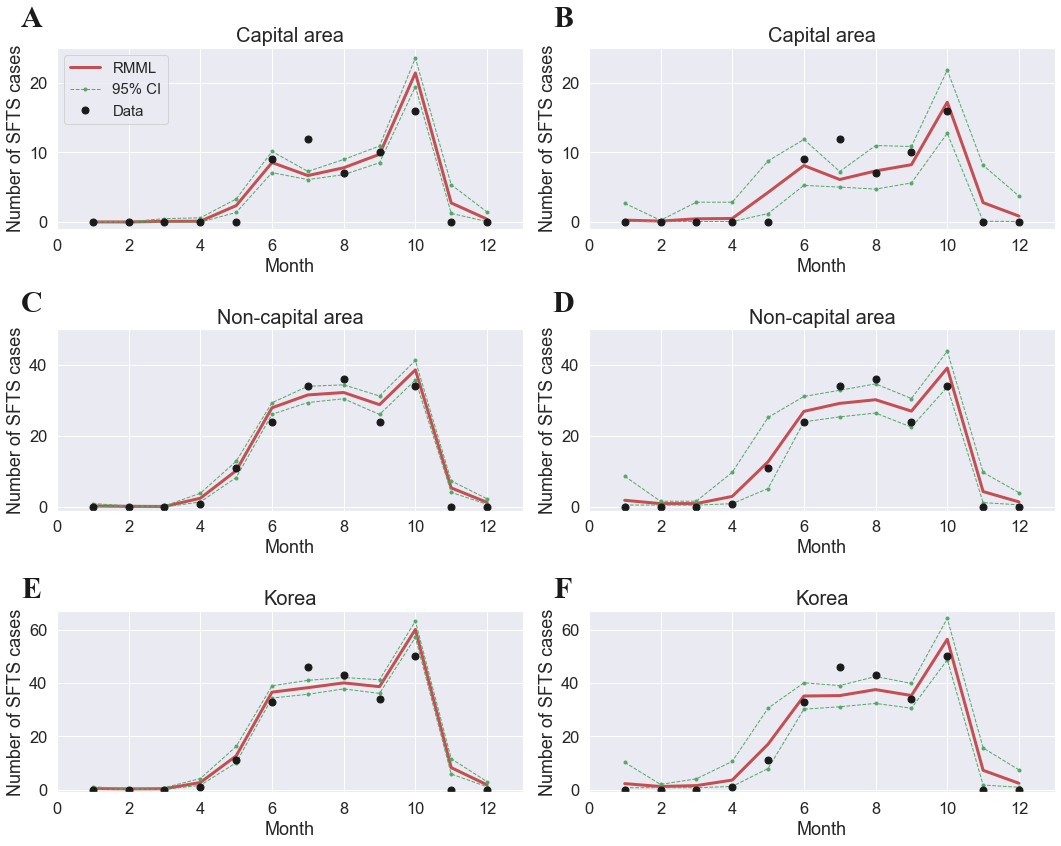

In [131]:
matplotlib.rcParams.update({'font.size': 15})
num=1
num_j=1;
plt.figure(figsize=(15,12))
for i in list(collections.Counter(three_predict['Area']).keys()):
    for j in ['GBR','BTR']:
#         plt.figure(figsize=(7,4))
#         plt.rc('axes', labelsize=10)
        plt.subplot(len(list(collections.Counter(three_predict['Area']).keys())),len(['GBR','BTR']),num)
        x = three_predict.loc[three_predict['Area']==i,'Month']
        y = three_predict.loc[three_predict['Area']==i,'Incidence']
        y_pre = three_predict.loc[three_predict['Area']==i,j+'_mean']
        y_pre1 = three_predict.loc[three_predict['Area']==i,j+'_95+']
        y_pre2 = three_predict.loc[three_predict['Area']==i,j+'_95-']
#         lines = plt.plot(x, y, '*k',x, y_pre, 'r',x, y_pre1,'--oy', x, y_pre2,'--og')
        lines = plt.plot(x, y_pre, 'r',x, y_pre1,'--.g', x, y_pre2,'--.g',x, y, 'ok')
        plt.setp(lines[0], linewidth=3)
        plt.setp(lines[1], linewidth=1)
        plt.setp(lines[2], linewidth=1)
        plt.setp(lines[3], markersize=7)
        font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
        if (num==1):
            plt.xlim([0, 13])
            plt.ylim([-1, 25])
            plt.text(-1, 28, 'A', fontdict=font2)
        if (num==2):
            plt.xlim([0, 13])
            plt.ylim([-1, 25])
            plt.text(-1, 28, 'B', fontdict=font2)
        if (num==3):
            plt.xlim([0, 13])
            plt.ylim([-1, 50])
            plt.text(-1, 55, 'C', fontdict=font2)
        if (num==4):
            plt.xlim([0, 13])
            plt.ylim([-1, 50])
            plt.text(-1, 55, 'D', fontdict=font2)
        if (num==5):
            plt.xlim([0, 13])
            plt.ylim([-1, 67])
            plt.text(-1, 72, 'E', fontdict=font2)
        if (num==6):
            plt.xlim([0, 13])
            plt.ylim([-1, 67])
            plt.text(-1, 72, 'F', fontdict=font2)
#         plt.xlabels(fontsize=16)
        plt.xlabel('Month')
        plt.ylabel('Number of SFTS cases')
        plt.labelsize=10
#         plt.ylim([-0.5, max(y_pre1)+1])
        plt.grid(True)
        if (num==1):
            plt.legend(handles=(lines[0],lines[1],lines[3]),labels=('RMML', '95% CI','Data'), fontsize=15,loc='best')
#             plt.legend(('RMML', '95% CI','Data'), fontsize=15,loc='best')#'upper right')
#             plt.legend(('Infectious', 'Predict', 'confidence 95%+', 'confidence 95%-'), fontsize=10,loc='best')#'upper right')
        plt.rc('axes', titlesize=20)
        plt.title(i)
        plt.rcParams['font.family'] = 'Arial'
        plt.tight_layout()
#         plt.savefig('fig5_'+str(num)+'.tiff', dpi=300)
        num=num+1
plt.show()

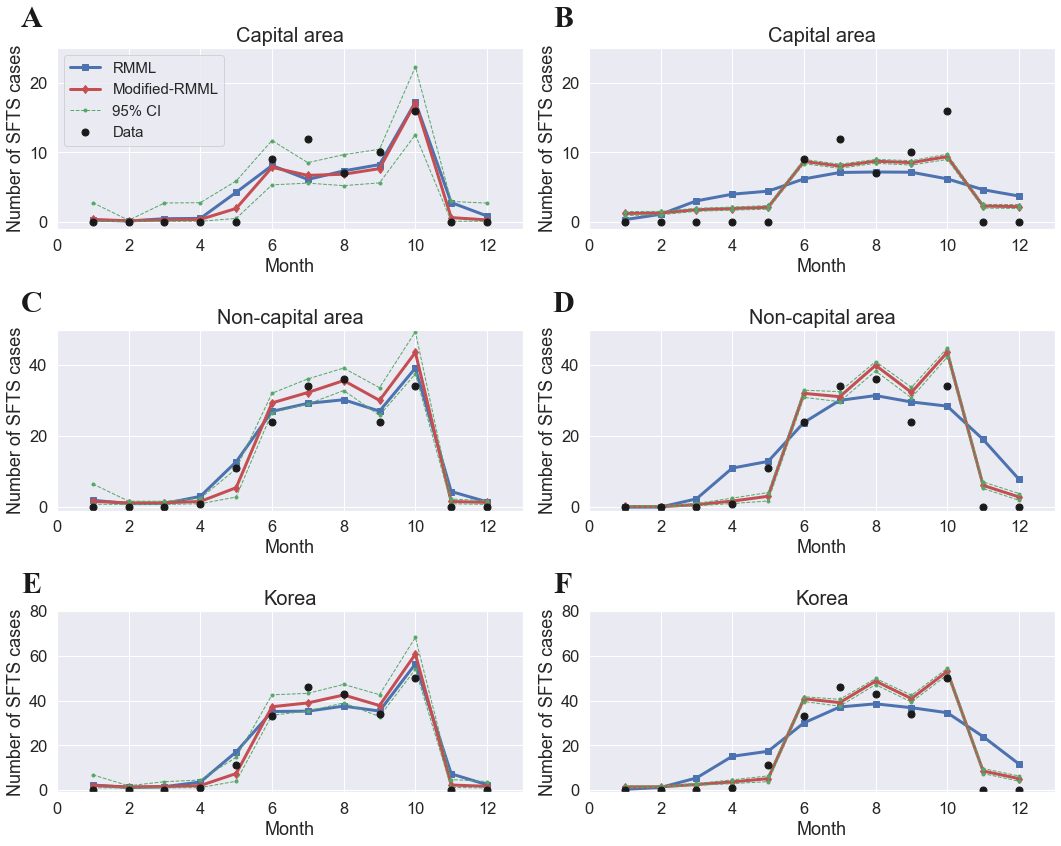

In [132]:
num=1
num_j=1;
plt.figure(figsize=(15,12))
for i in list(collections.Counter(three_predict['Area']).keys()):
    for j in ['BTR','MLPR']:
#         plt.figure(figsize=(7,4))
        plt.subplot(len(list(collections.Counter(three_predict['Area']).keys())),len(['BTR','MLPR']),num)
        x = three_predict.loc[three_predict['Area']==i,'Month']
        y = three_predict.loc[three_predict['Area']==i,'Incidence']
        y_pre = three_predict.loc[three_predict['Area']==i,j+'_mean']
        y_pre1 = three_predict_2.loc[three_predict_2['Area']==i,j+'_mean']
        y_pre2 = three_predict_2.loc[three_predict_2['Area']==i,j+'_95+']
        y_pre3 = three_predict_2.loc[three_predict_2['Area']==i,j+'_95-']
        lines = plt.plot(x, y_pre, 'bs-',x, y_pre1,'rd-',x, y_pre2,'--.g', x, y_pre3,'--.g',x, y, 'ok')
        
        plt.setp(lines[0], linewidth=3)
        plt.setp(lines[1], linewidth=3)
        plt.setp(lines[2], linewidth=1)
        plt.setp(lines[3], linewidth=1)
        plt.setp(lines[4], markersize=7)
        
        font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
        if (num==1):
            plt.xlim([0, 13])
            plt.ylim([-1, 25])
            plt.text(-1, 28, 'A', fontdict=font2)
        if (num==2):
            plt.xlim([0, 13])
            plt.ylim([-1, 25])
            plt.text(-1, 28, 'B', fontdict=font2)
        if (num==3):
            plt.xlim([0, 13])
            plt.ylim([-1, 50])
            plt.text(-1, 55, 'C', fontdict=font2)
        if (num==4):
            plt.xlim([0, 13])
            plt.ylim([-1, 50])
            plt.text(-1, 55, 'D', fontdict=font2)
        if (num==5):
            plt.xlim([0, 13])
            plt.ylim([-1, 80])
            plt.text(-1, 88, 'E', fontdict=font2)
        if (num==6):
            plt.xlim([0, 13])
            plt.ylim([-1, 80])
            plt.text(-1, 88, 'F', fontdict=font2)
            
        plt.xlabel('Month')
        plt.ylabel('Number of SFTS cases')
        plt.grid(True)
#         plt.ylim([0, 22])
        if (num==1):
            plt.legend(handles=(lines[0],lines[1],lines[2],lines[4]),labels=('RMML', 'Modified-RMML', '95% CI','Data'), fontsize=15,loc='best')#'upper right')
#             plt.legend(('RMML', 'Modified-RMML', '95% CI','','Data'), fontsize=15,loc='best')#'upper right')
        plt.rc('axes', titlesize=20)
        plt.title(i)
        plt.rcParams['font.family'] = 'Arial'
        plt.tight_layout()
        num=num+1
plt.show()

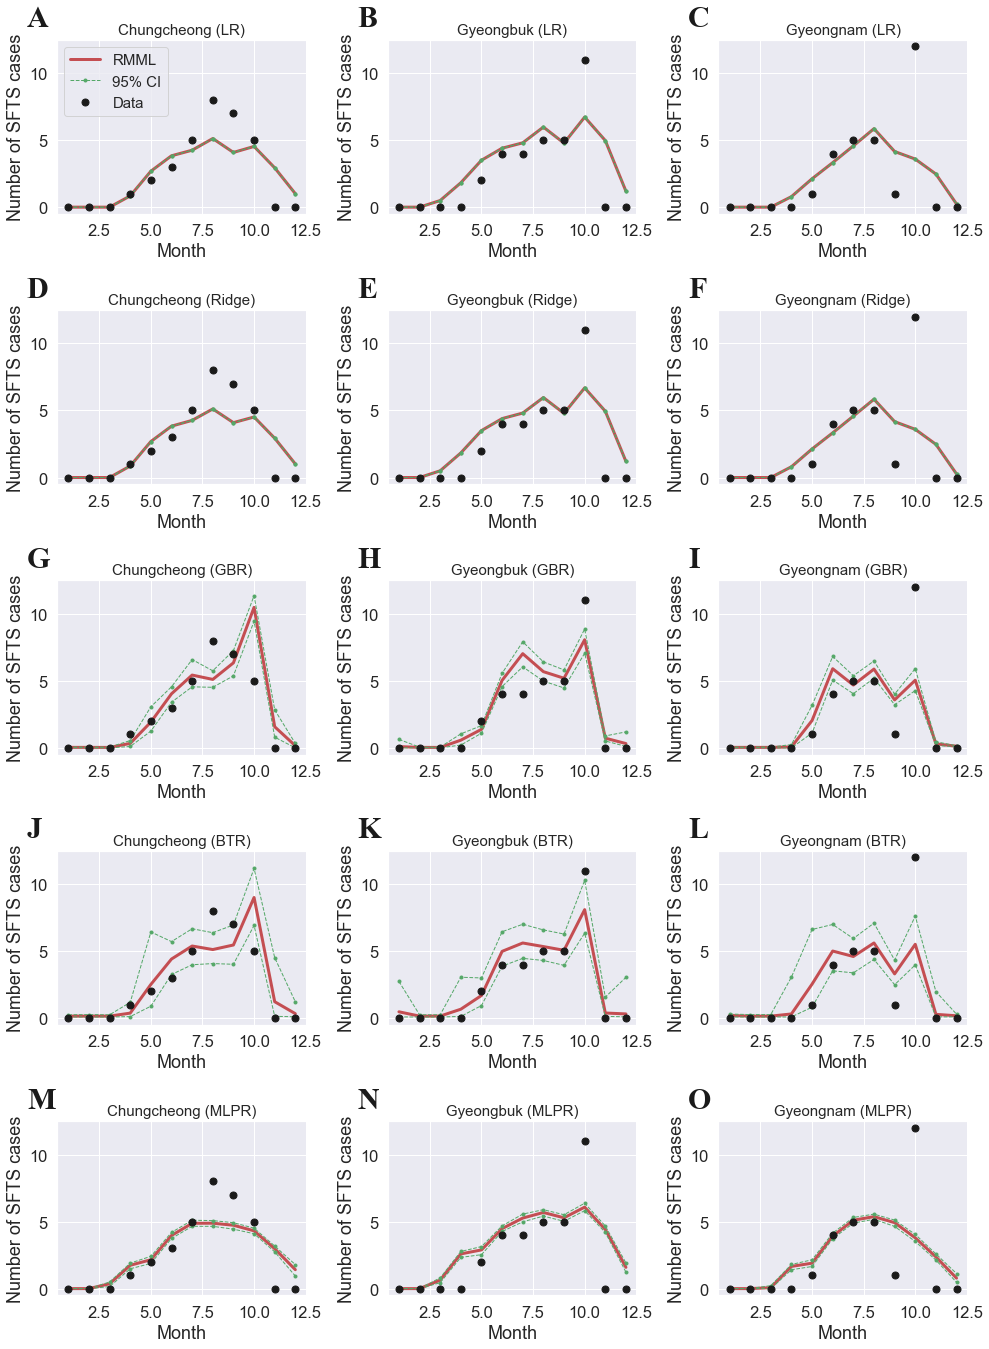

In [134]:
num=1
num_j=1;
plt.figure(figsize=(14,19))
for j in machine_values_new:
    for i in list(collections.Counter(predict_sum['Area']).keys())[1:4]:
#         plt.figure(figsize=(7,4))
        plt.subplot(len(machine_values_new),len(list(collections.Counter(predict_sum['Area']).keys())[1:4]),num)
        x = predict_sum.loc[predict_sum['Area']==i,'Month']
        y = predict_sum.loc[predict_sum['Area']==i,'Incidence']
        y_pre = predict_sum.loc[predict_sum['Area']==i,j+'_mean']
        y_pre1 = predict_sum.loc[predict_sum['Area']==i,j+'_95+']
        y_pre2 = predict_sum.loc[predict_sum['Area']==i,j+'_95-']
        lines = plt.plot(x, y_pre, 'r',x, y_pre1,'--.g', x, y_pre2,'--.g',x, y, 'ok')
        
        plt.setp(lines[0], linewidth=3)
        plt.setp(lines[1], linewidth=1)
        plt.setp(lines[2], linewidth=1)
        plt.setp(lines[3], markersize=7)
        
        font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
        plt.text(-1, 13.5, chr(64+num), fontdict=font2)
            
        plt.xlabel('Month')
        plt.ylabel('Number of SFTS cases')
        plt.ylim([-0.5, 12.5])
        plt.grid(True)
        if (num==1):
            plt.legend(handles=(lines[0],lines[1],lines[3]),labels=('RMML', '95% CI','Data'), fontsize=15,loc='best')
#             plt.legend(('Data', 'Estimation', '95% CI'), fontsize=10,loc='best')#'upper right')
        plt.rc('axes', titlesize=15)
        plt.title(i + ' (' + j + ')')
        plt.tight_layout()
        num=num+1
plt.show()

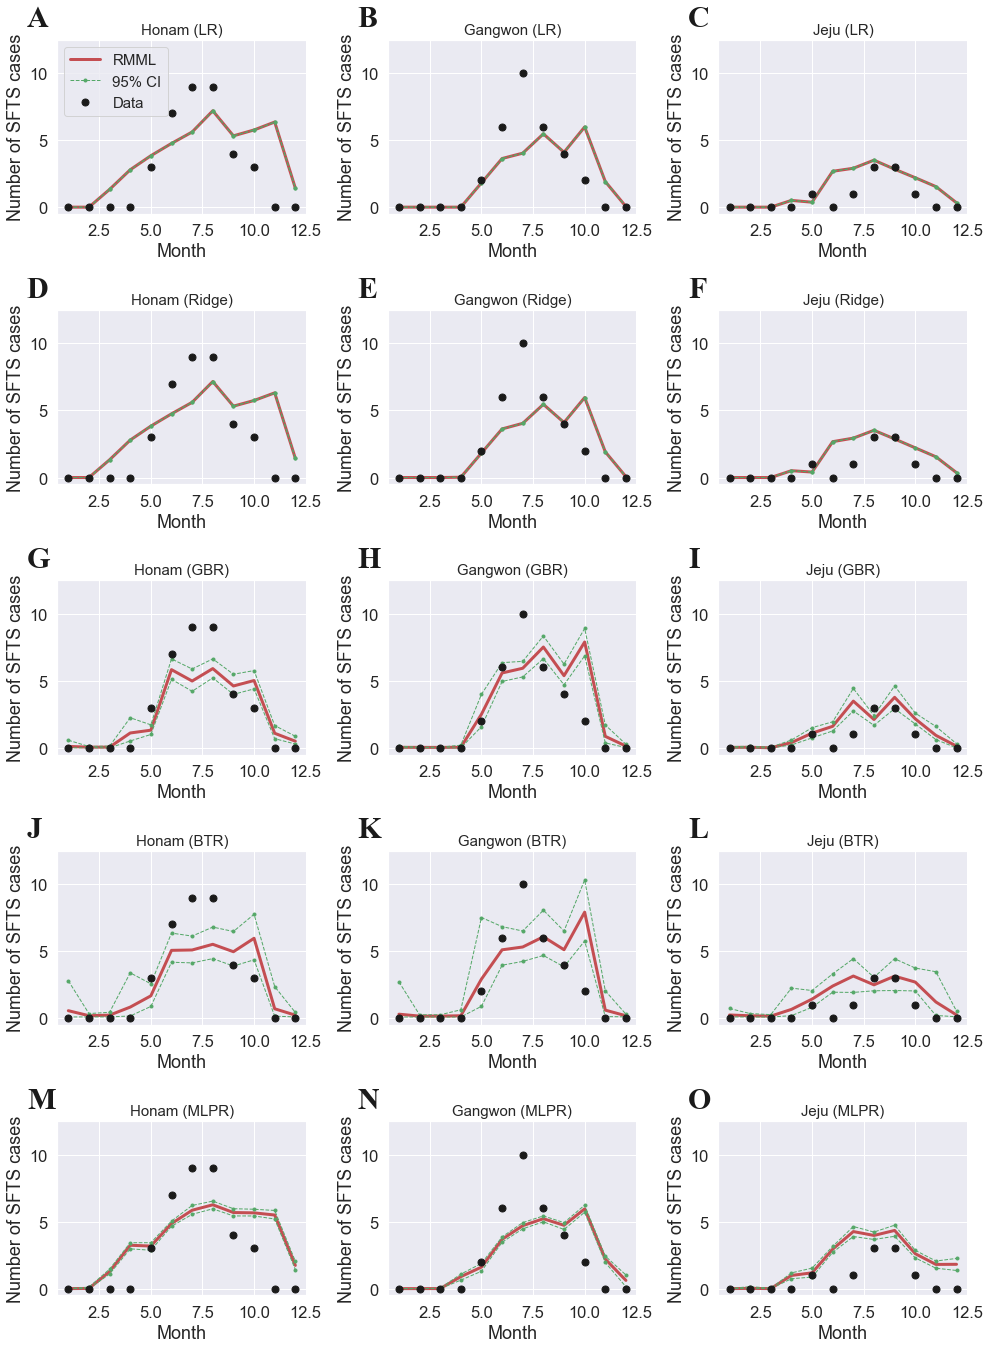

In [135]:
num=1
num_j=1;
plt.figure(figsize=(14,19))
for j in machine_values_new:
    for i in list(collections.Counter(predict_sum['Area']).keys())[4:7]:
        plt.subplot(len(machine_values_new),len(list(collections.Counter(predict_sum['Area']).keys())[4:7]),num)
        x = predict_sum.loc[predict_sum['Area']==i,'Month']
        y = predict_sum.loc[predict_sum['Area']==i,'Incidence']
        y_pre = predict_sum.loc[predict_sum['Area']==i,j+'_mean']
        y_pre1 = predict_sum.loc[predict_sum['Area']==i,j+'_95+']
        y_pre2 = predict_sum.loc[predict_sum['Area']==i,j+'_95-']
        lines = plt.plot(x, y_pre, 'r',x, y_pre1,'--.g', x, y_pre2,'--.g',x, y, 'ok')
        
        plt.setp(lines[0], linewidth=3)
        plt.setp(lines[1], linewidth=1)
        plt.setp(lines[2], linewidth=1)
        plt.setp(lines[3], markersize=7)
        
        font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
        plt.text(-1, 13.5, chr(64+num), fontdict=font2)
        
        plt.xlabel('Month')
        plt.ylabel('Number of SFTS cases')
        plt.ylim([-0.5, 12.5])
        plt.grid(True)
        if (num==1):
            plt.legend(handles=(lines[0],lines[1],lines[3]),labels=('RMML', '95% CI','Data'), fontsize=15,loc='best')
#             plt.legend(('Data', 'Estimation', '95% CI'), fontsize=10,loc='best')#'upper right')
        plt.rc('axes', titlesize=15)
        plt.title(i + ' (' + j + ')')
        plt.tight_layout()
        num=num+1
plt.show()

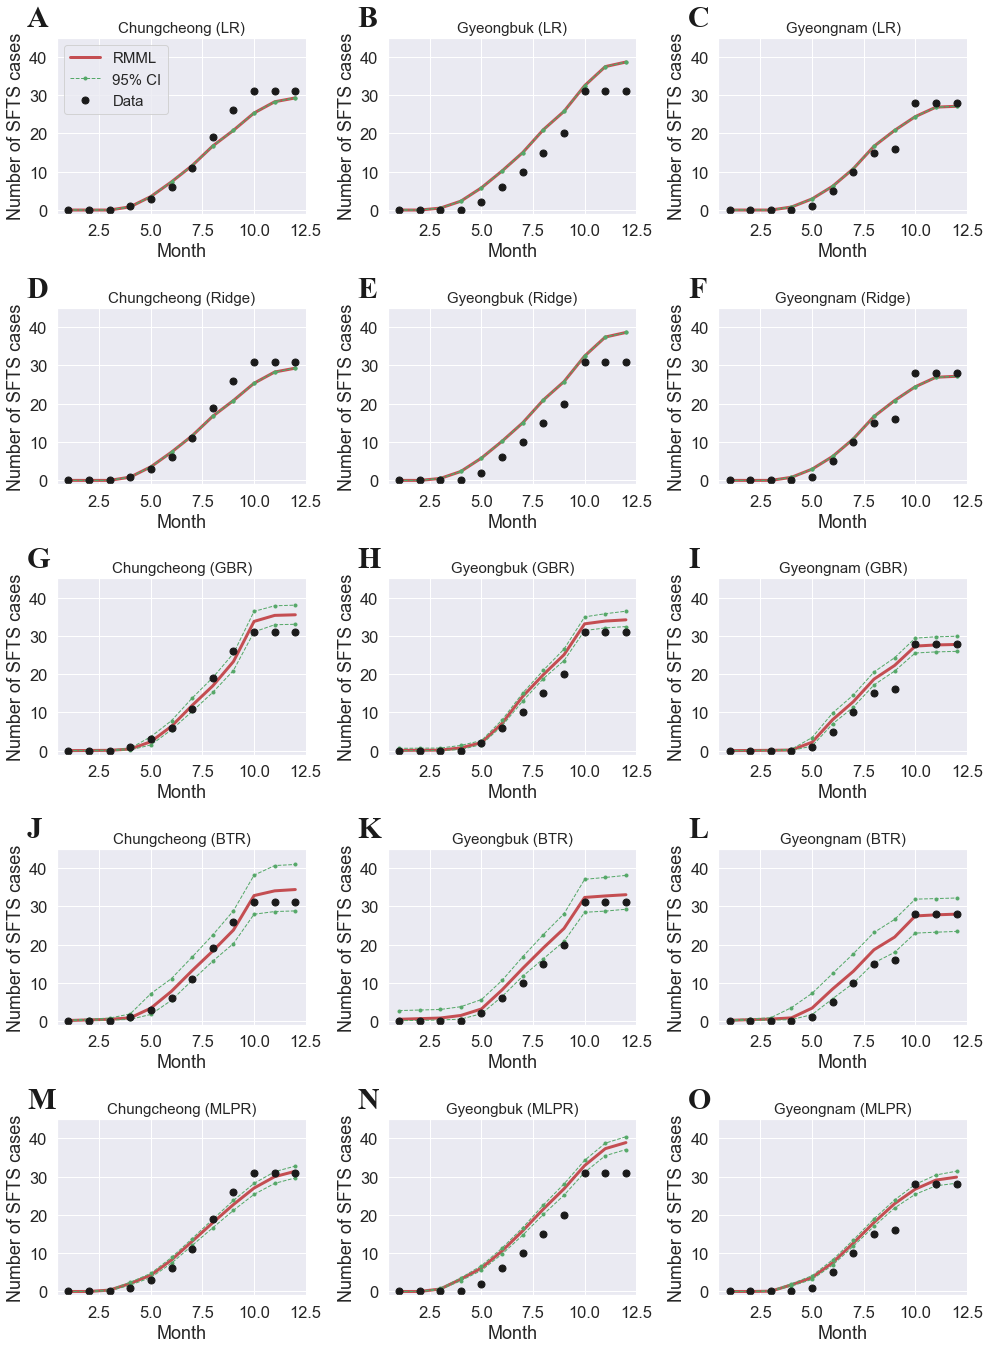

In [136]:
num=1
num_j=1;
plt.figure(figsize=(14,19))
for j in machine_values_new:
    for i in list(collections.Counter(CMP_sum['Area']).keys())[1:4]:
        plt.subplot(len(machine_values_new),len(list(collections.Counter(CMP_sum['Area']).keys())[1:4]),num)
        x = CMP_sum.loc[CMP_sum['Area']==i,'Month']
        y = CMP_sum.loc[CMP_sum['Area']==i,'Incidence']
        y_pre = CMP_sum.loc[CMP_sum['Area']==i,j+'_mean']
        y_pre1 = CMP_sum.loc[CMP_sum['Area']==i,j+'_95+']
        y_pre2 = CMP_sum.loc[CMP_sum['Area']==i,j+'_95-']
        lines = plt.plot(x, y_pre, 'r',x, y_pre1,'--.g', x, y_pre2,'--.g',x, y, 'ok')
        
        plt.setp(lines[0], linewidth=3)
        plt.setp(lines[1], linewidth=1)
        plt.setp(lines[2], linewidth=1)
        plt.setp(lines[3], markersize=7)
        font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
        plt.text(-1, 48, chr(64+num), fontdict=font2)
        
        plt.xlabel('Month')
        plt.ylabel('Number of SFTS cases')
        plt.ylim([-1, 45])
        plt.grid(True)
        if (num==1):
            plt.legend(handles=(lines[0],lines[1],lines[3]),labels=('RMML', '95% CI','Data'), fontsize=15,loc='best')
#             plt.legend(('Data', 'Estimation', '95% CI'), fontsize=10,loc='best')#'upper right')
        plt.rc('axes', titlesize=15)
        plt.title(i + ' (' + j + ')')
        plt.tight_layout()
        num=num+1
plt.show()

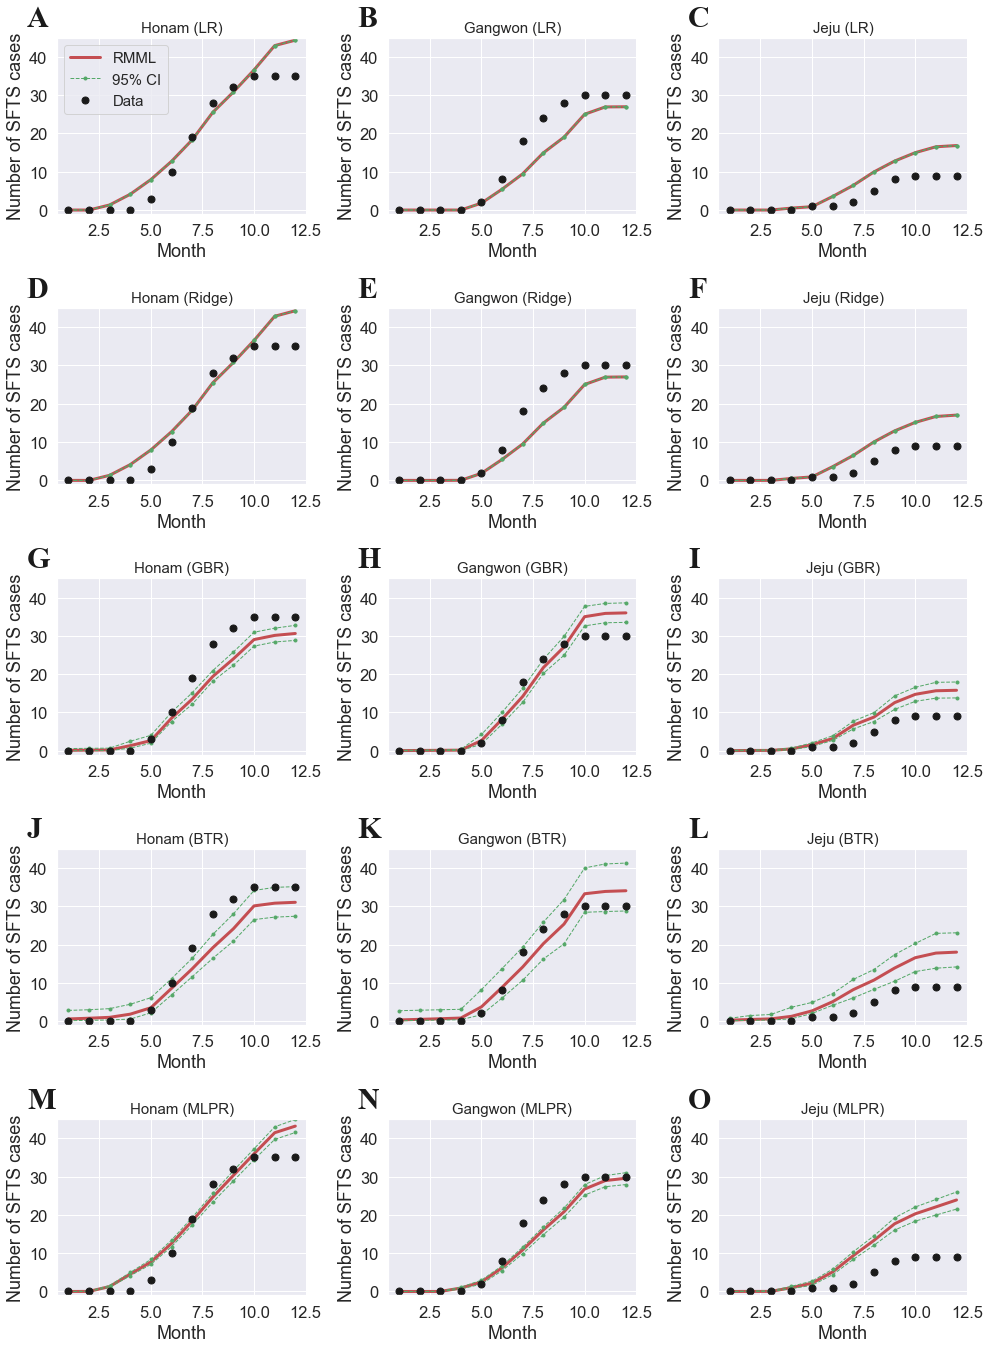

In [138]:
num=1
num_j=1;
plt.figure(figsize=(14,19))
for j in machine_values_new:
    for i in list(collections.Counter(CMP_sum['Area']).keys())[4:7]:
        plt.subplot(len(machine_values_new),len(list(collections.Counter(CMP_sum['Area']).keys())[4:7]),num)
        x = CMP_sum.loc[CMP_sum['Area']==i,'Month']
        y = CMP_sum.loc[CMP_sum['Area']==i,'Incidence']
        y_pre = CMP_sum.loc[CMP_sum['Area']==i,j+'_mean']
        y_pre1 = CMP_sum.loc[CMP_sum['Area']==i,j+'_95+']
        y_pre2 = CMP_sum.loc[CMP_sum['Area']==i,j+'_95-']
        lines = plt.plot(x, y_pre, 'r',x, y_pre1,'--.g', x, y_pre2,'--.g',x, y, 'ok')
        
        plt.setp(lines[0], linewidth=3)
        plt.setp(lines[1], linewidth=1)
        plt.setp(lines[2], linewidth=1)
        plt.setp(lines[3], markersize=7)
        font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
        plt.text(-1, 48, chr(64+num), fontdict=font2)
        
        plt.xlabel('Month')
        plt.ylabel('Number of SFTS cases')
        plt.ylim([-1, 45])
        plt.grid(True)
        if (num==1):
            plt.legend(handles=(lines[0],lines[1],lines[3]),labels=('RMML', '95% CI','Data'), fontsize=15,loc='best')
#             plt.legend(('Data', 'Estimation', '95% CI'), fontsize=10,loc='best')#'upper right')
        plt.rc('axes', titlesize=15)
        plt.title(i + ' (' + j + ')')
        plt.tight_layout()
        num=num+1
plt.show()

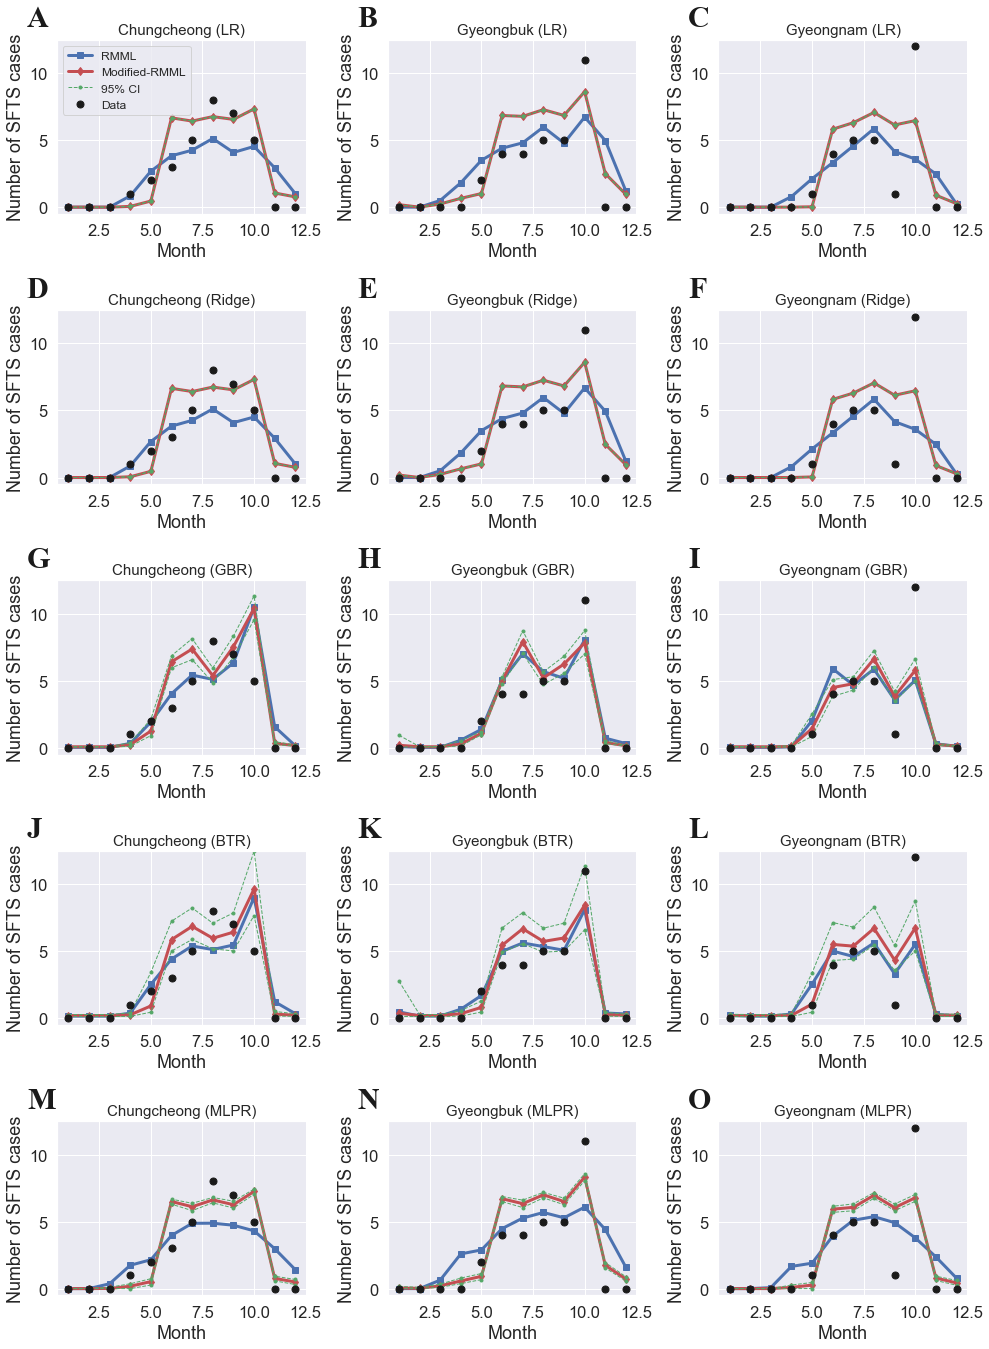

In [140]:
num=1
num_j=1;
plt.figure(figsize=(14,19))
for j in machine_values_new:
    for i in list(collections.Counter(predict_sum['Area']).keys())[1:4]:
        plt.subplot(len(machine_values_new),len(list(collections.Counter(predict_sum['Area']).keys())[1:4]),num)
        x = predict_sum.loc[predict_sum['Area']==i,'Month']
        y = predict_sum.loc[predict_sum['Area']==i,'Incidence']
        y_pre = predict_sum.loc[predict_sum['Area']==i,j+'_mean']
        y_pre1 = predict_sum_2.loc[predict_sum_2['Area']==i,j+'_mean']
        y_pre2 = predict_sum_2.loc[predict_sum_2['Area']==i,j+'_95+']
        y_pre3 = predict_sum_2.loc[predict_sum_2['Area']==i,j+'_95-']
        lines = plt.plot(x, y_pre, 'bs-',x, y_pre1,'rd-',x, y_pre2,'--.g', x, y_pre3,'--.g',x, y, 'ok')
        
        plt.setp(lines[0], linewidth=3)
        plt.setp(lines[1], linewidth=3)
        plt.setp(lines[2], linewidth=1)
        plt.setp(lines[3], linewidth=1)
        plt.setp(lines[4], markersize=7)
        
        font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
        plt.text(-1, 13.5, chr(64+num), fontdict=font2)
        
        plt.xlabel('Month')
        plt.ylabel('Number of SFTS cases')
        plt.ylim([-0.5, 12.5])
        plt.grid(True)
        if (num==1):
            plt.legend(handles=(lines[0],lines[1],lines[2],lines[4]),labels=('RMML', 'Modified-RMML', '95% CI','Data'), fontsize=12,loc='best')#'upper right')
#             plt.legend(('Data', 'Estimation', 'Modified_estimation', '95% CI'), fontsize=10,loc='best')#'upper right')
        plt.rc('axes', titlesize=15)
        plt.title(i + ' (' + j + ')')
        plt.tight_layout()
        num=num+1
plt.show()

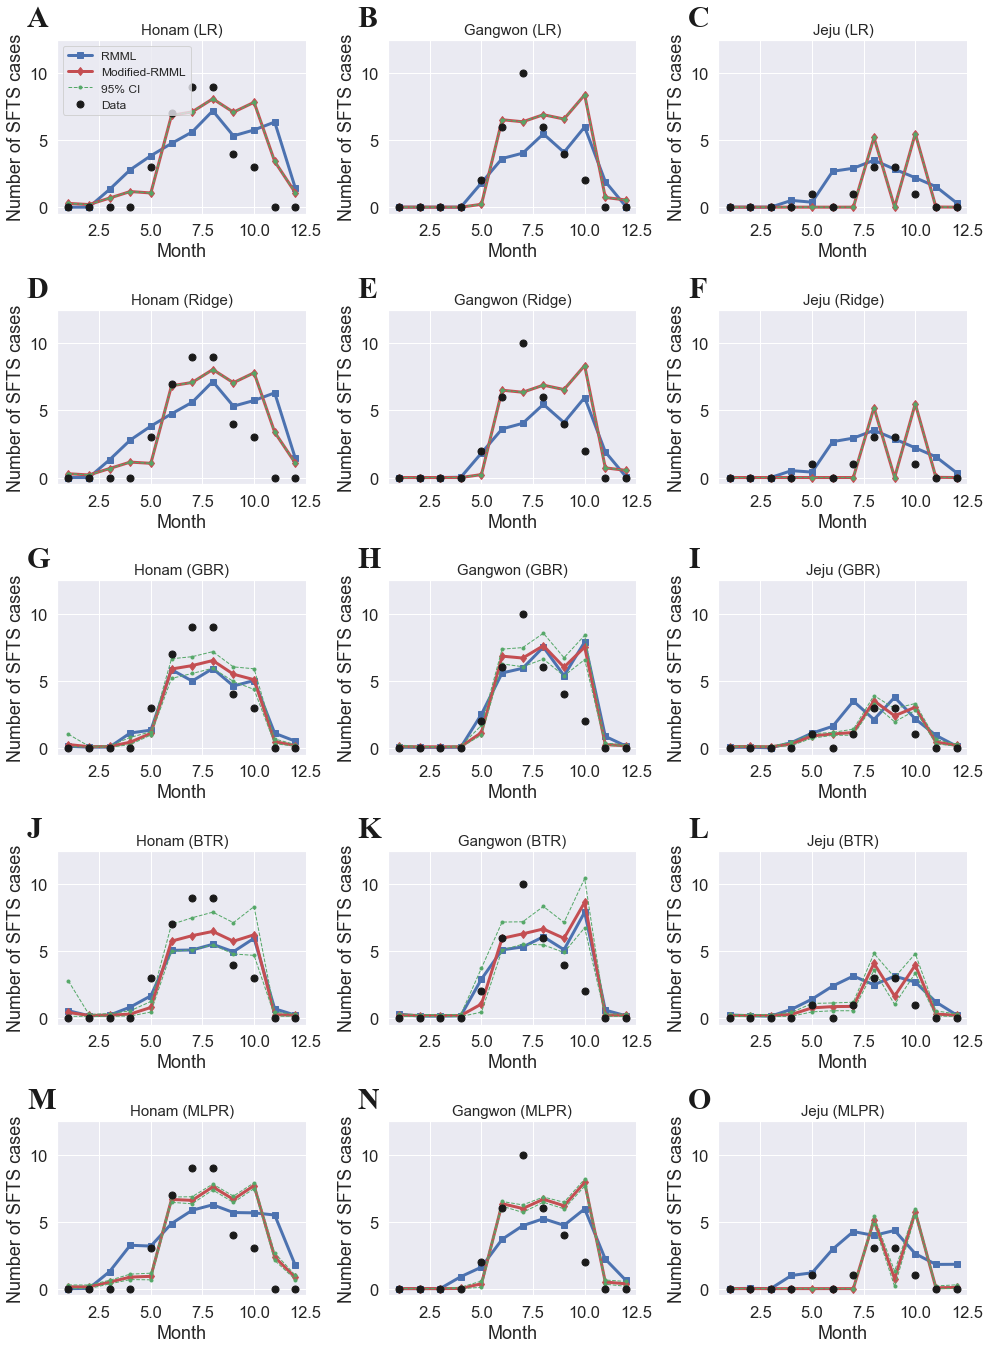

In [141]:
num=1
num_j=1;
plt.figure(figsize=(14,19))
for j in machine_values_new:
    for i in list(collections.Counter(predict_sum['Area']).keys())[4:7]:
        plt.subplot(len(machine_values_new),len(list(collections.Counter(predict_sum['Area']).keys())[4:7]),num)
        x = predict_sum.loc[predict_sum['Area']==i,'Month']
        y = predict_sum.loc[predict_sum['Area']==i,'Incidence']
        y_pre = predict_sum.loc[predict_sum['Area']==i,j+'_mean']
        y_pre1 = predict_sum_2.loc[predict_sum_2['Area']==i,j+'_mean']
        y_pre2 = predict_sum_2.loc[predict_sum_2['Area']==i,j+'_95+']
        y_pre3 = predict_sum_2.loc[predict_sum_2['Area']==i,j+'_95-']
        lines = plt.plot(x, y_pre, 'bs-',x, y_pre1,'rd-',x, y_pre2,'--.g', x, y_pre3,'--.g',x, y, 'ok')
        
        plt.setp(lines[0], linewidth=3)
        plt.setp(lines[1], linewidth=3)
        plt.setp(lines[2], linewidth=1)
        plt.setp(lines[3], linewidth=1)
        plt.setp(lines[4], markersize=7)
        
        font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
        plt.text(-1, 13.5, chr(64+num), fontdict=font2)
        
        plt.xlabel('Month')
        plt.ylabel('Number of SFTS cases')
        plt.ylim([-0.5, 12.5])
        plt.grid(True)
        if (num==1):
            plt.legend(handles=(lines[0],lines[1],lines[2],lines[4]),labels=('RMML', 'Modified-RMML', '95% CI','Data'), fontsize=12,loc='best')#'upper right')
#             plt.legend(('Data', 'Estimation', 'Modified_estimation', '95% CI'), fontsize=10,loc='best')#'upper right')
        plt.rc('axes', titlesize=15)
        plt.title(i + ' (' + j + ')')
        plt.tight_layout()
        num=num+1
plt.show()

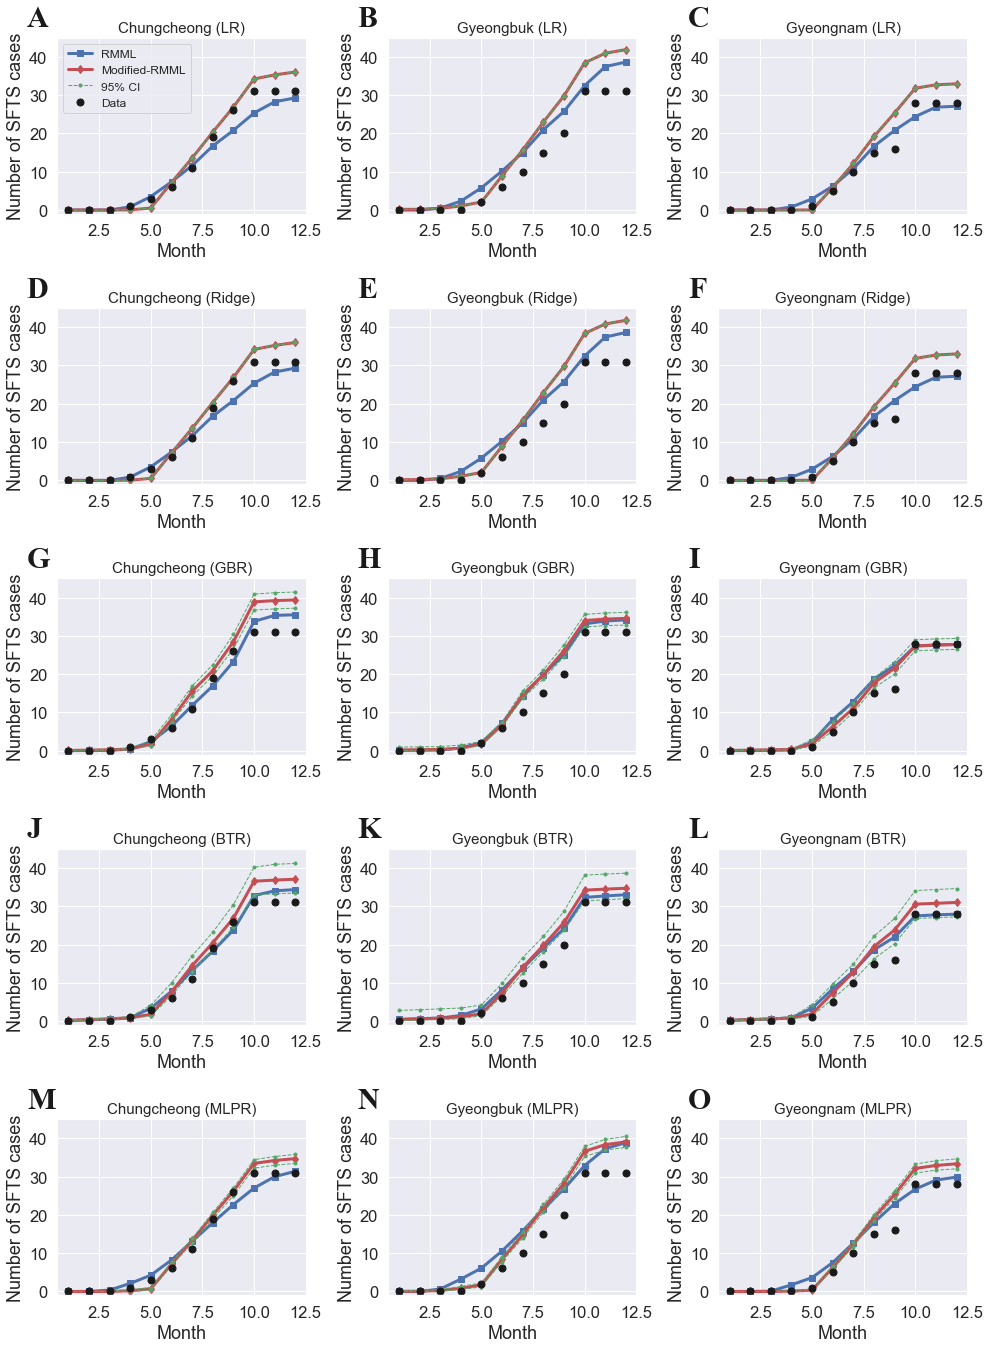

In [142]:
num=1
num_j=1;
plt.figure(figsize=(14,19))
for j in machine_values_new:
    for i in list(collections.Counter(CMP_sum['Area']).keys())[1:4]:
        plt.subplot(len(machine_values_new),len(list(collections.Counter(CMP_sum['Area']).keys())[1:4]),num)
        x = CMP_sum.loc[CMP_sum['Area']==i,'Month']
        y = CMP_sum.loc[CMP_sum['Area']==i,'Incidence']
        y_pre = CMP_sum.loc[CMP_sum['Area']==i,j+'_mean']
        y_pre1 = CMP_sum_2.loc[CMP_sum_2['Area']==i,j+'_mean']
        y_pre2 = CMP_sum_2.loc[CMP_sum_2['Area']==i,j+'_95+']
        y_pre3 = CMP_sum_2.loc[CMP_sum_2['Area']==i,j+'_95-']
        lines = plt.plot(x, y_pre, 'bs-',x, y_pre1,'rd-',x, y_pre2,'--.g', x, y_pre3,'--.g',x, y, 'ok')
        
        plt.setp(lines[0], linewidth=3)
        plt.setp(lines[1], linewidth=3)
        plt.setp(lines[2], linewidth=1)
        plt.setp(lines[3], linewidth=1)
        plt.setp(lines[4], markersize=7)
        
        font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
        plt.text(-1, 48, chr(64+num), fontdict=font2)
        
        plt.xlabel('Month')
        plt.ylabel('Number of SFTS cases')
        plt.ylim([-1, 45])
        plt.grid(True)
        if (num==1):
            plt.legend(handles=(lines[0],lines[1],lines[2],lines[4]),labels=('RMML', 'Modified-RMML', '95% CI','Data'), fontsize=12,loc='best')#'upper right')
#             plt.legend(('Data', 'Estimation', 'Modified_estimation', '95% CI'), fontsize=10,loc='best')#'upper right')
        plt.rc('axes', titlesize=15)
        plt.title(i + ' (' + j + ')')
        plt.tight_layout()
        num=num+1
plt.show()

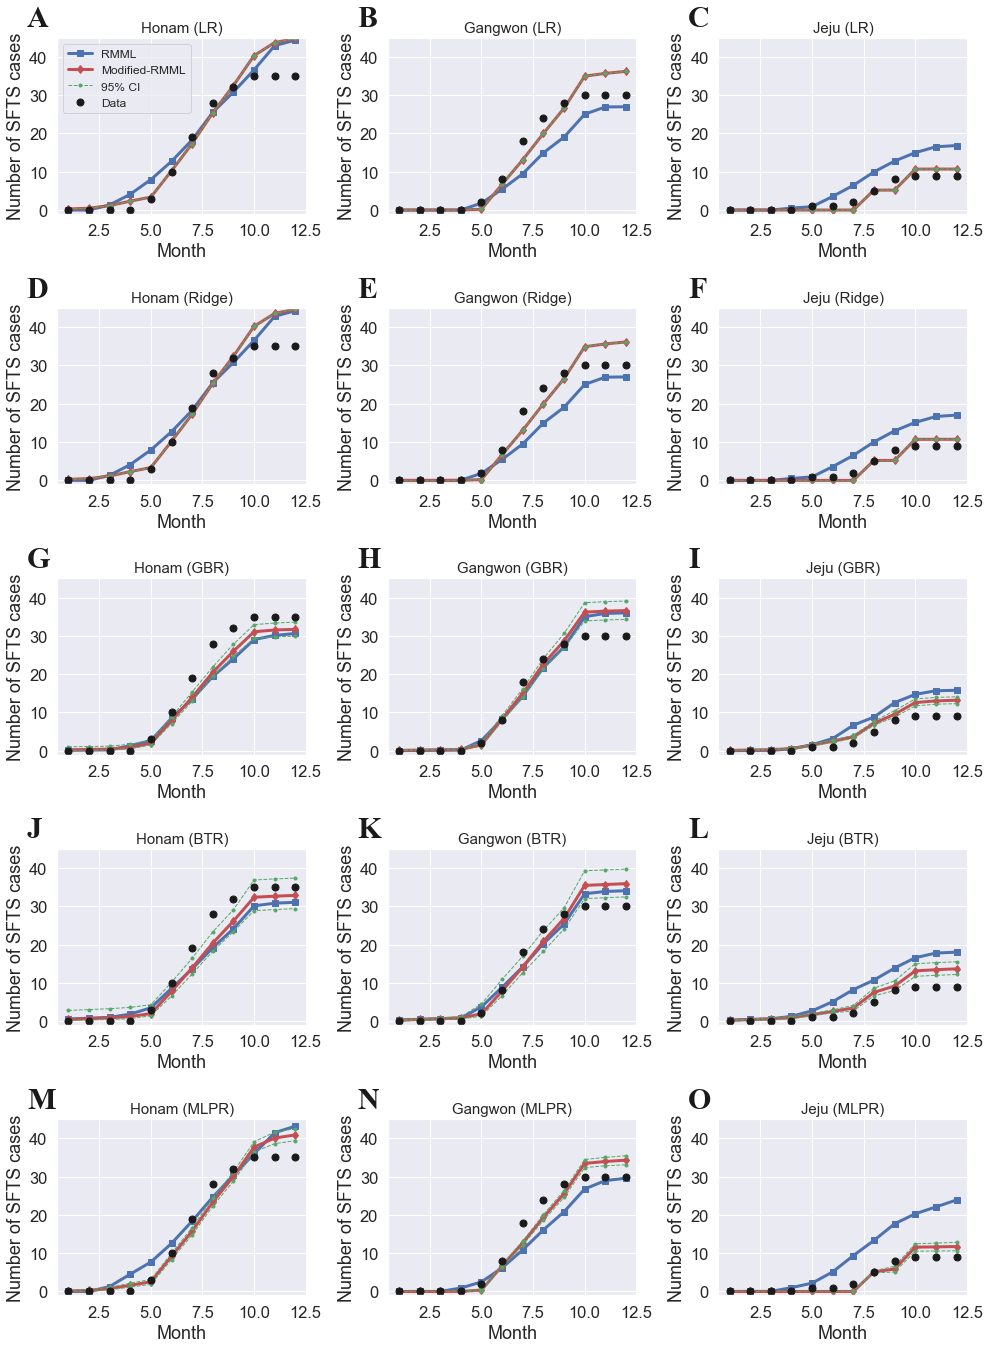

In [143]:
num=1
num_j=1;
plt.figure(figsize=(14,19))
for j in machine_values_new:
    for i in list(collections.Counter(CMP_sum['Area']).keys())[4:7]:
        plt.subplot(len(machine_values_new),len(list(collections.Counter(CMP_sum['Area']).keys())[4:7]),num)
        x = CMP_sum.loc[CMP_sum['Area']==i,'Month']
        y = CMP_sum.loc[CMP_sum['Area']==i,'Incidence']
        y_pre = CMP_sum.loc[CMP_sum['Area']==i,j+'_mean']
        y_pre1 = CMP_sum_2.loc[CMP_sum_2['Area']==i,j+'_mean']
        y_pre2 = CMP_sum_2.loc[CMP_sum_2['Area']==i,j+'_95+']
        y_pre3 = CMP_sum_2.loc[CMP_sum_2['Area']==i,j+'_95-']
        lines = plt.plot(x, y_pre, 'bs-',x, y_pre1,'rd-',x, y_pre2,'--.g', x, y_pre3,'--.g',x, y, 'ok')
        
        plt.setp(lines[0], linewidth=3)
        plt.setp(lines[1], linewidth=3)
        plt.setp(lines[2], linewidth=1)
        plt.setp(lines[3], linewidth=1)
        plt.setp(lines[4], markersize=7)
        
        font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
        plt.text(-1, 48, chr(64+num), fontdict=font2)
        
        plt.xlabel('Month')
        plt.ylabel('Number of SFTS cases')
        plt.ylim([-1, 45])
        plt.grid(True)
        if (num==1):
            plt.legend(handles=(lines[0],lines[1],lines[2],lines[4]),labels=('RMML', 'Modified-RMML', '95% CI','Data'), fontsize=12,loc='best')#'upper right')
#             plt.legend(('Data', 'Estimation', 'Modified_estimation', '95% CI'), fontsize=10,loc='best')#'upper right')
        plt.rc('axes', titlesize=15)
        plt.title(i + ' (' + j + ')')
        plt.tight_layout()
        num=num+1
plt.show()

In [158]:
Result_ACC=pd.DataFrame(columns={'Estimator'})

In [159]:
result_sum.rename(columns = {'linear_mean' : 'LR_mean',
                             'linear_95+' : 'LR_95+',
                            'linear_95-' : 'LR_95-'},inplace = True)

In [160]:
result_sum_2.rename(columns = {'linear_mean' : 'LR_mean',
                             'linear_95+' : 'LR_95+',
                            'linear_95-' : 'LR_95-'},inplace = True)

In [161]:
num=0
for i in machine_values_new:
    Result_ACC.loc[num,'Estimator']=i
    Result_ACC.loc[num,'train_accuracy_1']=((result_sum['Incidence']-result_sum[i+'_mean'])**2).mean()
    Result_ACC.loc[num,'test_accuracy_1']=((predict_sum['Incidence']-predict_sum[i+'_mean'])**2).mean()
    Result_ACC.loc[num,'R_square_train1']=r2_score(result_sum['Incidence'], result_sum[i+'_mean'])
    Result_ACC.loc[num,'R_square_test1']=r2_score(predict_sum['Incidence'], predict_sum[i+'_mean'])
    num=num+1

In [162]:
num=0
for i in machine_values_new:
    Result_ACC.loc[num,'train_accuracy_2']=((result_sum_2['Incidence']-result_sum_2[i+'_mean'])**2).mean()
    Result_ACC.loc[num,'test_accuracy_2']=((predict_sum_2['Incidence']-predict_sum_2[i+'_mean'])**2).mean()
    Result_ACC.loc[num,'R_square_train2']=r2_score(result_sum_2['Incidence'], result_sum_2[i+'_mean'])
    Result_ACC.loc[num,'R_square_test2']=r2_score(predict_sum_2['Incidence'], predict_sum_2[i+'_mean'])
    num=num+1

In [163]:
Result_ACC

,Estimator,train_accuracy_1,test_accuracy_1,R_square_train1,R_square_test1,train_accuracy_2,test_accuracy_2,R_square_train2,R_square_test2
0,LR,11.047995,6.454692,0.386525,0.516864,6.766846,4.688257,0.624249,0.649082
1,Ridge,11.053812,6.452449,0.386202,0.517031,6.769638,4.677858,0.624094,0.649860
2,GBR,0.414268,3.602263,0.976996,0.730369,0.204202,3.168449,0.988661,0.762840
3,BTR,2.653983,3.381656,0.852629,0.746882,1.490390,3.037548,0.917241,0.772638
4,MLPR,11.209569,6.672113,0.377553,0.500589,6.721908,4.169633,0.626745,0.687901


In [164]:
Result_ACC_new=Result_ACC.drop(2)
Result_ACC_new.index=range(len(Result_ACC_new))

In [165]:
Result_ACC_new

,Estimator,train_accuracy_1,test_accuracy_1,R_square_train1,R_square_test1,train_accuracy_2,test_accuracy_2,R_square_train2,R_square_test2
0,LR,11.047995,6.454692,0.386525,0.516864,6.766846,4.688257,0.624249,0.649082
1,Ridge,11.053812,6.452449,0.386202,0.517031,6.769638,4.677858,0.624094,0.649860
2,BTR,2.653983,3.381656,0.852629,0.746882,1.490390,3.037548,0.917241,0.772638
3,MLPR,11.209569,6.672113,0.377553,0.500589,6.721908,4.169633,0.626745,0.687901


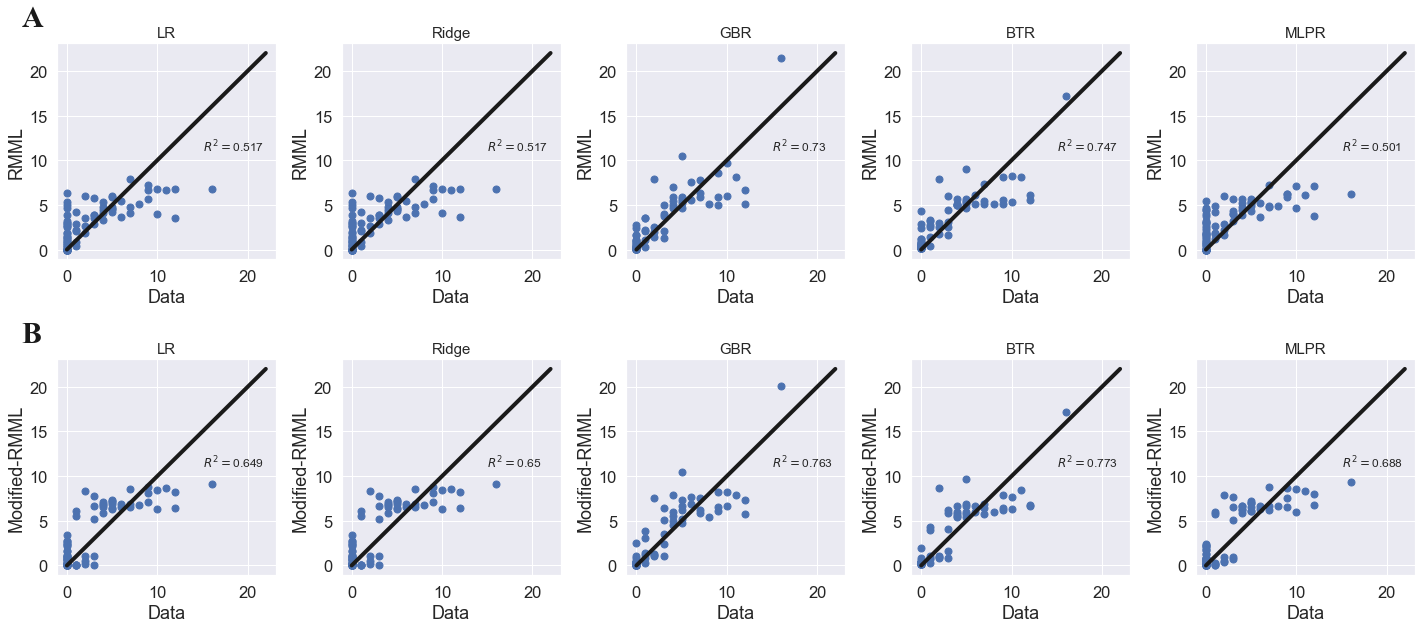

In [166]:
plt.figure(figsize=(20,9))
font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
for i in range(2):
    if (i==0):
        num=1
        num_j=1;
        for j in machine_values_new:
#     Result_ACC.loc[num-1,'R_square_test1']=r2_score(predict_sum['Incidence'], predict_sum[j+'_mean'])
            plt.subplot(2,len(machine_values_new),num)
            x = np.linspace(0,22)
            y = x
            lines=plt.plot(predict_sum['Incidence'],predict_sum[j+'_mean'],'o',x,y,'k')
            plt.setp(lines[0], markersize=7)
            plt.setp(lines[1], linewidth=4)
            plt.xlabel('Data')
            plt.ylabel('RMML')
            plt.title(j)
            plt.grid(True)
            plt.text(15, 11, r'$R^2=$'+ str(round(Result_ACC.loc[num-1,'R_square_test1'],3)), fontsize=12)
            font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
            if (num==1):
                plt.text(-5, 25, 'A', fontdict=font2)
            plt.tight_layout()
            num=num+1
    else:
        num=1
        for j in machine_values_new:
#     Result_ACC.loc[num-1,'R_square_test1']=r2_score(predict_sum_2['Incidence'], predict_sum_2[j+'_mean'])
            plt.subplot(2,len(machine_values_new),num+5)
            x = np.linspace(0,22)
            y = x
            lines=plt.plot(predict_sum_2['Incidence'],predict_sum_2[j+'_mean'],'o',x,y,'k')
            plt.setp(lines[0], markersize=7)
            plt.setp(lines[1], linewidth=4)
            plt.xlabel('Data')
            plt.ylabel('Modified-RMML')
            plt.text(15, 11, r'$R^2=$'+ str(round(Result_ACC.loc[num-1,'R_square_test2'],3)), fontsize=12)
            plt.title(j)
            plt.grid(True)
            font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
            if (num==1):
                plt.text(-5, 25, 'B', fontdict=font2)
            plt.tight_layout()
            num=num+1
plt.show()
        

In [167]:
FI_C=pd.DataFrame(columns={'Feature'})
FI_C['Feature']=data_FS_X.columns

In [169]:
fit_num=100
for i in range(fit_num):

    GBR_clf= GradientBoostingRegressor(n_estimators = n_estimators_1,
                                          learning_rate = learning_rate_1,
                                          subsample = 0.9,
                                          max_depth = max_depth_1,
                                          max_features = max_features_1,
                                          max_leaf_nodes = max_leaf_nodes_1)

    GBR_clf.fit(data_FS_X, data_FS_Y)
    feature_importance = GBR_clf.feature_importances_
    
    temp=pd.DataFrame(columns={'Feature'})
    temp['Feature']=data_FS_X.columns
    temp['Feature Importance']=feature_importance 
    
    
    FI_C['Simulation_'+ str(i)]=feature_importance

In [170]:
for i in range(len(FI_C)):
    FI_C.loc[i,'mean']=FI_C.loc[i,FI_C.columns[1:]].mean()

In [171]:
FI_C2=pd.DataFrame(columns={'Feature'})
FI_C2['Feature']=data_FS_X2.columns

In [172]:
fit_num=100
for i in range(fit_num):

    GBR_clf= GradientBoostingRegressor(n_estimators = n_estimators_1,
                                          learning_rate = learning_rate_1,
                                          subsample = 0.9,
                                          max_depth = max_depth_1,
                                          max_features = max_features_1,
                                          max_leaf_nodes = max_leaf_nodes_1)

    GBR_clf.fit(data_FS_X2, data_FS_Y)
    feature_importance = GBR_clf.feature_importances_
    
    temp=pd.DataFrame(columns={'Feature'})
    temp['Feature']=data_FS_X2.columns
    temp['Feature Importance']=feature_importance 
    
    
    FI_C2['Simulation_'+ str(i)]=feature_importance

In [173]:
for i in range(len(FI_C2)):
    FI_C2.loc[i,'mean']=FI_C2.loc[i,FI_C2.columns[1:]].mean()

In [174]:
model=['RMML','Modified-RMML']

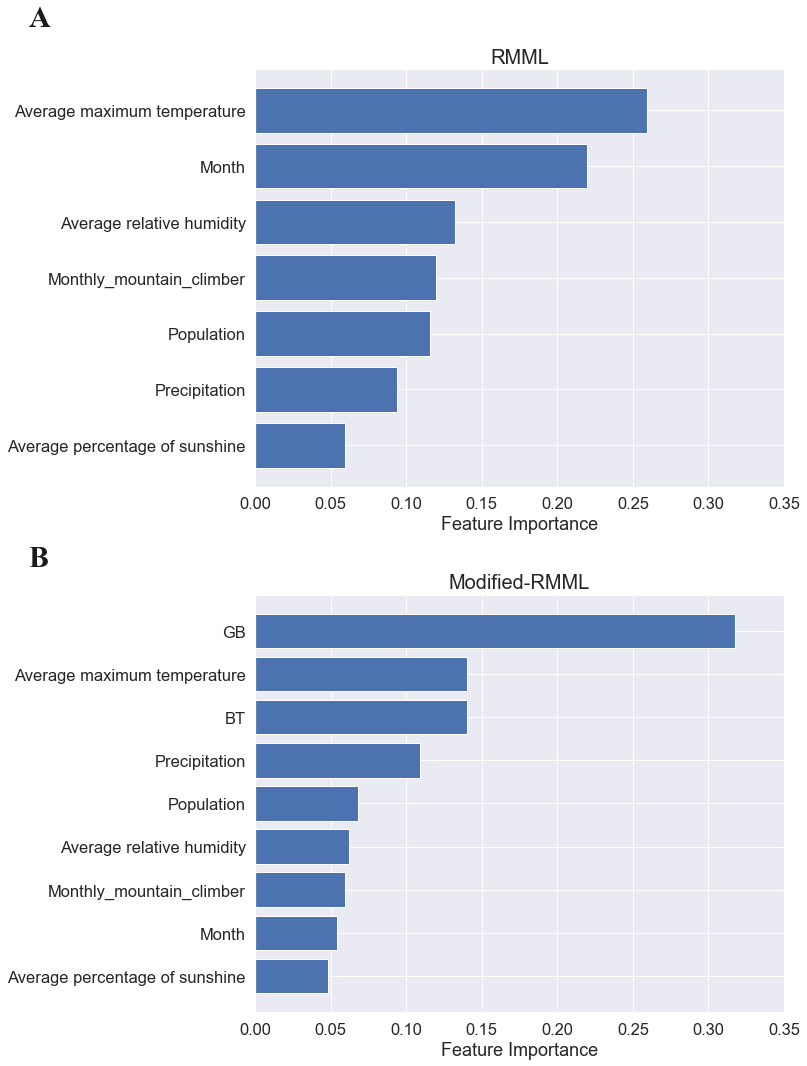

In [175]:
plt.figure(figsize=(12,15))
font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
for j in range(2):
    plt.subplot(2,1,j+1)
    if (j==0):
        feature_importance=FI_C['mean']
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
        plt.barh(pos, feature_importance[sorted_idx], align='center')
        plt.yticks(pos, np.array(data_FS_X.columns)[sorted_idx])
        plt.xlim([0, 0.35])
        plt.xlabel('Feature Importance')
        plt.rc('axes', titlesize=20)
        plt.title('RMML')
        plt.text(-0.15, 8, 'A', fontdict=font2)
        plt.rcParams['font.family'] = 'Arial'
    else:
        feature_importance=FI_C2['mean']
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
        plt.barh(pos, feature_importance[sorted_idx], align='center')
        plt.yticks(pos, np.array(data_FS_X2.columns)[sorted_idx])
        plt.xlim([0, 0.35])
        plt.xlabel('Feature Importance')
        plt.rc('axes', titlesize=20)
        plt.title('Modified-RMML')
        plt.text(-0.15, 10, 'B', fontdict=font2)
        plt.rcParams['font.family'] = 'Arial'
plt.tight_layout()
plt.show()